In [1]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from src import setup
# setup.use_gpu()

from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    order_rules,
    random_unitary,
    simulation)

from Scripts import simulation_CLI as cleo

In [2]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/greedy")

In [3]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/mimic")

In [4]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/landscape_maximizes")

In [2]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/random")

In [3]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')
import h5py
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from src import ket as ket
from src import density_matrix as DM

In [4]:
newdata1 = dict(h5py.File("../data/random/random.hdf5"))


In [157]:
newdata2 = dict(h5py.File("../data/greedy/greedy.hdf5"))


In [158]:
newdata3 = dict(h5py.File("../data/mimic/mimic.hdf5"))


In [134]:
newdata4 = dict(h5py.File("../data/landscape_maximizes/landscape_maximizes.hdf5"))

In [7]:
newdata1 = dict(h5py.File("../data/random/random.hdf5"))
newdata2 = dict(h5py.File("../data/greedy/greedy.hdf5"))
newdata3 = dict(h5py.File("../data/mimic/mimic.hdf5"))
newdata4 = dict(h5py.File("../data/landscape_maximizes/landscape_maximizes.hdf5"))

In [5]:
def get_pops(data, n_qubits, connectivity,update_rule):
    #dimension 0 is each trial
    #dimension 1 is each time step
    #dimension 2 is each qubit
    result = []
    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['pops'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        dat = np.array([np.array([dat[k][subkey][()] for subkey in sorted(dat[k])]) for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

def get_2_qbit_dms(data, n_qubits, connectivity,update_rule):
    basis = ket.canonical_basis(2)
    #dimension 0 is each trial
    #dimension 1 is each time step (recall that sampling step is 5 by default)
    #dimension 2 is qubit pair
    #dimension 3 and 4 is the 2 qubit density matrix
    result = []
    
    def to_tuple(string):
        tuple_elements = string.strip('()').split(',')
        return tuple(int(elem.strip()) for elem in tuple_elements)

    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['two_qubit_dms'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        
        dat = np.array([{to_tuple(subkey):DM.DensityMatrix(dat[k][subkey],basis) for subkey in sorted(dat[k])} for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

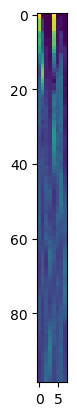

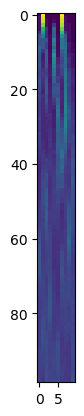

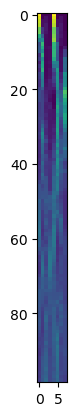

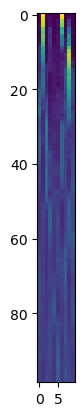

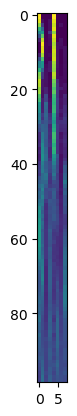

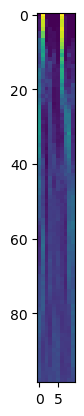

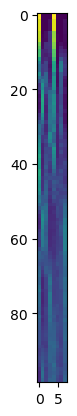

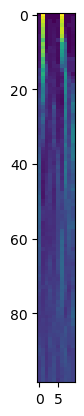

In [9]:
list_conn = ["c4_2local","c5_2local","c6_2local","cN_2local"]
sizes=[8,10]
for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata1,size,conn,"random")
        for i in range(1):
            plt.imshow(pops[i][0:99], interpolation='none')
            plt.show()

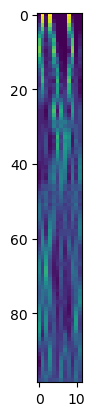

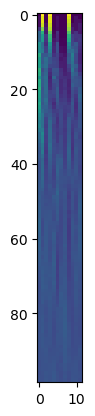

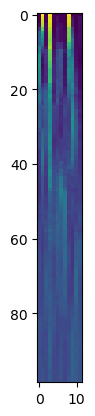

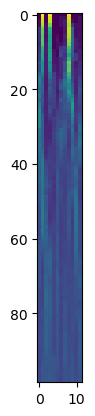

In [6]:
list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local"]
sizes=[12]
for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata1,size,conn,"random")
        for i in range(1):
            plt.imshow(pops[i][0:99], interpolation='none')
            plt.show()

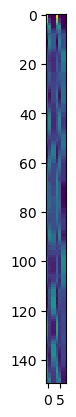

<Figure size 1200x1200 with 0 Axes>

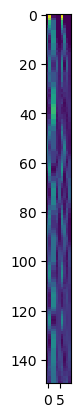

<Figure size 1200x1200 with 0 Axes>

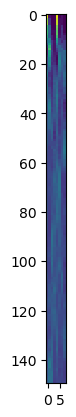

<Figure size 1200x1200 with 0 Axes>

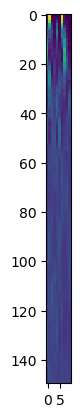

<Figure size 1200x1200 with 0 Axes>

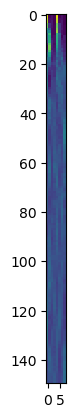

<Figure size 1200x1200 with 0 Axes>

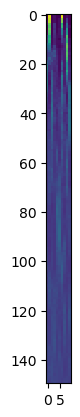

<Figure size 1200x1200 with 0 Axes>

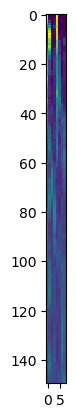

<Figure size 1200x1200 with 0 Axes>

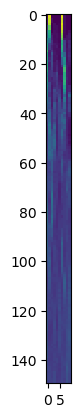

<Figure size 1200x1200 with 0 Axes>

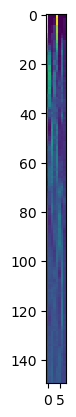

<Figure size 1200x1200 with 0 Axes>

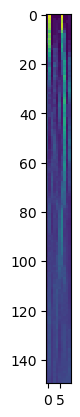

<Figure size 1200x1200 with 0 Axes>

In [88]:
list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
sizes=[8,10]
for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata2,size,conn,"greedy")
        #twoQdmsmimicC6 = get_2_qbit_dms(newdata4,8,"c6","mimic")
        for i in range(1):
            plt.imshow(pops[i][00:150], interpolation='none')
            plt.figure(figsize=(12, 12))
            plt.show()

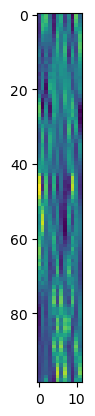

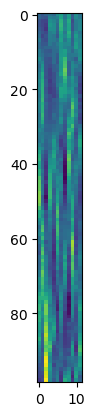

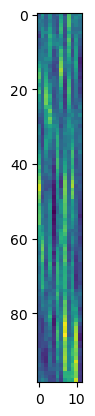

In [13]:
list_conn = ["c2_2local","c4_2local","c5_2local"]
sizes=[12]
for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata2,size,conn,"greedy")
        for i in range(1):
            plt.imshow(pops[i][400:499], interpolation='none')
            plt.show()

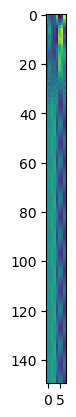

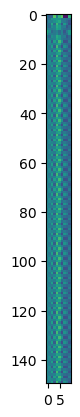

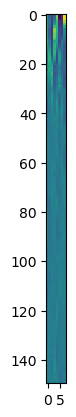

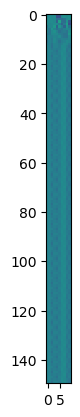

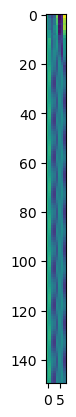

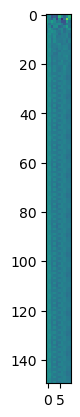

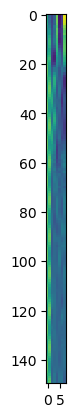

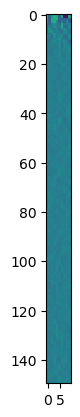

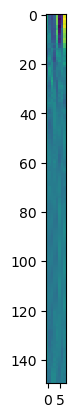

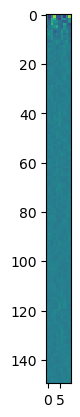

In [14]:
list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
sizes=[8,10]
for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata3,size,conn,"mimic")
        #twoQdmsmimicC6 = get_2_qbit_dms(newdata4,8,"c6","mimic")
        for i in range(1):
            plt.imshow(pops[i][000:150], interpolation='none')
            plt.show()

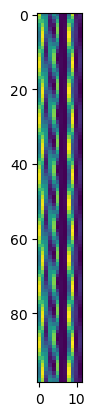

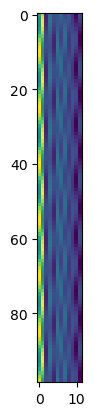

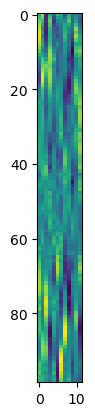

In [15]:
list_conn = ["c2_2local","c4_2local","c5_2local"]
sizes=[12]
for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata3,size,conn,"mimic")
        for i in range(1):
            plt.imshow(pops[i][400:499], interpolation='none')
            plt.show()

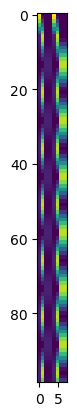

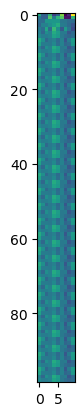

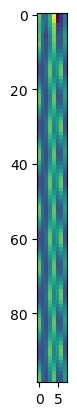

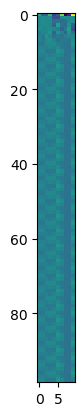

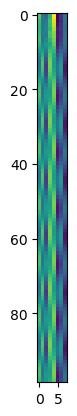

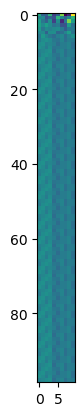

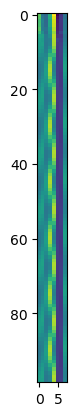

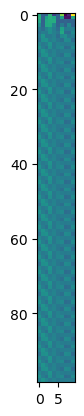

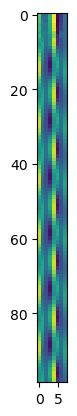

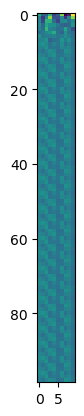

In [16]:
list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
sizes=[8,10]
for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata4,size,conn,"landscape_maximizes")
        #twoQdmsmimicC6 = get_2_qbit_dms(newdata4,8,"c6","mimic")
        for i in range(1):
            plt.imshow(pops[i][0:99], interpolation='none')
            plt.show()

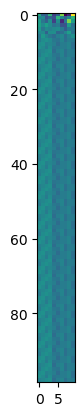

In [17]:
pops = get_pops(newdata4,10,"c5_2local","landscape_maximizes")
        #twoQdmsmimicC6 = get_2_qbit_dms(newdata4,8,"c6","mimic")
for i in range(1):
    plt.imshow(pops[i][0:99], interpolation='none')
    plt.show()

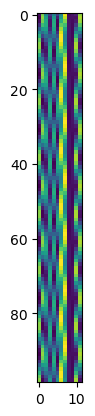

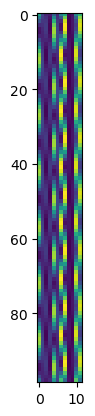

KeyError: "Unable to open object (object 'c5_2local connectivity' doesn't exist)"

In [45]:
list_conn = ["c2_2local","c4_2local"]
sizes=[12]
for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata4,size,conn,"landscape_maximizes")
        for i in range(1):
            plt.imshow(pops[i][400:499], interpolation='none')
            plt.show()

In [18]:
steps=499
def tz_two_q_dyns_map(pops_trial_index): 
    tz = []
    np.array(pops_trial_index)
    for step_index in range(steps):
        tzi = pops_trial_index[step_index + 1 ] - np.cos(np.pi / 4)*np.cos(np.pi / 4)* pops_trial_index[step_index]
        tz.append(tzi)
    return tz

In [19]:
num_qubits = 8
def CPcond(pops) :
    list_lambda_z=[]
    CPcond=[]
    for size in range(num_qubits):
        list_lambda_z.append(np.cos(np.pi / 15) * np. cos(np.pi / 15))
    for step in tz_two_q_dyns_map(pops):
        abs_step = [abs(ele) for ele in step]
        CPcond.append(abs_step + list_lambda_z)
    return tz_two_q_dyns_map(pops)

#CPcond(popsgreedy)
def abs_tz(pops):
    abs_tz=[]
    for step in tz_two_q_dyns_map(pops):
        abs_step = [abs(ele) for ele in step]
        abs_tz.append(abs_step) 
    return abs_tz
def CPcond(abs_tz_pops) :
    cp_cond=[]
    for step in abs_tz_pops:
        cp_step = [ele + np.cos(np.pi / 4) * np. cos(np.pi / 4)  for ele in step]
        cp_cond.append(cp_step) 
    return cp_cond

In [20]:
def means_stds_of_pops_of_one_sim_index(pops_trial_index):
    mean_stds_list = []
    for step_index in range(steps):
        stds = np.std(pops_trial_index [step_index])
        means = np.mean(pops_trial_index[step_index])
        mean_stds_list.append([means, stds])
    return mean_stds_list

def means_stds_mode_of_pops_of_one_sim_index(pops_trial_index):
    mean_stds_mode_list = []
    for step_index in range(steps):
        total = sum(pops_trial_index[step_index])
        stds = np.std(pops_trial_index[step_index])
        means = np.mean(pops_trial_index[step_index])
        mode = max(pops_trial_index[step_index])
        mean_stds_mode_list.append([total,stds,means,mode])
    return mean_stds_mode_list

def extract_total(list_of_lists):
    return [sublist[0] for sublist in list_of_lists]
def extract_stds(list_of_lists):
    return [sublist[1] for sublist in list_of_lists]
def extract_means(list_of_lists):
    return [sublist[2] for sublist in list_of_lists]
def extract_mode(list_of_lists):
    return [sublist[3] for sublist in list_of_lists]

In [21]:
def moving_average(data, window_size=10):
    """
    Function to calculate the moving average of a given data array.
    
    Parameters:
    - data: The input data array.
    - window_size: The size of the moving average window.
    
    Returns:
    - moving_avg: The moving average array.
    """
    moving_avg = np.convolve(data, np.ones(window_size) / window_size, mode='valid')
    return moving_avg

def plot_four_stats_as_function_of_time(list1, list2, list3,list4, filename='plot.png',title='plotname'):
    # Assuming both lists have the same length (representing time steps)
    time_steps = range(1, len(list1) + 1)
    
    # Calculate moving averages for both lists
    moving_avg_list1 = moving_average(list1)
    moving_avg_list2 = moving_average(list2)
    moving_avg_list3 = moving_average(list3)
    moving_avg_list4 = moving_average(list4)
    
    # Set the figure size (adjust as needed)
    plt.figure(figsize=(15, 6))  # Width: 10 inches, Height: 6 inches
    
    # Plotting the lists and their moving averages
    plt.plot(time_steps, list1, color='blue', label='Random')
    plt.plot(time_steps, list2,color='orange', label='Greedy')
    plt.plot(time_steps, list3, color='red',label='Mimic')
    plt.plot(time_steps, list4, color='green',label='Landmax')
    plt.plot(time_steps[len(list1) - len(moving_avg_list1):], moving_avg_list1, linestyle='--', color='blue', label='Moving Average (Random)')
    plt.plot(time_steps[len(list2) - len(moving_avg_list2):], moving_avg_list2, linestyle='--', color='orange', label='Moving Average (Greedy)')
    plt.plot(time_steps[len(list3) - len(moving_avg_list3):], moving_avg_list3, linestyle='--', color='red', label='Moving Average (Mimic)')
    plt.plot(time_steps[len(list4) - len(moving_avg_list4):], moving_avg_list4, linestyle='--', color='green', label='Moving Average (Landmax)')    
    
    # Adding labels and title
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.title(title)
    
    # Adding legend
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
    
    # Display the plot
    plt.grid(True)
    
    # Save the plot with the desired filename
    #plt.savefig(filename)
    
    # Show the plot (optional)
    plt.show()

def plot_four_stats_as_function_of_time_avg(list1, list2, list3,list4, filename='plot.png',title='plotname'):
    # Assuming both lists have the same length (representing time steps)
    time_steps = range(1, len(list1) + 1)
    
    # Calculate moving averages for both lists
    moving_avg_list1 = moving_average(list1)
    moving_avg_list2 = moving_average(list2)
    moving_avg_list3 = moving_average(list3)
    moving_avg_list4 = moving_average(list4)
    
    # Set the figure size (adjust as needed)
    plt.figure(figsize=(15, 6))  # Width: 10 inches, Height: 6 inches
    
    # Plotting the lists and their moving averages
    #plt.plot(time_steps, list1, color='blue', label='Random')
#    plt.plot(time_steps, list2,color='orange', label='Greedy')
    #plt.plot(time_steps, list3, color='green',label='Land_max')
    #plt.plot(time_steps, list4, color='red',label='Mimic')
    plt.plot(time_steps[len(list1) - len(moving_avg_list1):], moving_avg_list1, linestyle='--', color='blue', label='Moving Average (Random)')
    plt.plot(time_steps[len(list2) - len(moving_avg_list2):], moving_avg_list2, linestyle='--', color='orange', label='Moving Average (Greedy)')
    plt.plot(time_steps[len(list3) - len(moving_avg_list3):], moving_avg_list3, linestyle='--', color='red', label='Moving Average (Mimic)')
    plt.plot(time_steps[len(list4) - len(moving_avg_list4):], moving_avg_list4, linestyle='--', color='green', label='Moving Average (Landmax)')    
    
    # Adding labels and title
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.title(title)
    
    # Adding legend
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
    
    # Display the plot
    plt.grid(True)
    
    # Save the plot with the desired filename
   # plt.savefig(filename)
    
    # Show the plot (optional)
    plt.show()

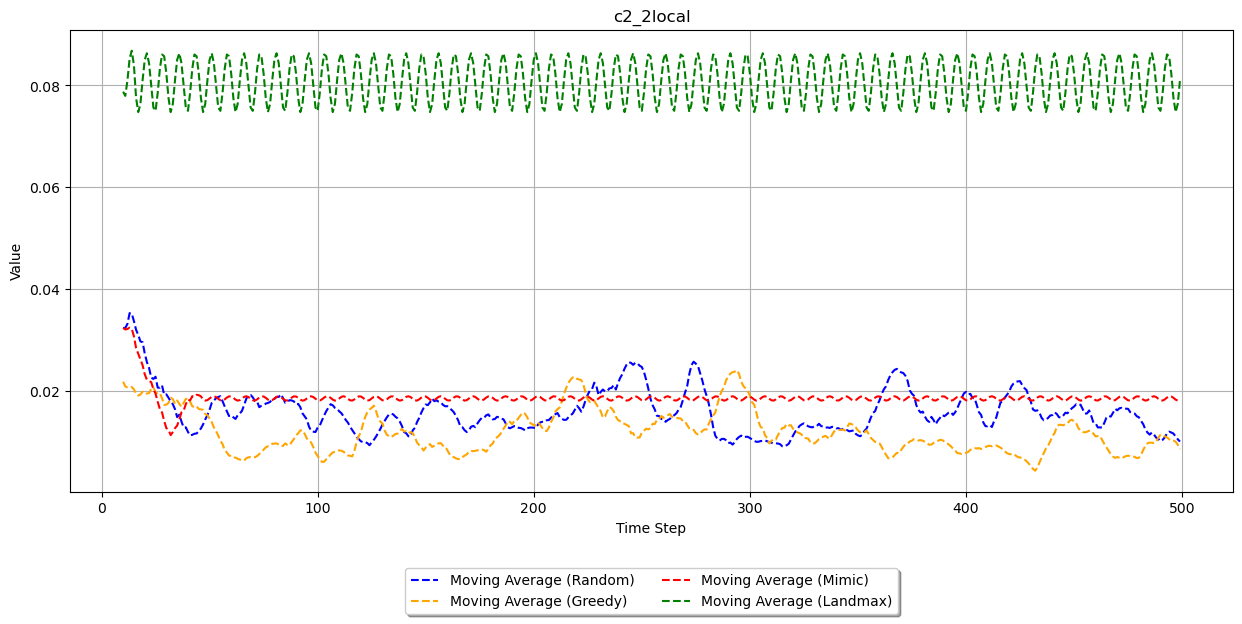

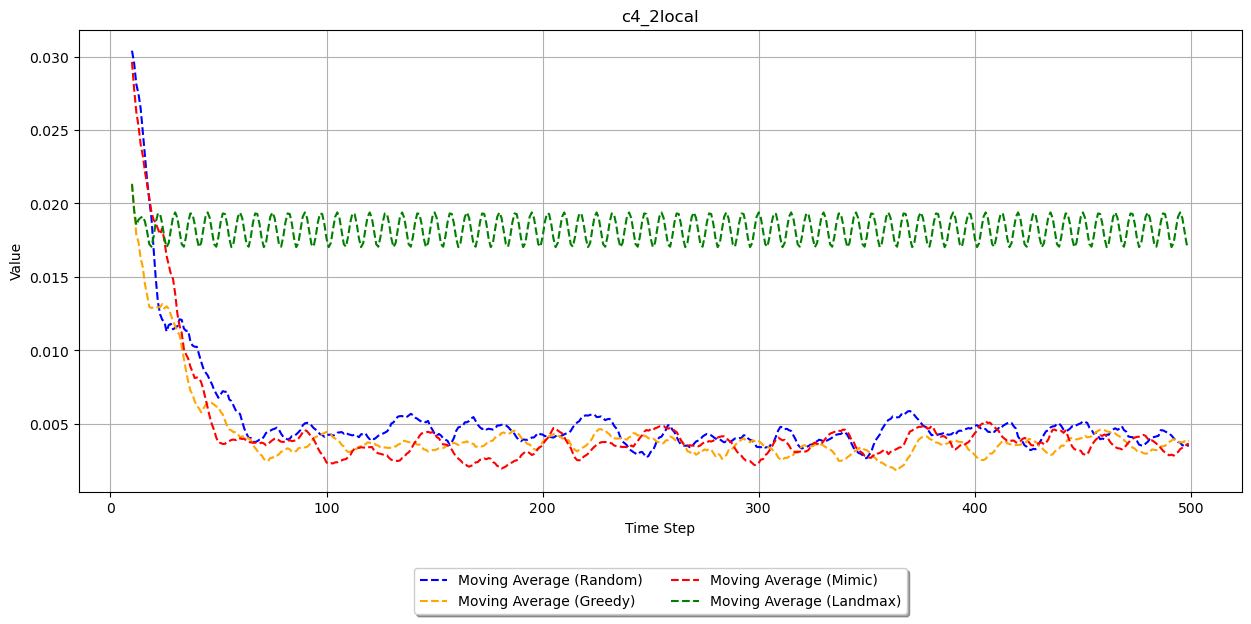

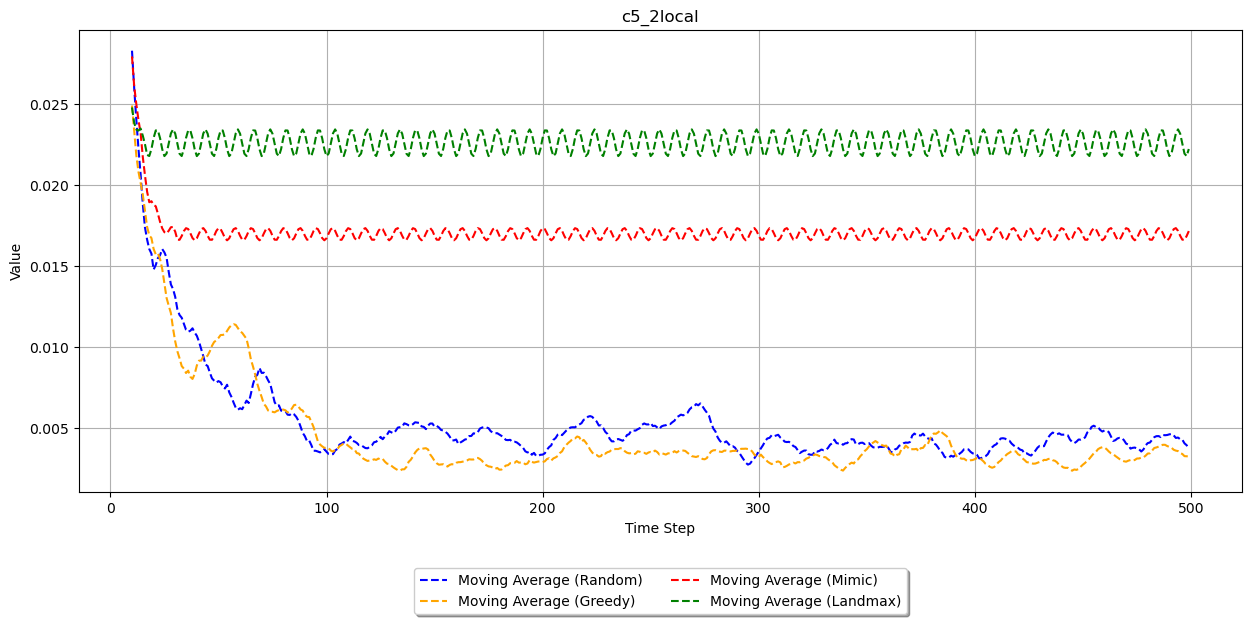

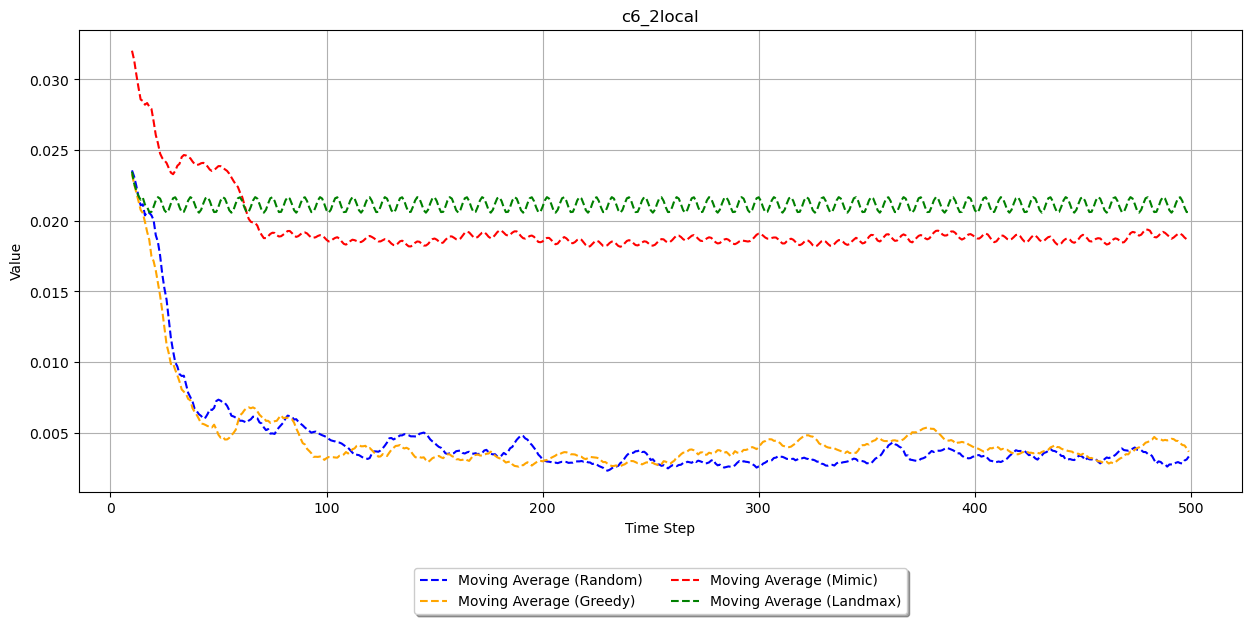

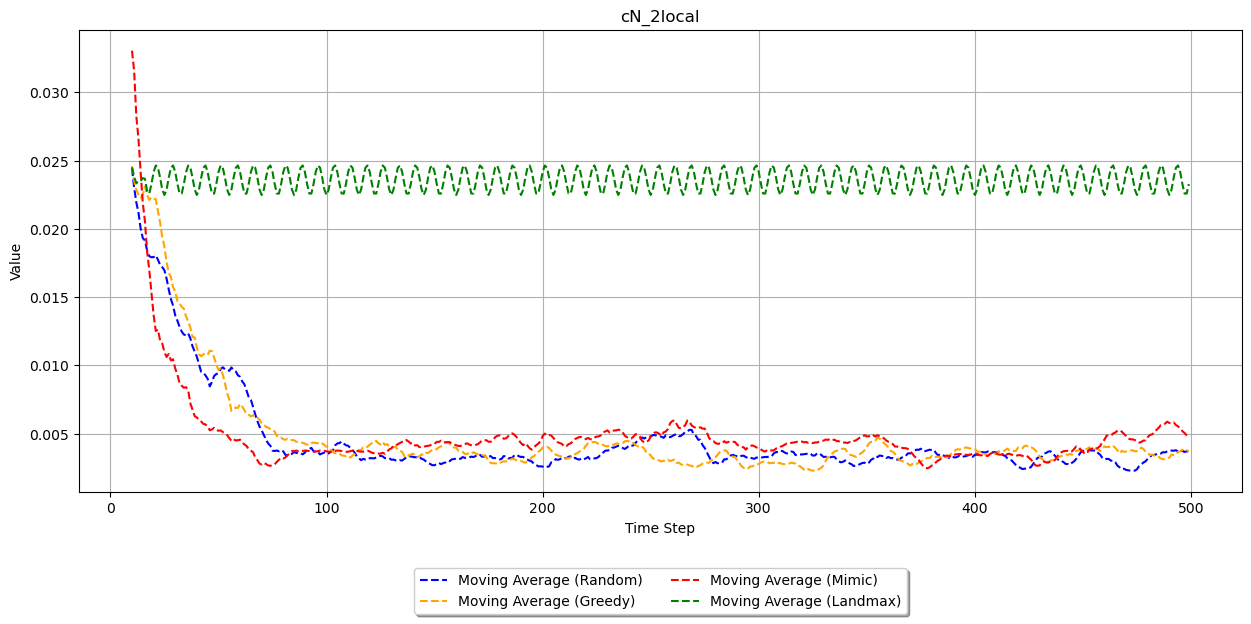

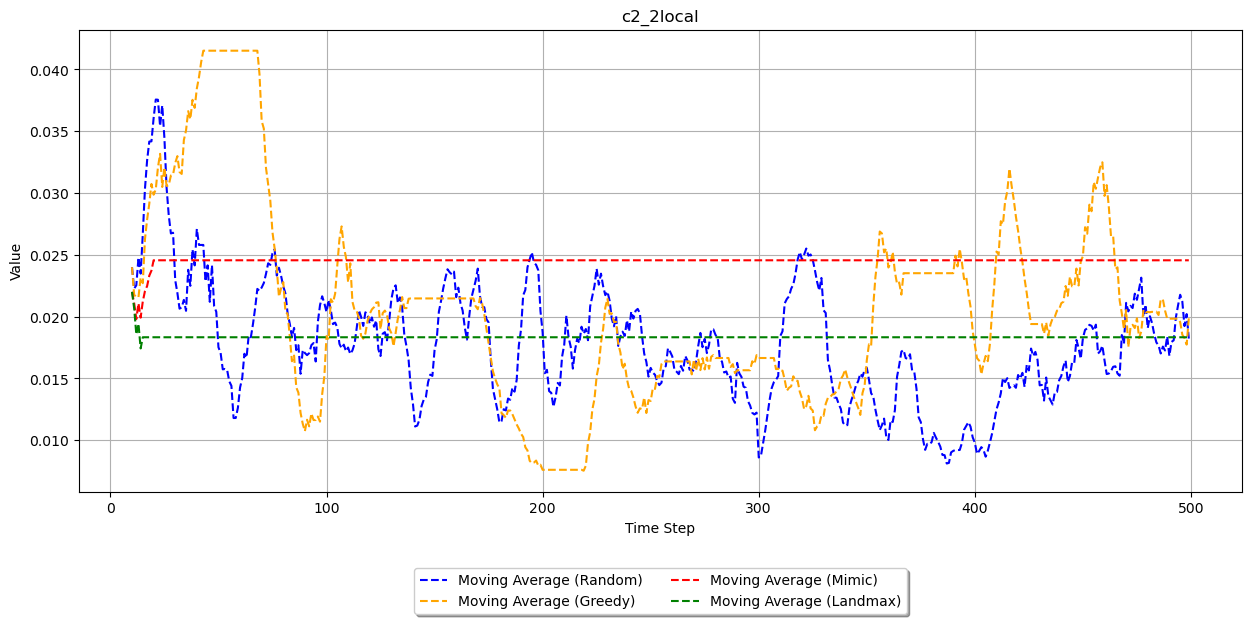

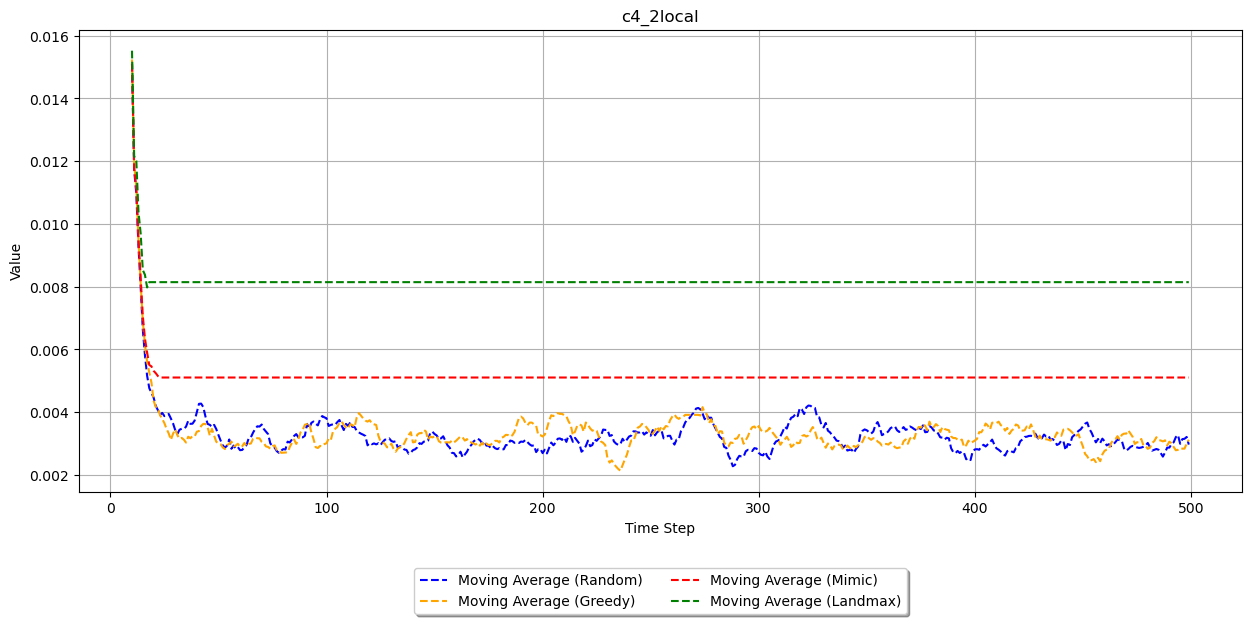

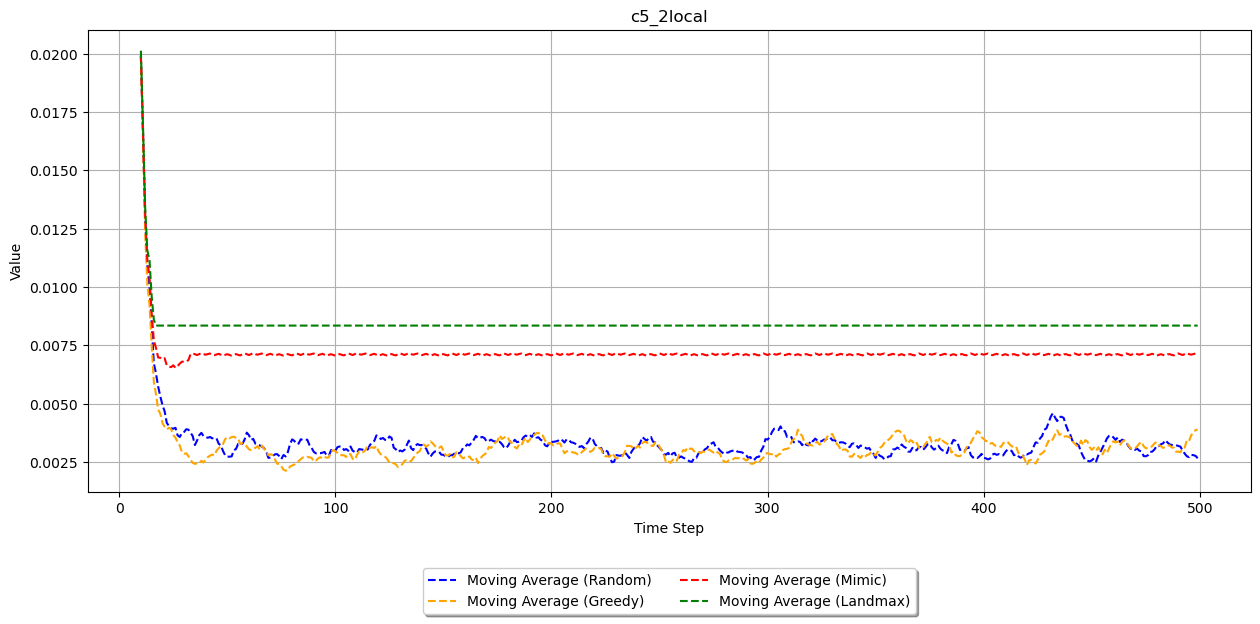

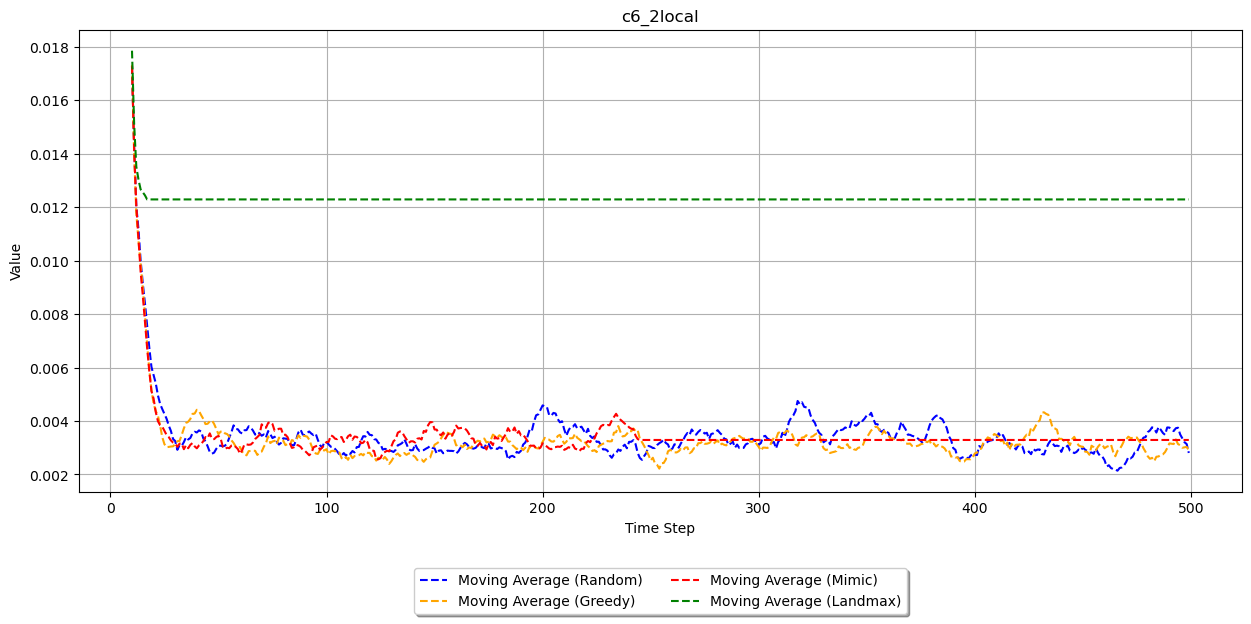

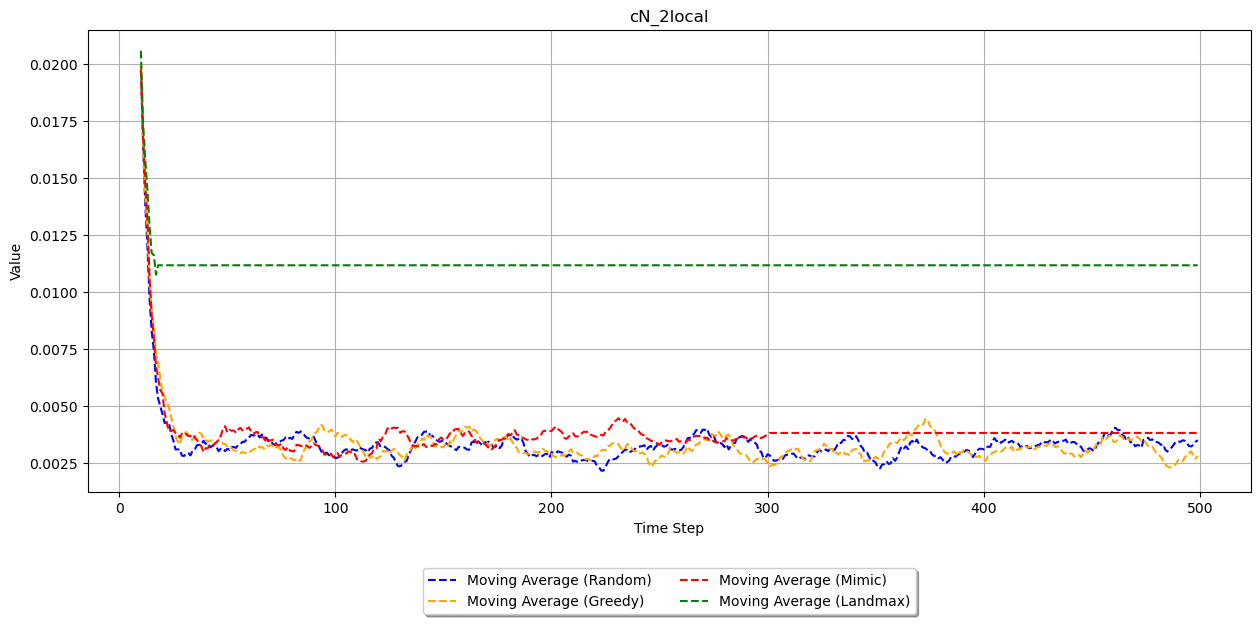

In [22]:
list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
size=[8,10]
for size in sizes:
    for conn in list_conn:
        pops_random = get_pops(newdata1,size,conn,"random")
        pops_greedy = get_pops(newdata2,size,conn,"greedy")
        pops_mimic = get_pops(newdata3,size,conn,"mimic")
        pops_landmax = get_pops(newdata4,size,conn,"landscape_maximizes")
        
        stds_random=extract_stds(means_stds_of_pops_of_one_sim_index(tz_two_q_dyns_map(pops_random[0])))
        stds_greedy=extract_stds(means_stds_of_pops_of_one_sim_index(tz_two_q_dyns_map(pops_greedy[0])))
        stds_mimic=extract_stds(means_stds_of_pops_of_one_sim_index(tz_two_q_dyns_map(pops_mimic[0])))
        stds_landmax=extract_stds(means_stds_of_pops_of_one_sim_index(tz_two_q_dyns_map(pops_landmax[0])))
        
        plot_four_stats_as_function_of_time_avg(stds_random,stds_greedy, stds_mimic,stds_landmax,filename = 'tz_stds_random_greedy_landmax_temp_homo',title = conn)


In [14]:
#MI of every pair
def mutual_info_dicts(twoQdms, trial_index):
    mutual_info_list = []
    for time_step in twoQdms[trial_index]:
        mutual_info_dict = {}
        mutual_info = measure.mutual_information_of_every_pair_dict(time_step)
        # Filter out values below the precision threshold
        filtered_mutual_info = {k: v if v >= 1e-6 else 0 for k, v in mutual_info.items()}
        # Update the mutual_info_dict with the filtered mutual info for the current time step
        mutual_info_dict.update(filtered_mutual_info)
        # Append the mutual_info_dict to the list
        mutual_info_list.append(mutual_info_dict)
    return mutual_info_list

In [15]:
# Call the two_point_dict function for each trial index
# Get the list of dictionaries containing two point values for each time step
def create_adjacency_matrix_two_dim(two_point_dict, num_nodes):
    adjacency_matrix = [[0] * num_nodes for _ in range(num_nodes)]
    for (node1, node2), two_point_value in two_point_dict.items():
        adjacency_matrix[node1][node2] = two_point_value
        adjacency_matrix[node2][node1] = two_point_value  # Assuming undirected graph
    return adjacency_matrix


In [12]:
def adjacency_matrices_list_two_dim(twoQdms, trial_index, num_nodes, two_point_dicts):
    # Get the list of dictionaries containing mutual information values for each time step
    two_point_dicts_list = two_point_dicts(twoQdms, trial_index)
    # Create adjacency matrices for each time step
    adjacency_matrices = []
    for two_point_dict in two_point_dicts_list:
        adj_matrix = create_adjacency_matrix_two_dim(two_point_dict, num_nodes)
        adjacency_matrices.append(adj_matrix)
    return adjacency_matrices

In [20]:
adj_matrix_mi = adjacency_matrices_list_two_dim(twoQdmsrandom,0,8,mutual_info_dicts)

In [27]:
adj_matrix_mi[10][0]


[0,
 0.0022319207602790048,
 0.002013423760957478,
 0.0002700669656414689,
 1.1357528382216486e-06,
 1.3848215083100968e-05,
 1.9937715156626012e-06,
 0.0010669015472097865]

In [33]:
mi_butterfly[10]

[0,
 0.0022319207602790048,
 0.002013423760957478,
 0.0002700669656414689,
 1.1357528382216486e-06,
 1.3848215083100968e-05,
 1.9937715156626012e-06,
 0.0010669015472097865]

In [26]:
#Clustering Coefficient
def clustering_coeff_function_of_time(adjacency_matrix_list):
    C_list = []
    #adjacency_matrix_list=np.array(adjacency_matrix_list)
    for adj_mat in adjacency_matrix_list:
        adj_mat=np.array(adj_mat)
        M_sq = adj_mat@adj_mat
        sum_of_M_sq = np.sum(M_sq)
        M_cube = adj_mat@adj_mat@adj_mat
        M_cube_trace = np.trace(M_cube)
        C_list.append(M_cube_trace/sum_of_M_sq)
    return(C_list)

#Disparity
def disparity_function_of_time(adjacency_matrix_list, N):
    D_list = []
    for adj_mat in adjacency_matrix_list:
        M_row_sum_squared = np.sum(adj_mat, axis=1)**2
        M_row_sum_of_squared_elements = np.sum(adj_mat**2, axis=1)
        # Check for zero division before performing division
        Di = np.where(M_row_sum_squared != 0, M_row_sum_of_squared_elements / M_row_sum_squared, 0)
        D_list.append(np.sum(Di) / N)
    return D_list

/Users/uja5020/Documents/GitHub/Qnibble/Notebooks/../src/measurements.py:130: RuntimeWarning: divide by zero encountered in log
  from_eigen = -np.sum(eigen_vals * np.log(eigen_vals))
/Users/uja5020/Documents/GitHub/Qnibble/Notebooks/../src/measurements.py:130: RuntimeWarning: invalid value encountered in multiply
  from_eigen = -np.sum(eigen_vals * np.log(eigen_vals))
/Users/uja5020/Documents/GitHub/Qnibble/Notebooks/../src/measurements.py:141: RuntimeWarning: divide by zero encountered in log
  -d4 * np.log(d4) +
/Users/uja5020/Documents/GitHub/Qnibble/Notebooks/../src/measurements.py:141: RuntimeWarning: invalid value encountered in scalar multiply
  -d4 * np.log(d4) +
/Users/uja5020/Documents/GitHub/Qnibble/Notebooks/../src/measurements.py:142: RuntimeWarning: divide by zero encountered in log
  - 0.5 * (b2 + c3 - np.sqrt(b2 ** 2 + 4 * b3 * c2 - 2 * b2 * c3 + c3 ** 2)) * np.log(
/Users/uja5020/Documents/GitHub/Qnibble/Notebooks/../src/measurements.py:142: RuntimeWarning: invalid va

/var/folders/x8/hv6lnsx5209d4m84b842j095n23ctf/T/ipykernel_32043/1734428674.py:11: RuntimeWarning: invalid value encountered in scalar divide
  C_list.append(M_cube_trace/sum_of_M_sq)


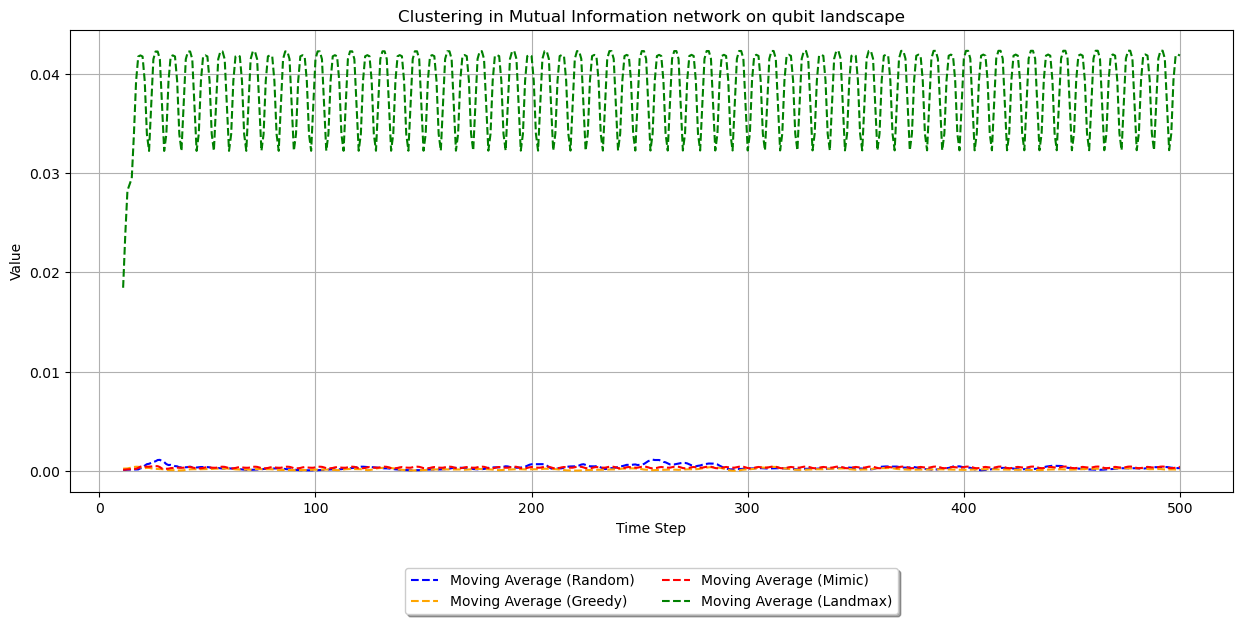

/var/folders/x8/hv6lnsx5209d4m84b842j095n23ctf/T/ipykernel_32043/1734428674.py:21: RuntimeWarning: invalid value encountered in divide
  Di = np.where(M_row_sum_squared != 0, M_row_sum_of_squared_elements / M_row_sum_squared, 0)


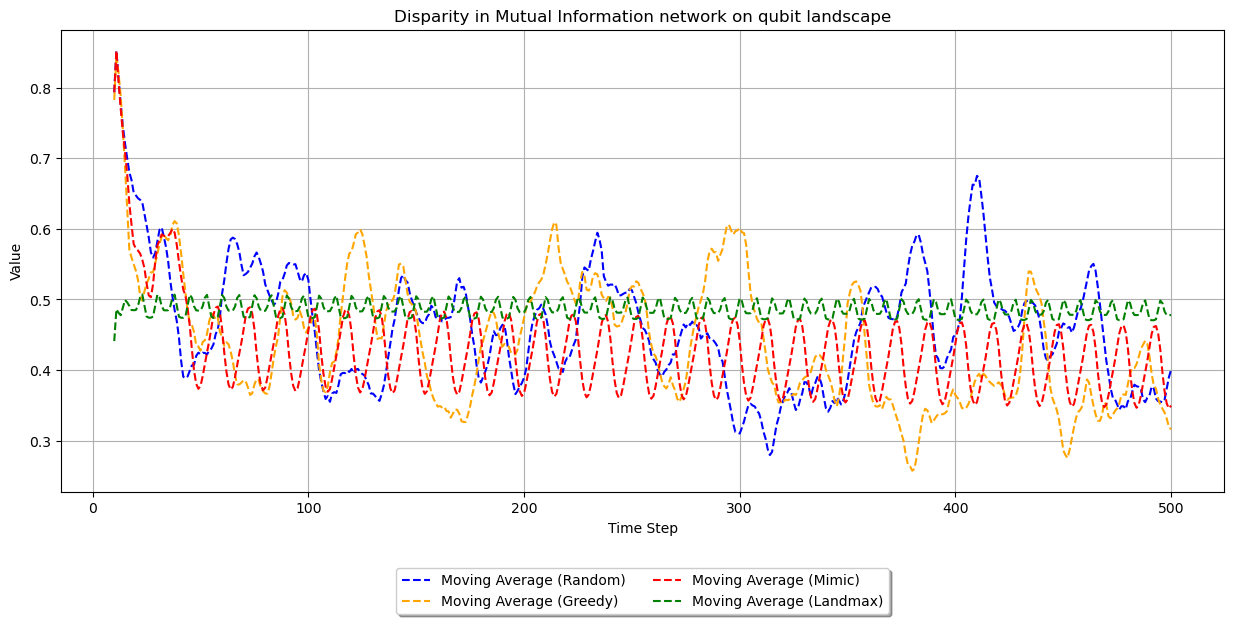

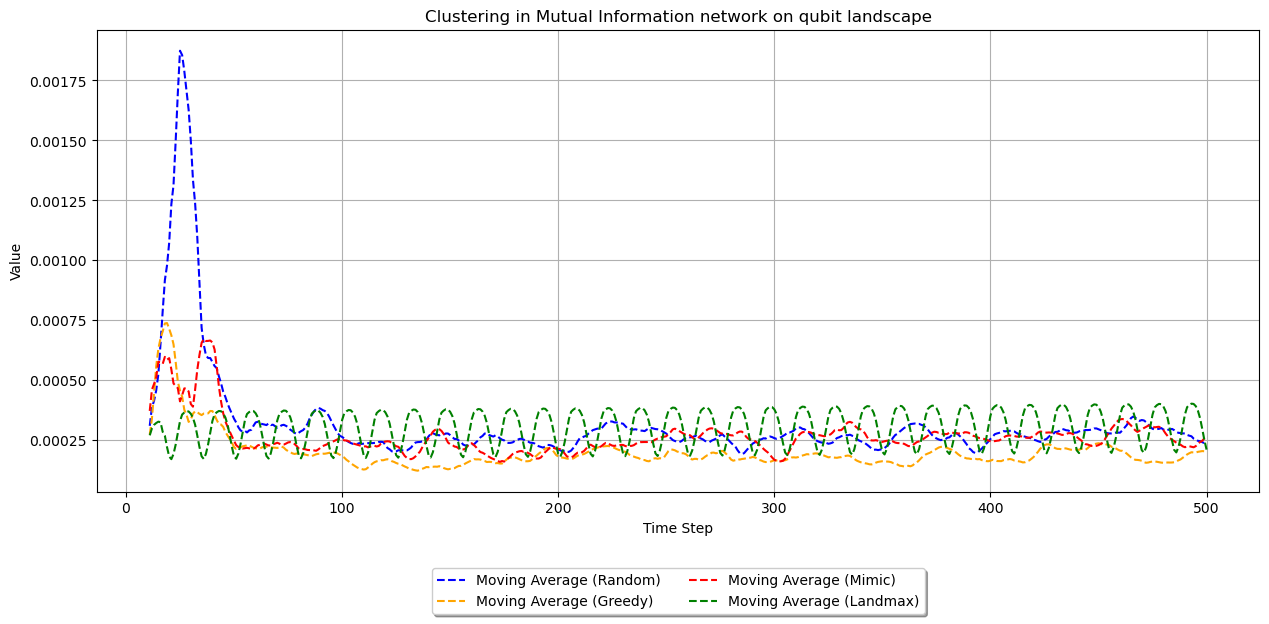

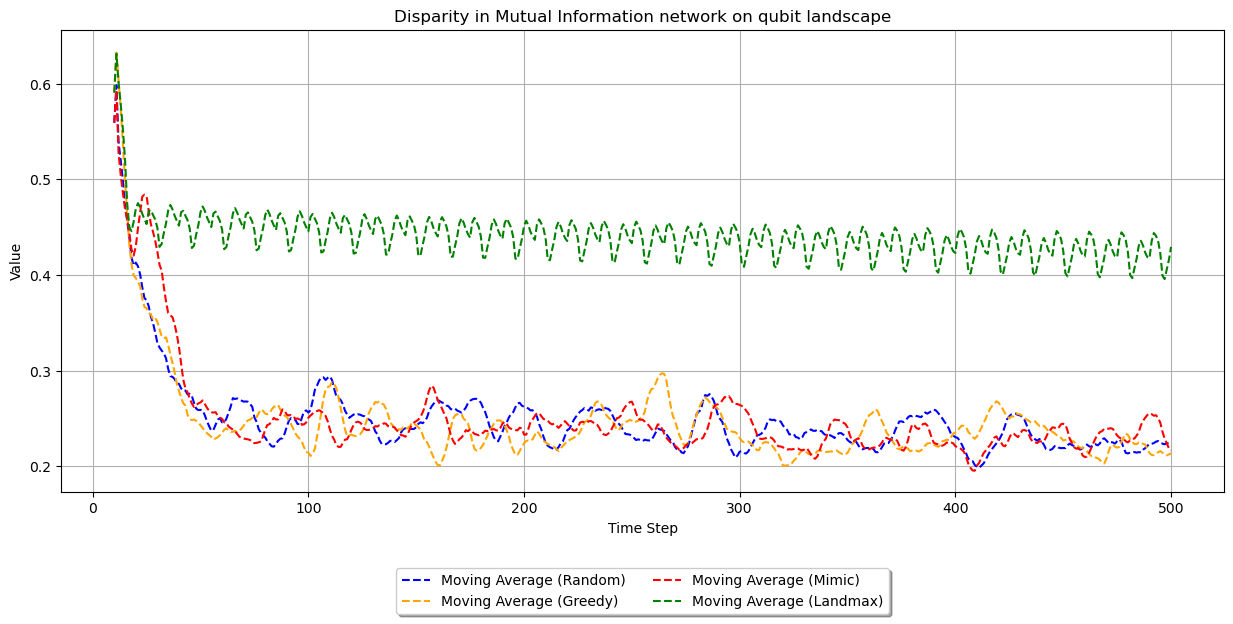

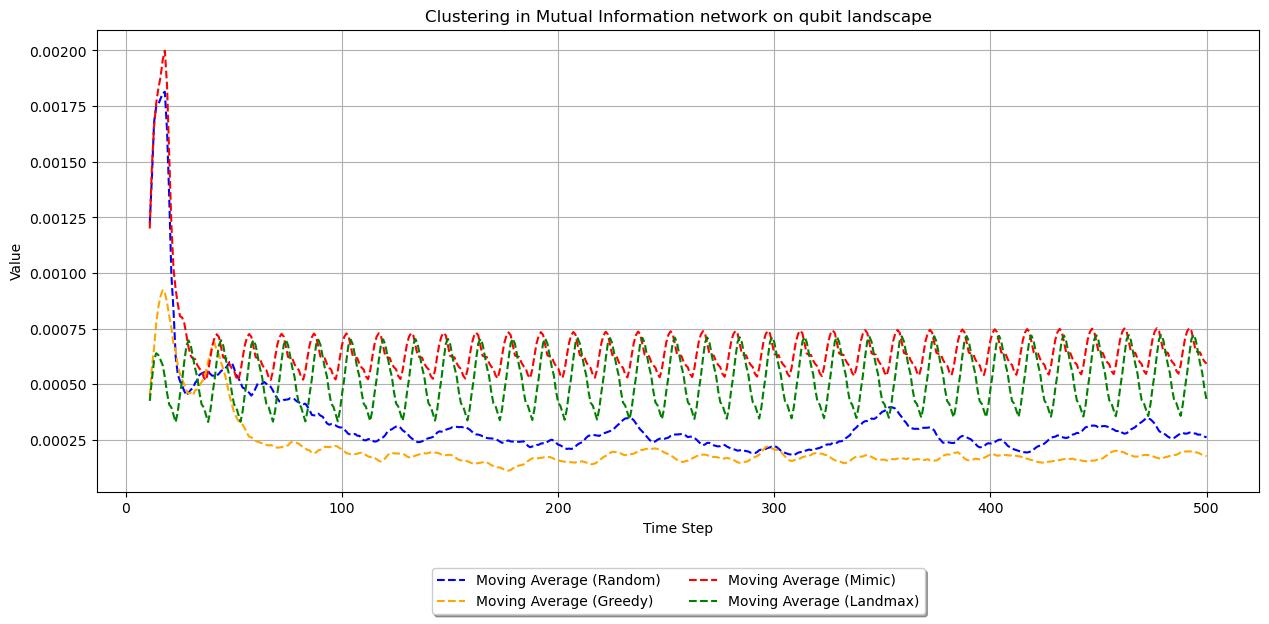

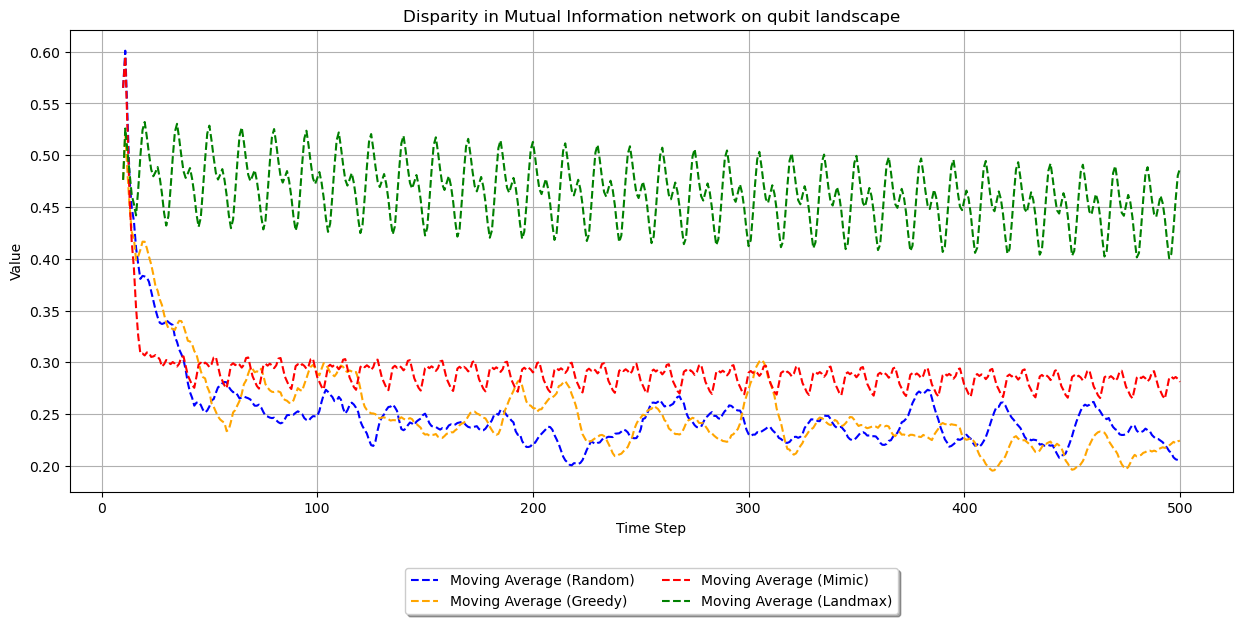

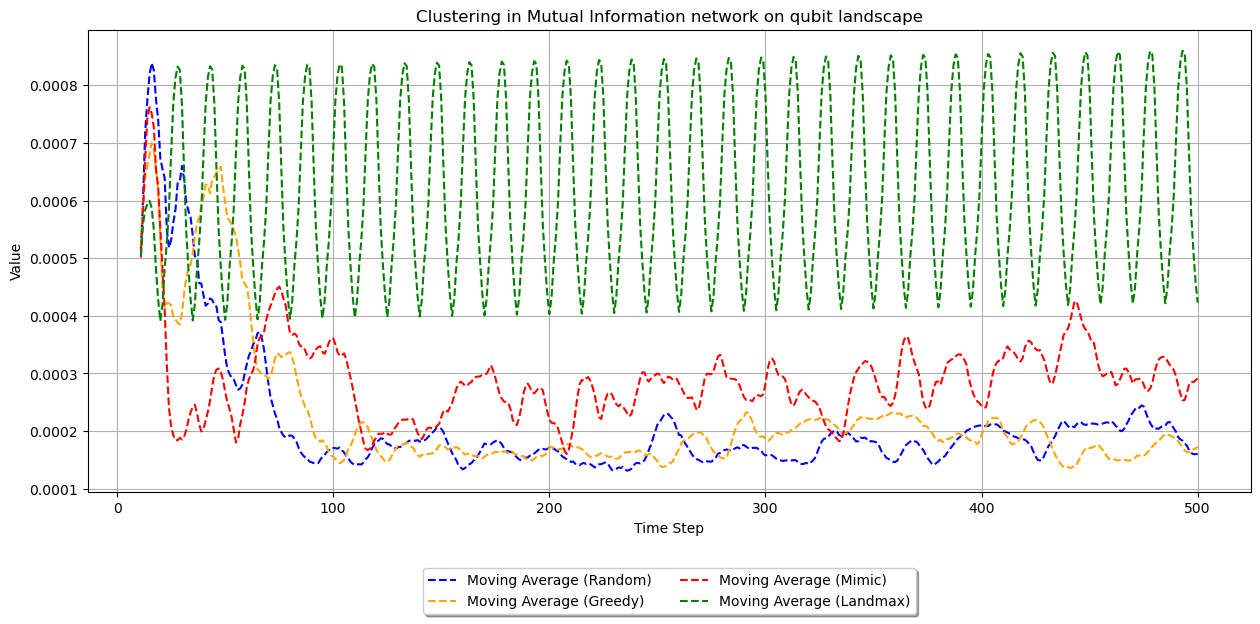

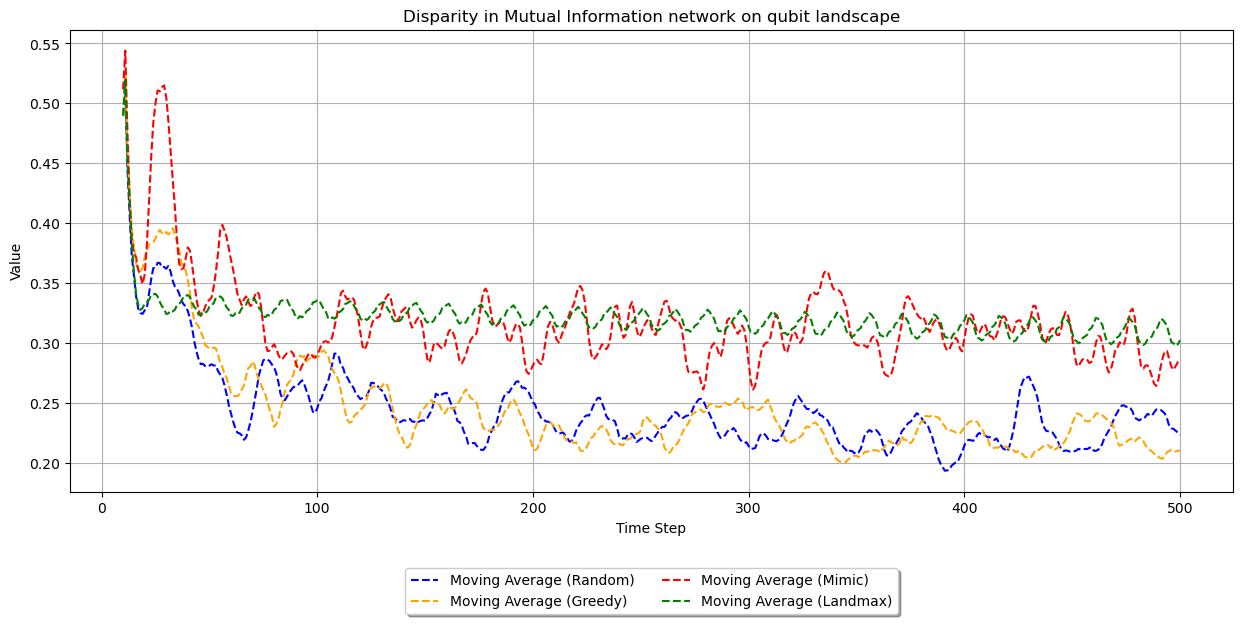

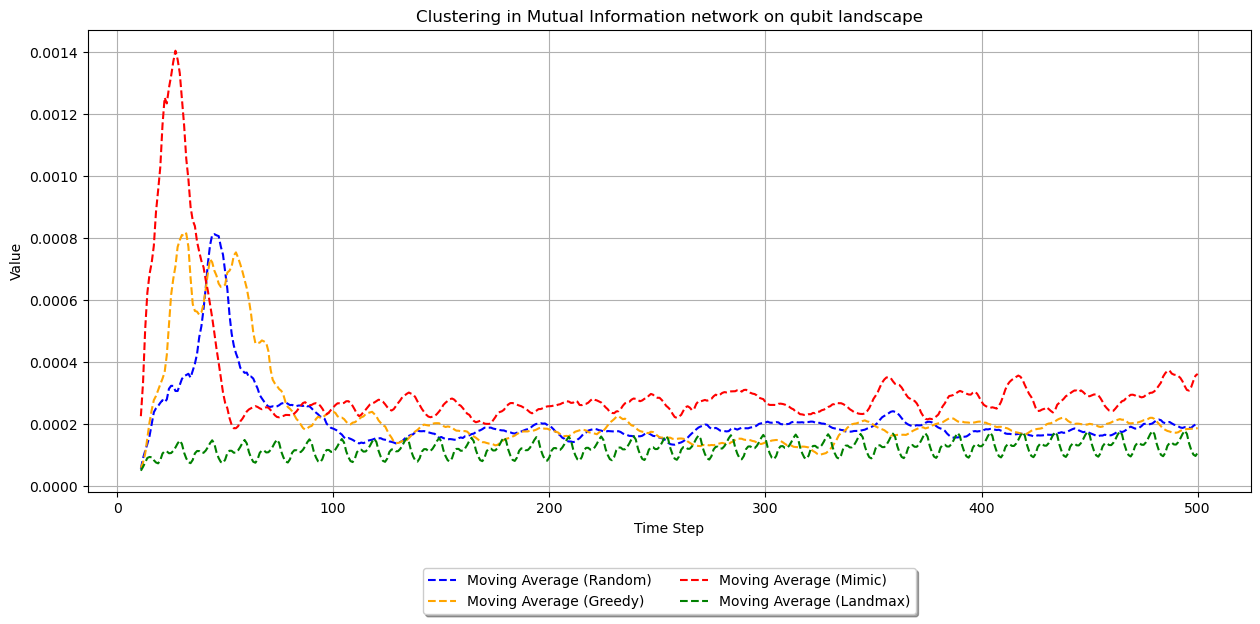

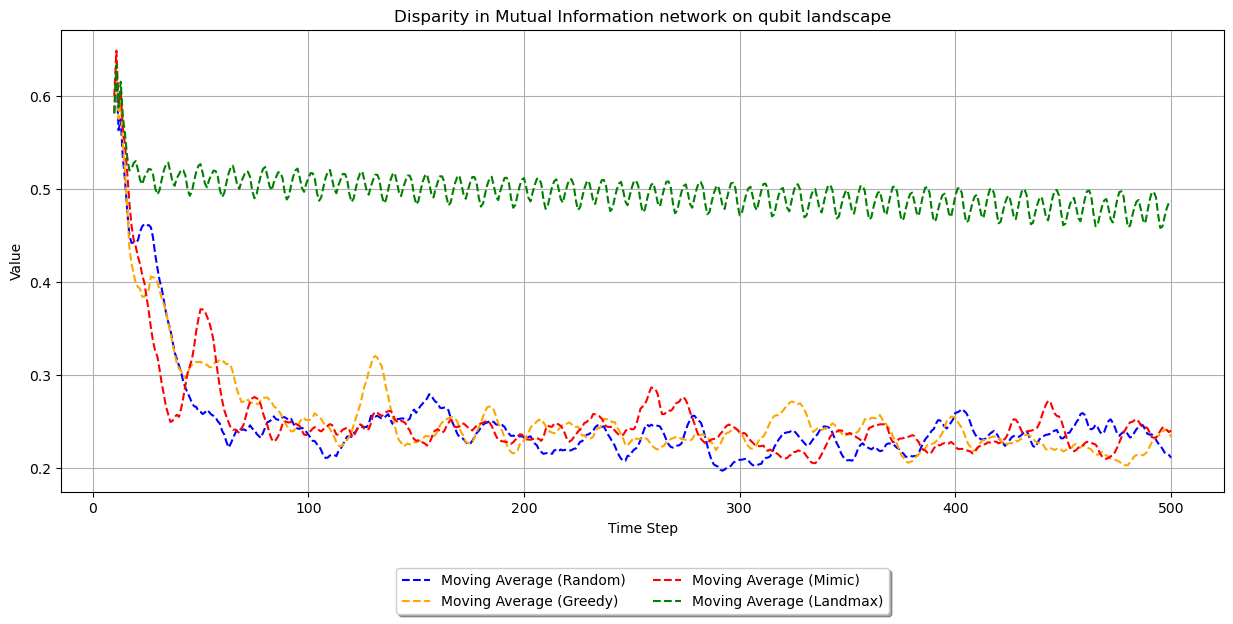

In [27]:
num_nodes=8
list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
for conn in list_conn:
    twoQdmsrandom = get_2_qbit_dms(newdata1,8,conn,"random")
    twoQdmsgreedy = get_2_qbit_dms(newdata2,8,conn,"greedy")
    twoQdmslandmax = get_2_qbit_dms(newdata4,8,conn,"landscape_maximizes")
    twoQdmsmimic = get_2_qbit_dms(newdata3,8,conn,"mimic")
    #twoQdmsweakmax = get_2_qbit_dms(newdata5,8,"c5","weakest_maximizes")

    adj_matrices_list_greedy = adjacency_matrices_list_two_dim(twoQdmsgreedy,0, num_nodes,mutual_info_dicts)
    adj_matrices_list_random = adjacency_matrices_list_two_dim(twoQdmsrandom,0, num_nodes,mutual_info_dicts)
    adj_matrices_list_landmax = adjacency_matrices_list_two_dim(twoQdmslandmax,0, num_nodes,mutual_info_dicts)
    adj_matrices_list_mimic = adjacency_matrices_list_two_dim(twoQdmsmimic,0, num_nodes,mutual_info_dicts)
    #C5
    clustering_greedy = clustering_coeff_function_of_time(np.array(adj_matrices_list_greedy))
    clustering_random = clustering_coeff_function_of_time(np.array(adj_matrices_list_random))
    clustering_landmax = clustering_coeff_function_of_time(np.array(adj_matrices_list_landmax))
    clustering_mimic= clustering_coeff_function_of_time(np.array(adj_matrices_list_mimic))
    print()
    #plot_four_stats_as_function_of_time(clustering_random,clustering_greedy, clustering_landmax,clustering_mimic, filename='clustering_c5_temp_var',title = 'Clustering in Mutual Information network on qubit landscape')
    #plt.show()
    plot_four_stats_as_function_of_time_avg(clustering_random,clustering_greedy, clustering_mimic,clustering_landmax, filename='clustering_c5_temp_var',title = 'Clustering in Mutual Information network on qubit landscape')
    plt.show()
    
    #C5
    disparity_greedy = disparity_function_of_time(np.array(adj_matrices_list_greedy),8)
    disparity_random = disparity_function_of_time(np.array(adj_matrices_list_random),8)
    disparity_landmax = disparity_function_of_time(np.array(adj_matrices_list_landmax),8)
    disparity_mimic = disparity_function_of_time(np.array(adj_matrices_list_mimic),8)
    #plot_four_stats_as_function_of_time(disparity_random,disparity_greedy, disparity_landmax,disparity_mimic, filename='disparity_c5_temp_var',title = 'Disparity in Mutual Information network on qubit landscape')
    #plt.show()
    plot_four_stats_as_function_of_time_avg(disparity_random,disparity_greedy, disparity_mimic,disparity_landmax, filename='disparity_c5_temp_var_avg',title = 'Disparity in Mutual Information network on qubit landscape')
    plt.show()

/var/folders/x8/hv6lnsx5209d4m84b842j095n23ctf/T/ipykernel_78851/1734428674.py:11: RuntimeWarning: invalid value encountered in scalar divide
  C_list.append(M_cube_trace/sum_of_M_sq)


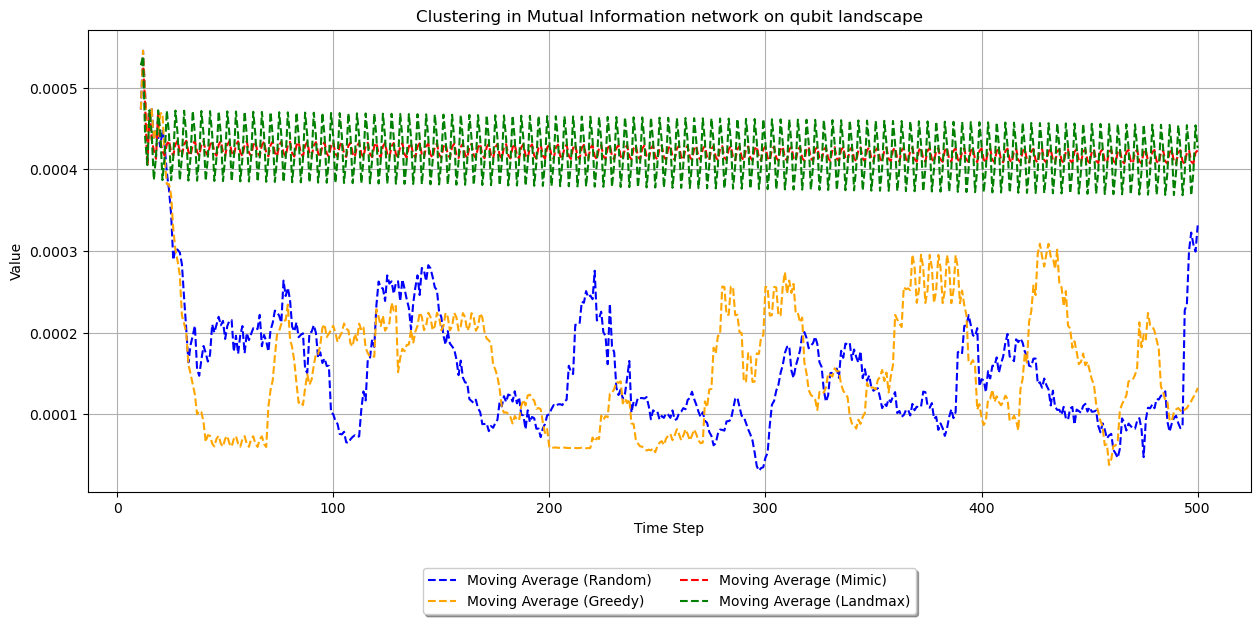

/var/folders/x8/hv6lnsx5209d4m84b842j095n23ctf/T/ipykernel_78851/1734428674.py:21: RuntimeWarning: invalid value encountered in divide
  Di = np.where(M_row_sum_squared != 0, M_row_sum_of_squared_elements / M_row_sum_squared, 0)


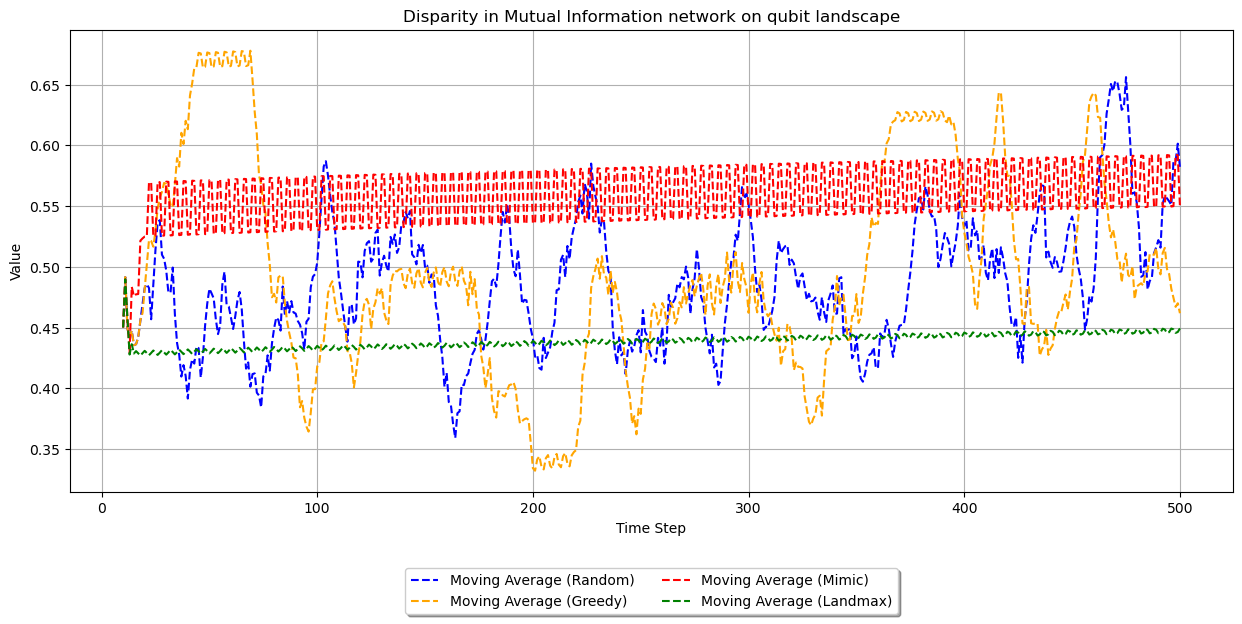

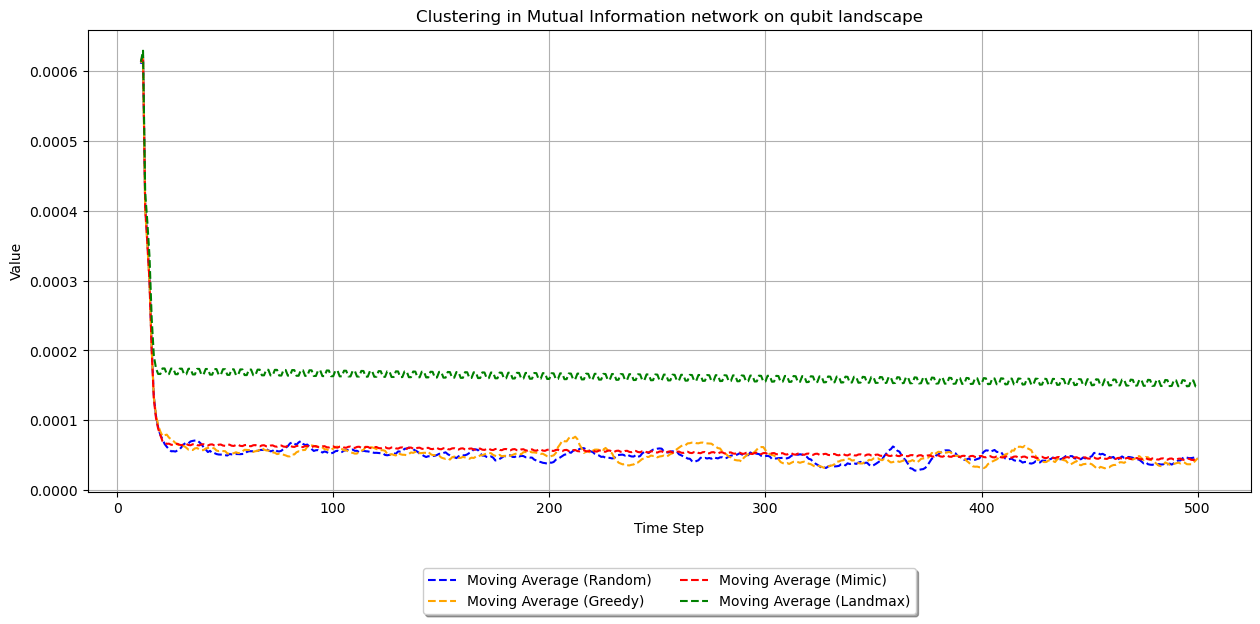

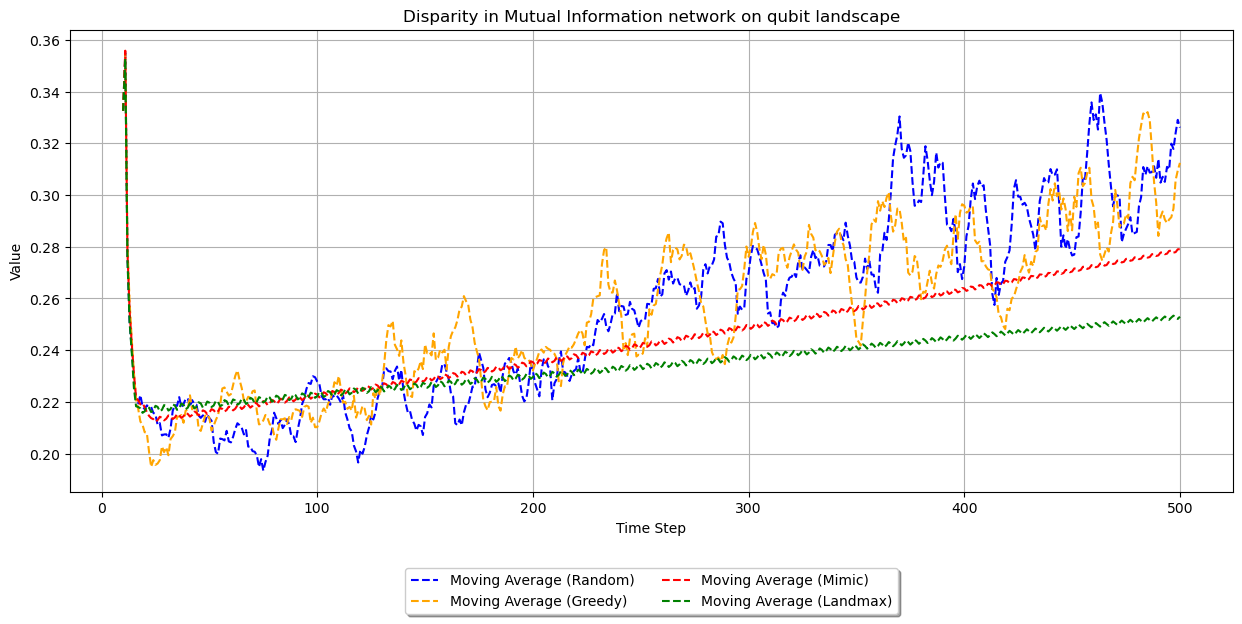

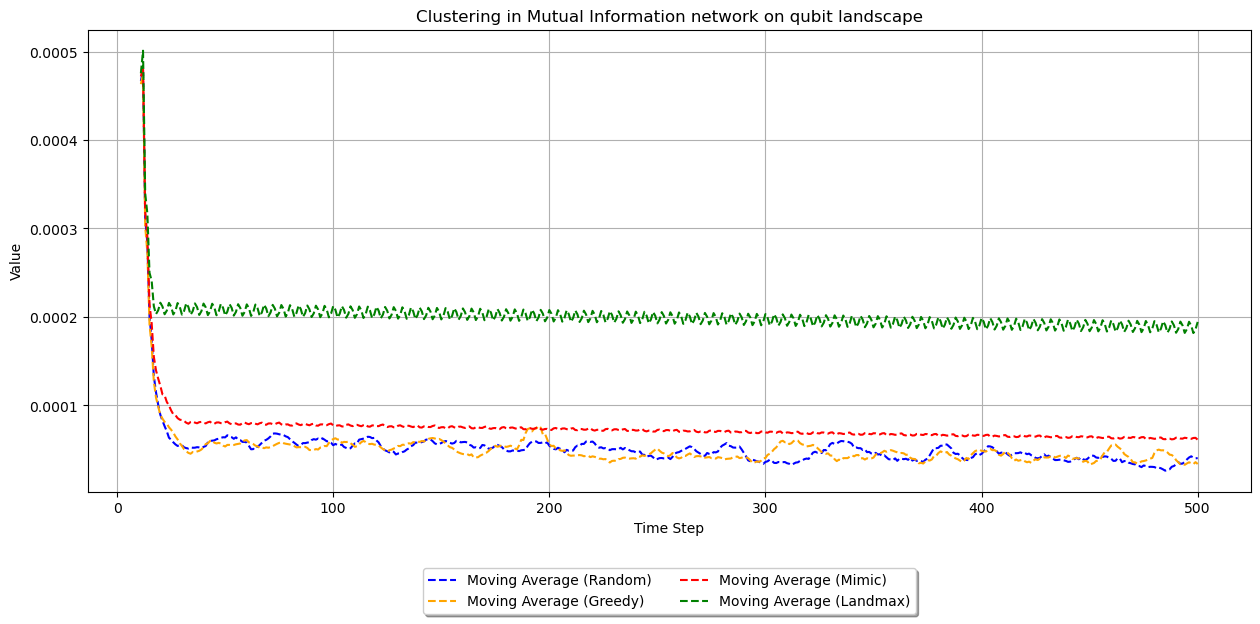

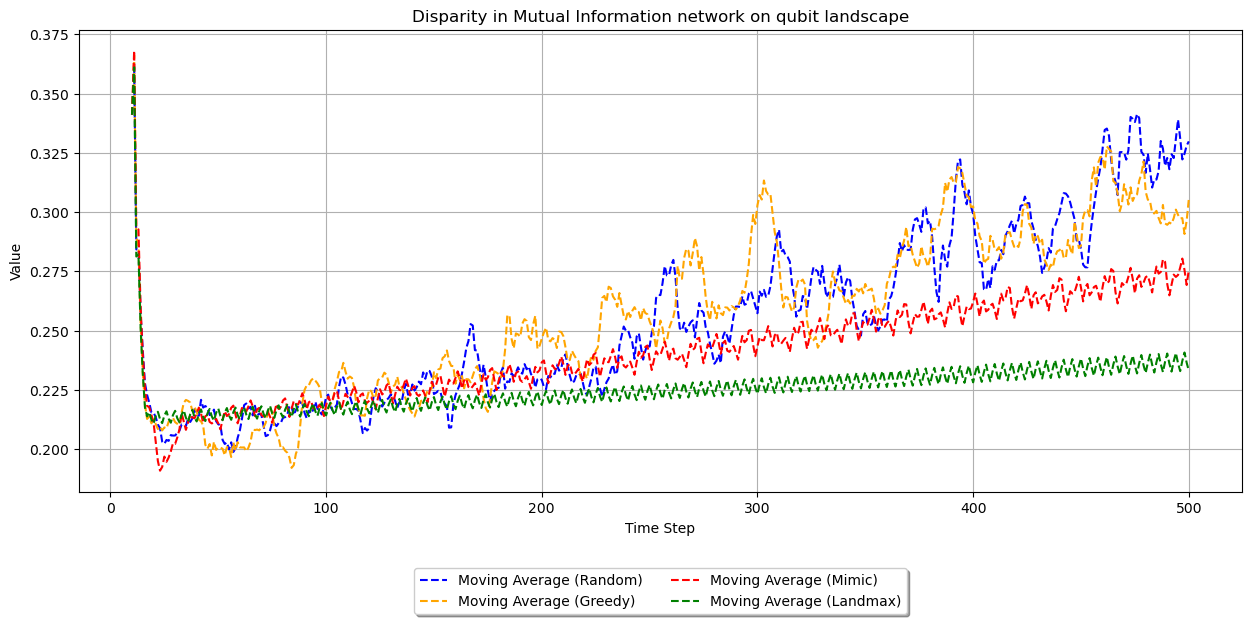

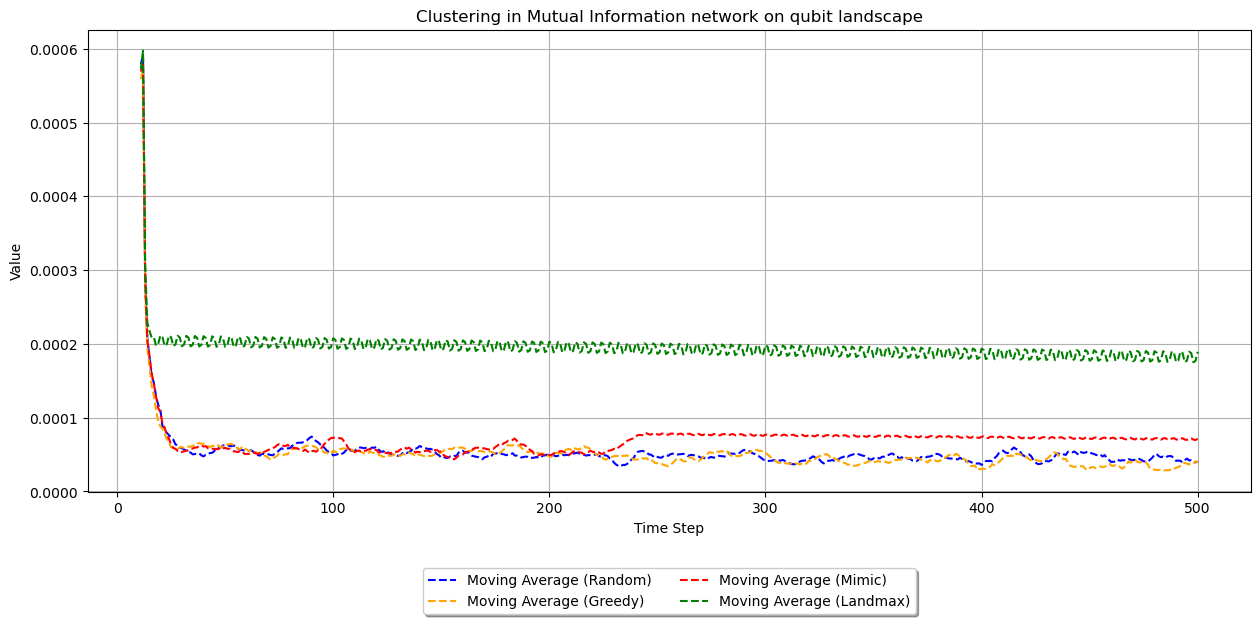

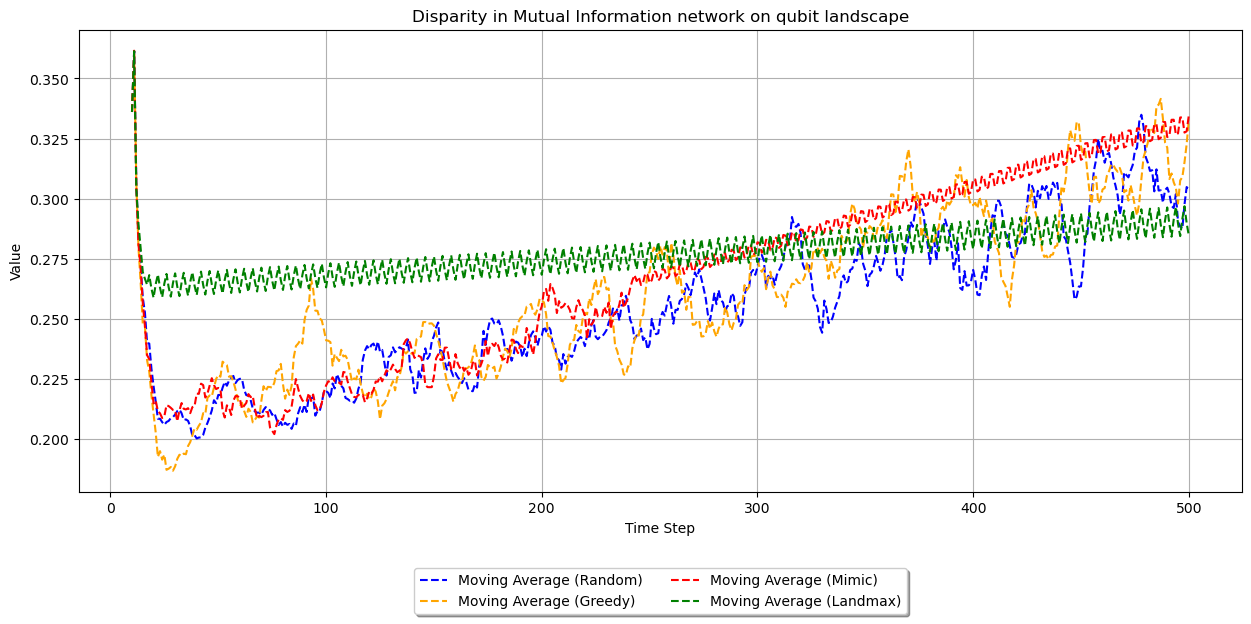

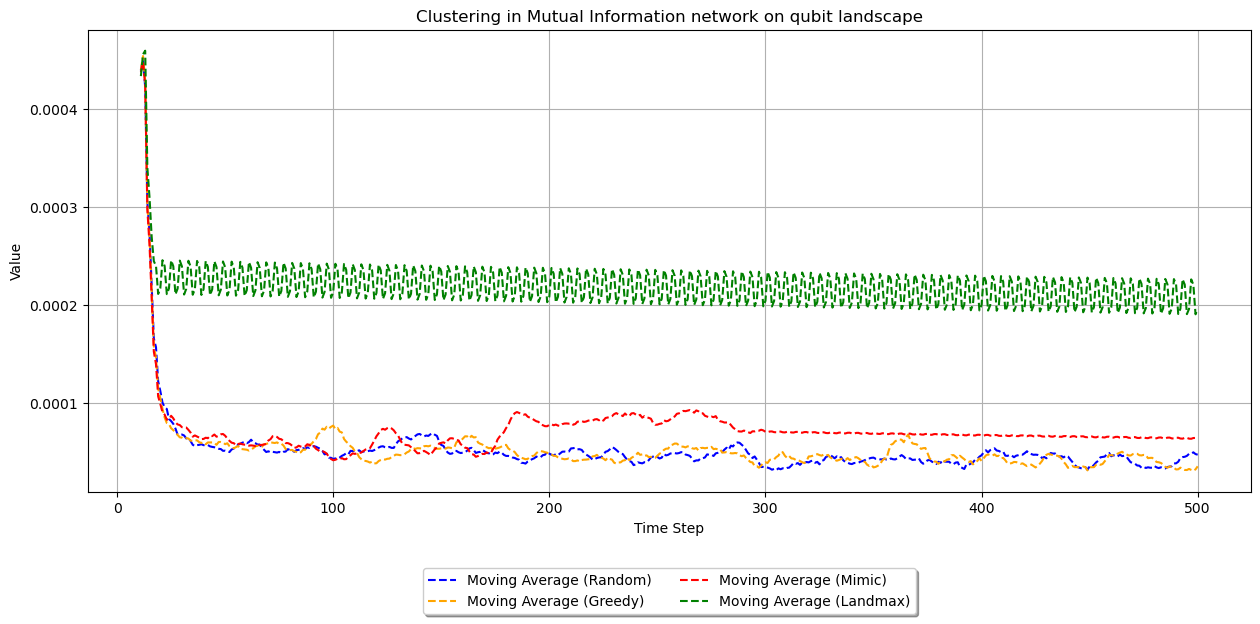

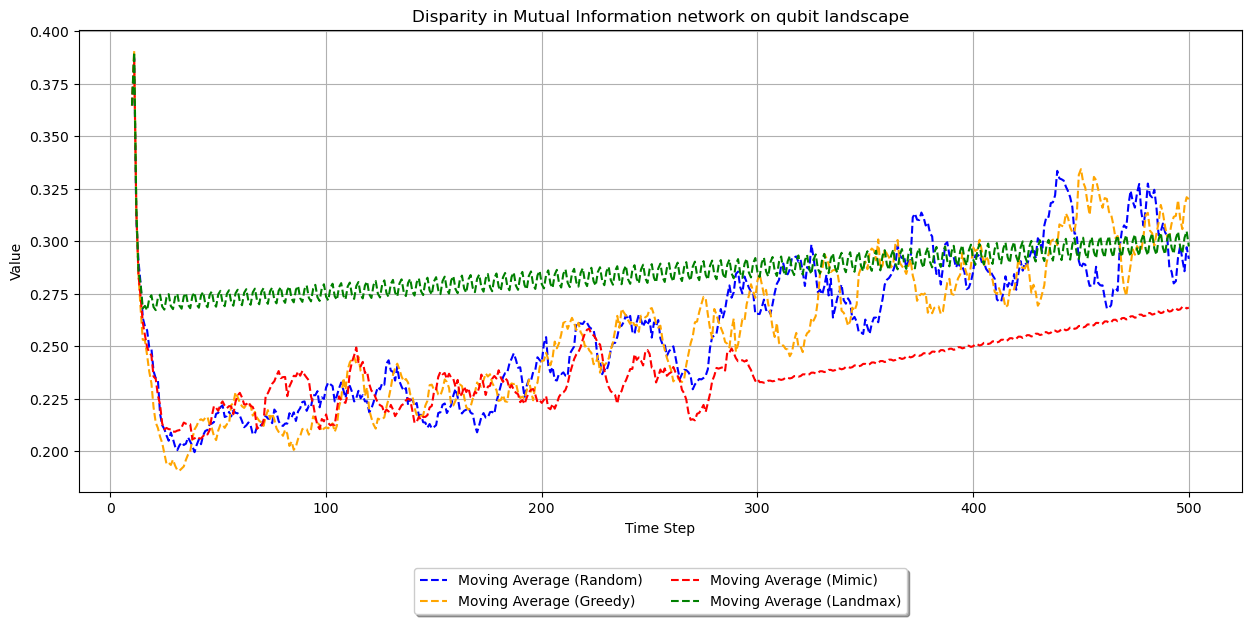

In [87]:
num_nodes=10
list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
for conn in list_conn:
    twoQdmsrandom = get_2_qbit_dms(newdata1,10,conn,"random")
    twoQdmsgreedy = get_2_qbit_dms(newdata2,10,conn,"greedy")
    twoQdmslandmax = get_2_qbit_dms(newdata4,10,conn,"landscape_maximizes")
    twoQdmsmimic = get_2_qbit_dms(newdata3,10,conn,"mimic")
    #twoQdmsweakmax = get_2_qbit_dms(newdata5,8,"c5","weakest_maximizes")

    adj_matrices_list_greedy = adjacency_matrices_list_two_dim(twoQdmsgreedy,0, num_nodes,mutual_info_dicts)
    adj_matrices_list_random = adjacency_matrices_list_two_dim(twoQdmsrandom,0, num_nodes,mutual_info_dicts)
    adj_matrices_list_landmax = adjacency_matrices_list_two_dim(twoQdmslandmax,0, num_nodes,mutual_info_dicts)
    adj_matrices_list_mimic = adjacency_matrices_list_two_dim(twoQdmsmimic,0, num_nodes,mutual_info_dicts)
    #C5
    clustering_greedy = clustering_coeff_function_of_time(np.array(adj_matrices_list_greedy))
    clustering_random = clustering_coeff_function_of_time(np.array(adj_matrices_list_random))
    clustering_landmax = clustering_coeff_function_of_time(np.array(adj_matrices_list_landmax))
    clustering_mimic= clustering_coeff_function_of_time(np.array(adj_matrices_list_mimic))
    #plot_four_stats_as_function_of_time(clustering_random,clustering_greedy, clustering_landmax,clustering_mimic, filename='clustering_c5_temp_var',title = 'Clustering in Mutual Information network on qubit landscape')
    #plt.show()
    plot_four_stats_as_function_of_time_avg(clustering_random,clustering_greedy, clustering_mimic,clustering_landmax, filename='clustering_c5_temp_var',title = 'Clustering in Mutual Information network on qubit landscape')
    plt.show()
    
    #C5
    disparity_greedy = disparity_function_of_time(np.array(adj_matrices_list_greedy),10)
    disparity_random = disparity_function_of_time(np.array(adj_matrices_list_random),10)
    disparity_landmax = disparity_function_of_time(np.array(adj_matrices_list_landmax),10)
    disparity_mimic = disparity_function_of_time(np.array(adj_matrices_list_mimic),10)
    #plot_four_stats_as_function_of_time(disparity_random,disparity_greedy, disparity_landmax,disparity_mimic, filename='disparity_c5_temp_var',title = 'Disparity in Mutual Information network on qubit landscape')
    #plt.show()
    plot_four_stats_as_function_of_time_avg(disparity_random,disparity_greedy, disparity_mimic,disparity_landmax, filename='disparity_c5_temp_var_avg',title = 'Disparity in Mutual Information network on qubit landscape')
    plt.show()

/var/folders/x8/hv6lnsx5209d4m84b842j095n23ctf/T/ipykernel_60441/1734428674.py:11: RuntimeWarning: invalid value encountered in scalar divide
  C_list.append(M_cube_trace/sum_of_M_sq)


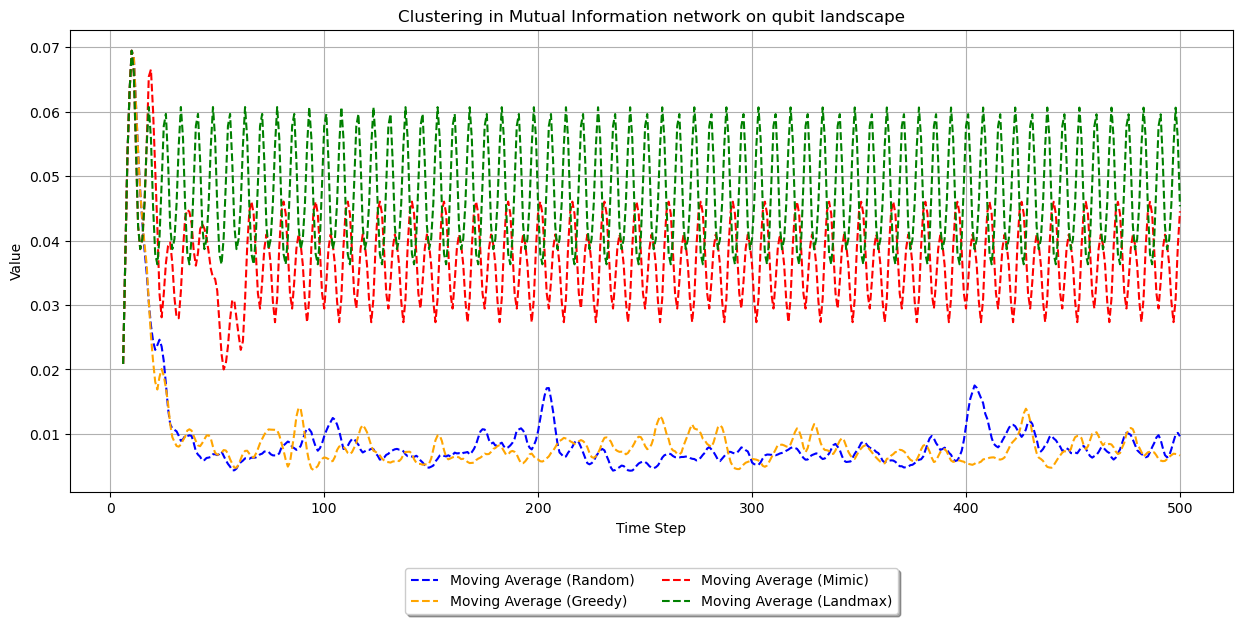

/var/folders/x8/hv6lnsx5209d4m84b842j095n23ctf/T/ipykernel_60441/1734428674.py:21: RuntimeWarning: invalid value encountered in divide
  Di = np.where(M_row_sum_squared != 0, M_row_sum_of_squared_elements / M_row_sum_squared, 0)


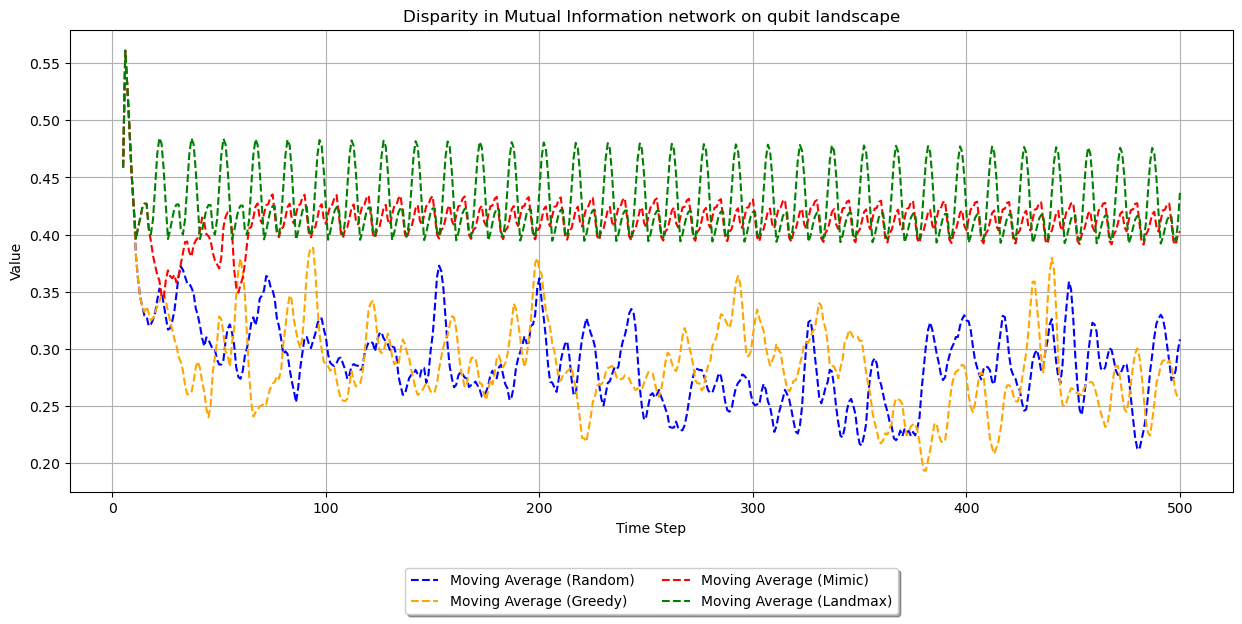

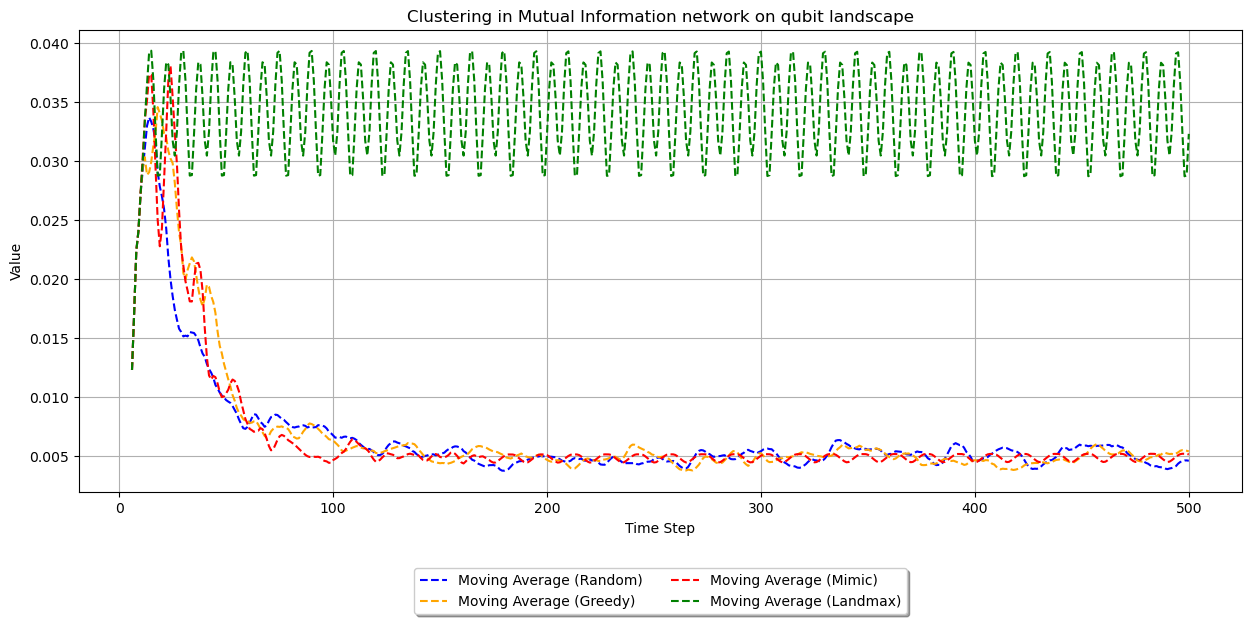

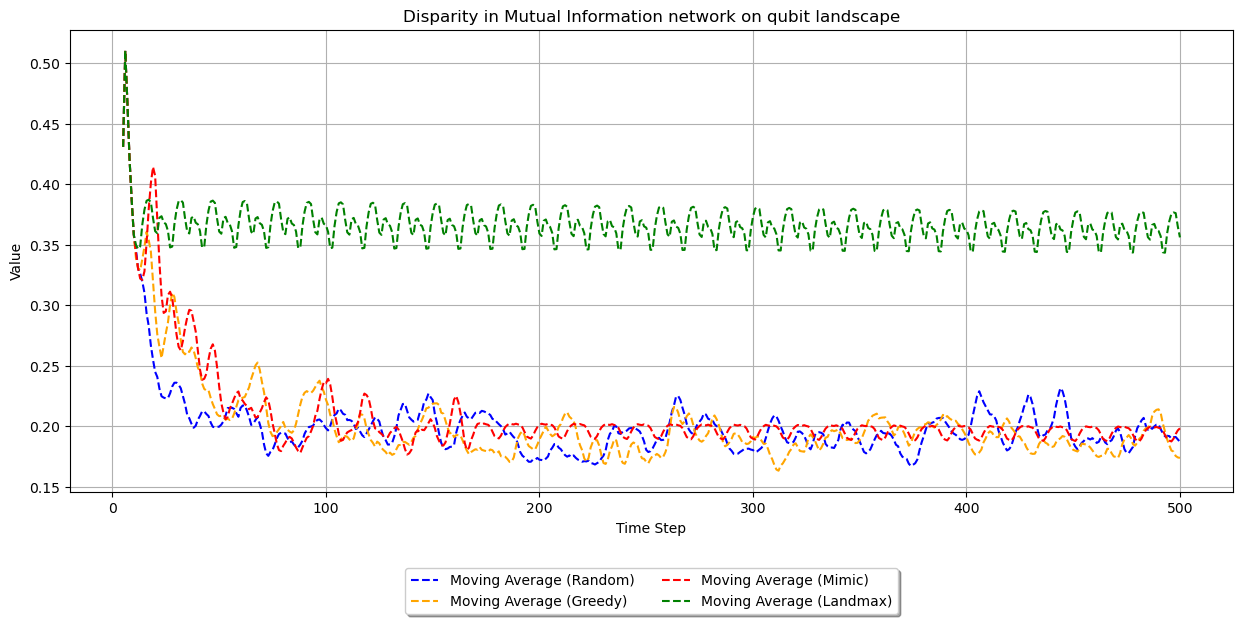

In [41]:
num_nodes=12
list_conn = ["c2_2local","c4_2local"]
for conn in list_conn:
    twoQdmsrandom = get_2_qbit_dms(newdata1,12,conn,"random")
    twoQdmsgreedy = get_2_qbit_dms(newdata2,12,conn,"greedy")
    twoQdmslandmax = get_2_qbit_dms(newdata4,12,conn,"landscape_maximizes")
    twoQdmsmimic = get_2_qbit_dms(newdata3,12,conn,"mimic")
    #twoQdmsweakmax = get_2_qbit_dms(newdata5,8,"c5","weakest_maximizes")

    adj_matrices_list_greedy = adjacency_matrices_list_two_dim(twoQdmsgreedy,0, num_nodes,mutual_info_dicts)
    adj_matrices_list_random = adjacency_matrices_list_two_dim(twoQdmsrandom,0, num_nodes,mutual_info_dicts)
    adj_matrices_list_landmax = adjacency_matrices_list_two_dim(twoQdmslandmax,0, num_nodes,mutual_info_dicts)
    adj_matrices_list_mimic = adjacency_matrices_list_two_dim(twoQdmsmimic,0, num_nodes,mutual_info_dicts)
    #C5
    clustering_greedy = clustering_coeff_function_of_time(np.array(adj_matrices_list_greedy))
    clustering_random = clustering_coeff_function_of_time(np.array(adj_matrices_list_random))
    clustering_landmax = clustering_coeff_function_of_time(np.array(adj_matrices_list_landmax))
    clustering_mimic= clustering_coeff_function_of_time(np.array(adj_matrices_list_mimic))
    #plot_four_stats_as_function_of_time(clustering_random,clustering_greedy, clustering_landmax,clustering_mimic, filename='clustering_c5_temp_var',title = 'Clustering in Mutual Information network on qubit landscape')
    #plt.show()
    plot_four_stats_as_function_of_time_avg(clustering_random,clustering_greedy, clustering_mimic,clustering_landmax, filename='clustering_c5_temp_var',title = 'Clustering in Mutual Information network on qubit landscape')
    plt.show()
    
    #C5
    disparity_greedy = disparity_function_of_time(np.array(adj_matrices_list_greedy),10)
    disparity_random = disparity_function_of_time(np.array(adj_matrices_list_random),10)
    disparity_landmax = disparity_function_of_time(np.array(adj_matrices_list_landmax),10)
    disparity_mimic = disparity_function_of_time(np.array(adj_matrices_list_mimic),10)
    #plot_four_stats_as_function_of_time(disparity_random,disparity_greedy, disparity_landmax,disparity_mimic, filename='disparity_c5_temp_var',title = 'Disparity in Mutual Information network on qubit landscape')
    #plt.show()
    plot_four_stats_as_function_of_time_avg(disparity_random,disparity_greedy, disparity_mimic,disparity_landmax, filename='disparity_c5_temp_var_avg',title = 'Disparity in Mutual Information network on qubit landscape')
    plt.show()

In [28]:
# generate exractable work and change in extractable work data for greedy
def change_in_ex_work(connectivity,update_rule,data,num):
    sizes = [num]
    connectivities = [connectivity]
    temps = ['cold','hot']
    result = {s:{t:{} for t in temps} for s in sizes}
    for size in sizes:
        for connectivity in connectivities:
            pops = get_pops(data,size,connectivity,update_rule)
            extractable_work = np.array([[measure.extractable_work_of_each_qubit_from_pops(p) for p in time_slice ]for time_slice in pops ])
            change_in_ex_work = np.diff(extractable_work,axis = 1)
    return change_in_ex_work


In [29]:
def average_values_two_point_list(adj_matrices_list):
    average_values_two_point_list=[]
    for adj_matrix in adj_matrices_list:
        adj_matrix_form = np.matrix(adj_matrix)
        average_values_two_point = adj_matrix_form.sum(axis=1)
        average_values_two_point=np.array(average_values_two_point).flatten()
        average_values_two_point=np.real(average_values_two_point)
        average_values_two_point_list.append(average_values_two_point)
    return average_values_two_point_list

#average_mi_in_time_per_qubit_random=np.array(average_values_two_point_list(adj_matrices_list_random))
#average_mi_in_time_per_qubit_greedy=np.array(average_values_two_point_list(adj_matrices_list_greedy))
#average_mi_in_time_per_qubit_landmax=np.array(average_values_two_point_list(adj_matrices_list_landmax))
#average_mi_in_time_per_qubit_mimic=np.array(average_values_two_point_list(adj_matrices_list_mimic))

In [30]:
def count_positive_steps(list_of_lists, index):
    total_positive_steps = 0
    consecutive_positive_steps = 0
    consecutive_lengths = []  # List to store lengths of consecutive positive sequences
    
    for lst in list_of_lists:
        if lst[index] > 0:
            total_positive_steps += 1
            consecutive_positive_steps += 1
        else:
            consecutive_lengths.append(consecutive_positive_steps)  # Record length of consecutive positive sequence
            consecutive_positive_steps = 0  # Reset consecutive count if value becomes non-positive
            
    # Add the last consecutive count if the list ends with a positive value
    if consecutive_positive_steps > 0:
        consecutive_lengths.append(consecutive_positive_steps)
        
    return total_positive_steps, consecutive_lengths

def tally_elements(lst):
    tally = {}
    for element in lst:
        tally[element] = tally.get(element, 0) + 1
    return tally

def plot_histogram(ax, tally, label):
    elements = list(tally.keys())
    counts = list(tally.values())

    ax.bar(elements, counts)
    ax.set_xlabel('Element')
    ax.set_ylabel('Frequency')
    ax.set_title(label)
    ax.legend(label)

def Num_steps_positive(change_in_ex_work):
    Num_steps_positive=[]
    for qubit_index in range(8):
        Num_steps_positive.append(count_positive_steps(change_in_ex_work,qubit_index)[0])
    return Num_steps_positive

def list_of_consecutive_positive_steps(change_in_ex_work):
    sum=[0]
    for qubit_id in range(8):
        sum = sum+count_positive_steps(change_in_ex_work,qubit_id)[1]
    return sum

In [31]:
def average_time_step_Q_positive(num_qubits,changein_Wex):
    average_time_positive = []
    for qubit_index in range(num_qubits):
        average_time_positive.append(np.mean(count_positive_steps(changein_Wex[trial_index], qubit_index)[1]))
    return average_time_positive

#takes in a dictionary
def avg_time_step_positive(tally):
    num=0
    denom=0
    for key,values in tally.items():
        num = values*key+num
        denom=values+denom
    return num/denom

In [36]:
#(avg_time_step_positive(tally_random), average_ex_resource_landscape(change_in_ex_work_random[0]))
val=[0]
for key,values in tally_greedy.items():
    val.append(values)
val=np.mean(val)
avg_time_step_positive(tally_greedy)

def list_of_cosec_positive_steps_no_zeros(change_in):
    listt=[]
    for ele in list_of_consecutive_positive_steps(change_in):
        if ele != 0:
            listt.append(ele)
    return listt

def consecutive_positives_with_cumulative_sum_no_zeores(change_in):
    list2=[]
    for ele in np.array(replace_consecutive_positives_with_cumulative_sum(replace_negatives_with_zero(change_in))).flatten():
        if ele!=0:
            list2.append(ele)
    return list2

In [33]:
#get average of the cumulative positive change in extractable work since this is the value you can extract at any point from the landscape as resource
def replace_negatives_with_zero(lst):
    for sublist in lst:
        for i in range(len(sublist)):
            if sublist[i] < 0:
                sublist[i] = 0
    return lst

def replace_consecutive_positives_with_cumulative_sum(list_of_lists):
    lst = [list(column) for column in zip(*list_of_lists)]
    for sublist in lst:
        cumulative_sum = 0
        consecutive_positive_count = 0
        for i in range(len(sublist)):
            if sublist[i] > 0:
                cumulative_sum += sublist[i]
                consecutive_positive_count += 1
                if i == len(sublist) - 1 or sublist[i + 1] == 0:
                    if consecutive_positive_count > 1:
                        for j in range(i - consecutive_positive_count + 1, i + 1):
                            sublist[j] = 0
                        sublist[i] = cumulative_sum
                    cumulative_sum = 0
                    consecutive_positive_count = 0
            else:
                cumulative_sum = 0
                consecutive_positive_count = 0
    return lst

def average_ex_resource_landscape(change_in_ex_work):
    means=[]
    for qubit in range(8):
        means.append(np.mean(replace_consecutive_positives_with_cumulative_sum(replace_negatives_with_zero(change_in_ex_work))[qubit]))
    return np.mean(means)

def average_cumulative_Wex(num_qubits,changein_Wex):
    average_time_positive = []
    for qubit_index in range(num_qubits):
        average_time_positive.append(np.mean(count_positive_steps(changein_Wex, qubit_index)[1]))
    return average_time_positive
    
def total_wex(num_qubits,changein_Wex):
    total_wex = []
    for qubit_index in range(num_qubits):
        changein_Wex[0:99,qubit_index]
        total_wex.append(sum(changein_Wex[0:99,qubit_index]))
    return total_wex

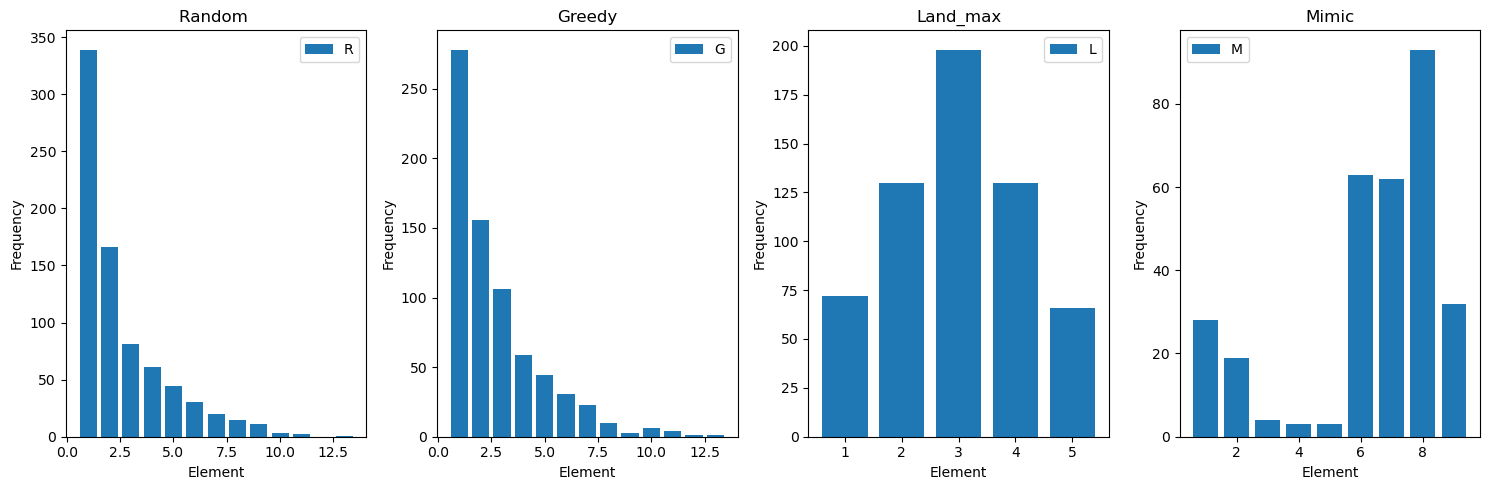

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


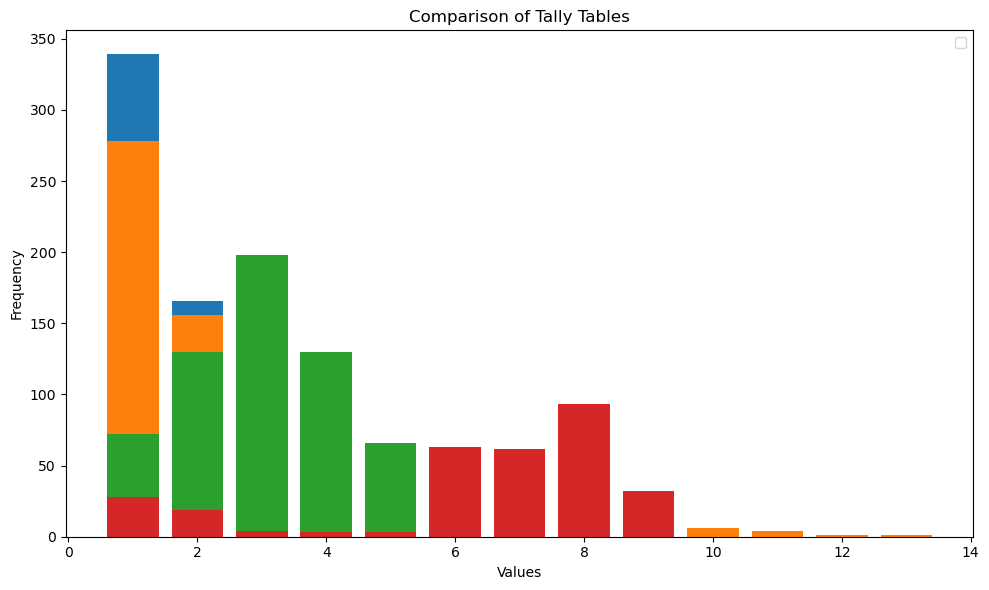

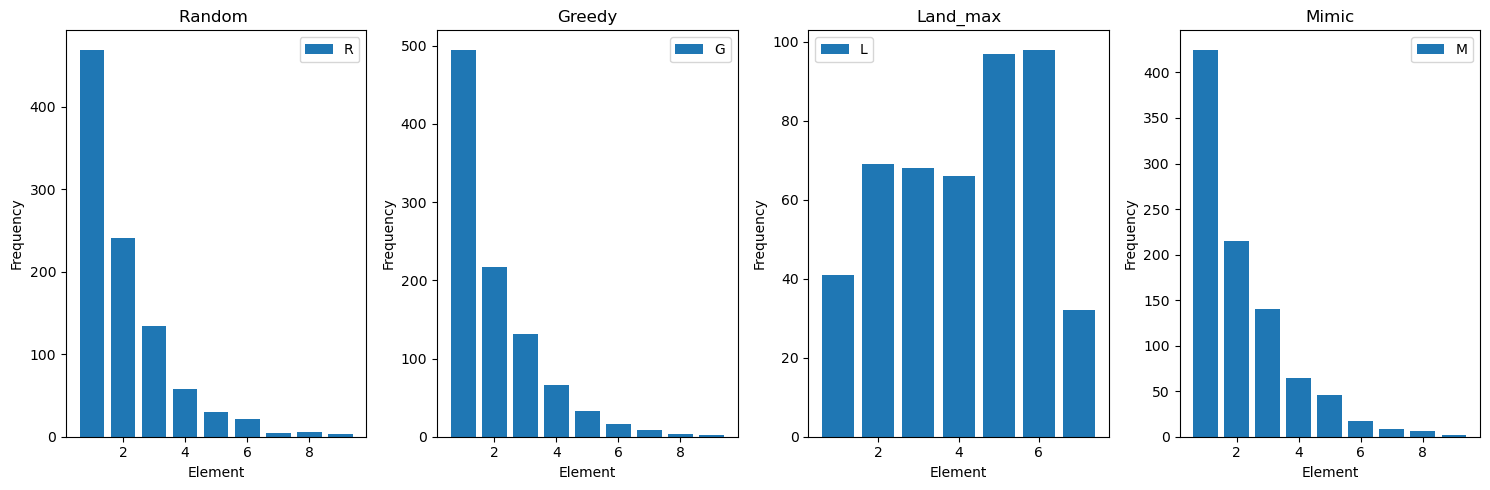

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


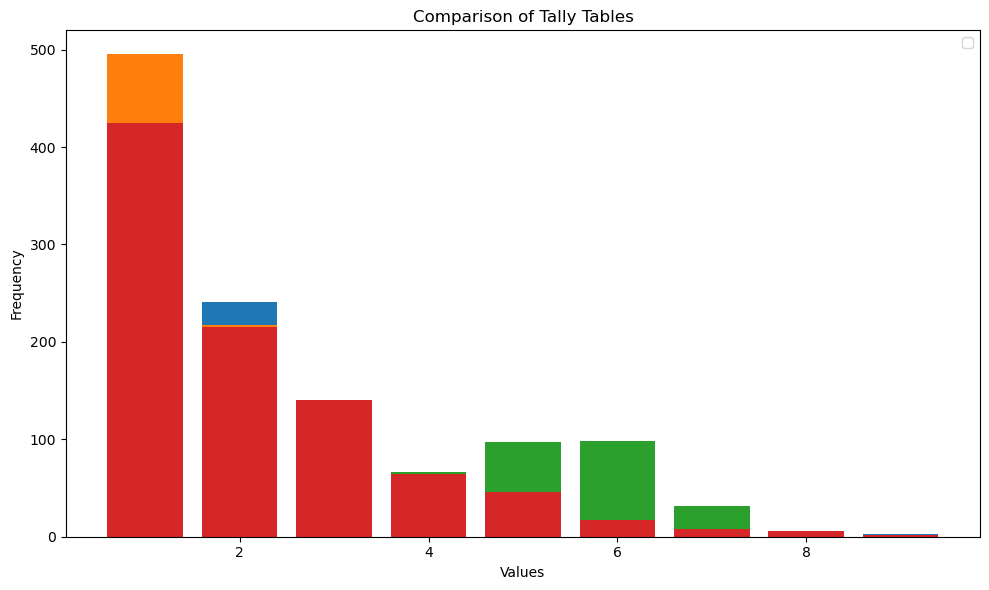

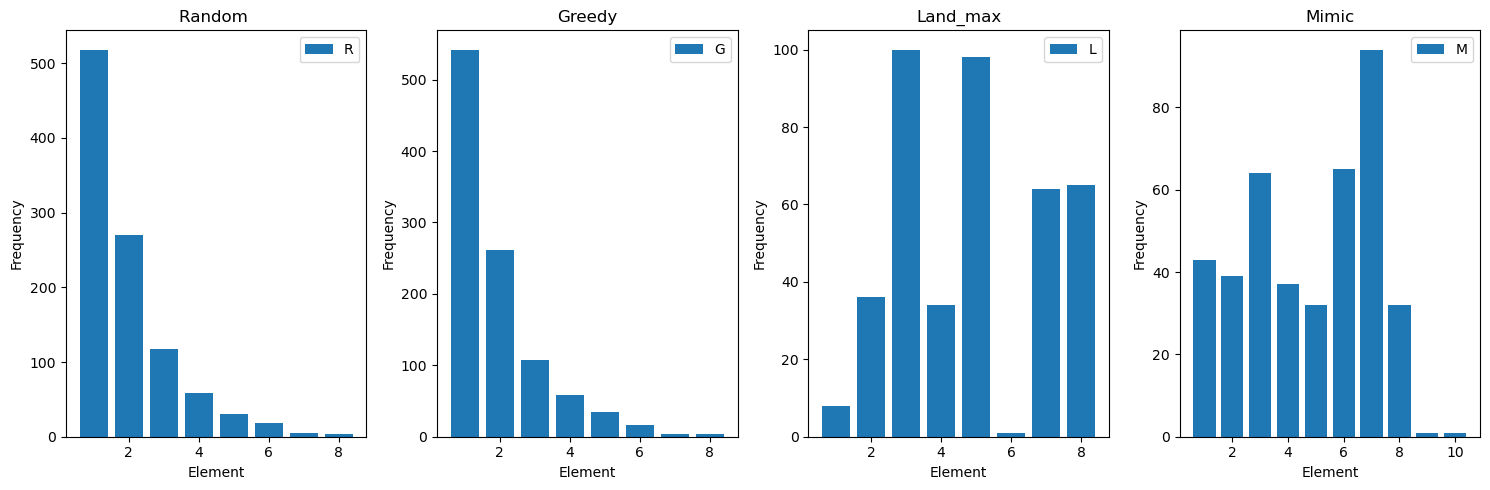

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


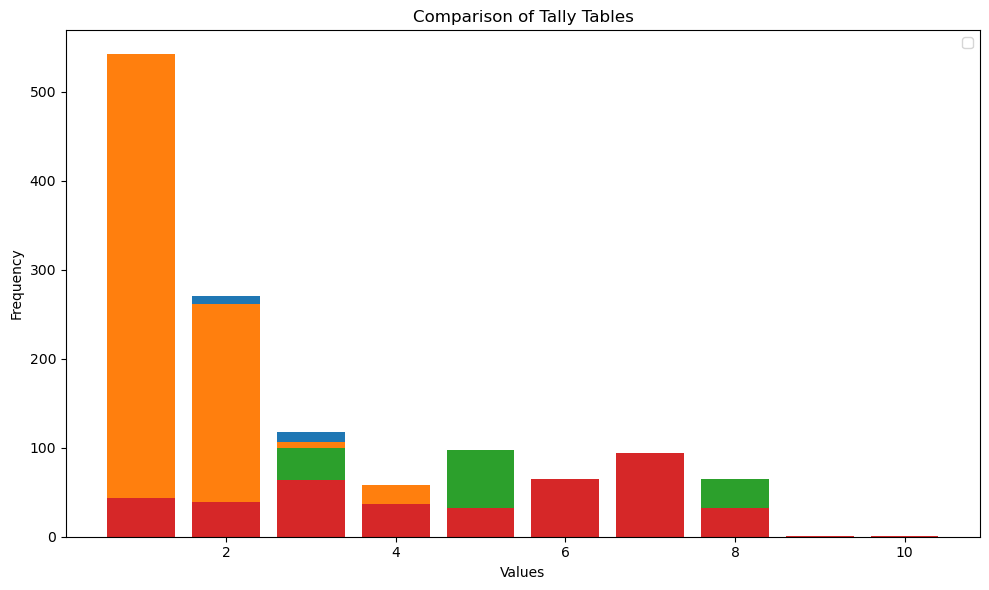

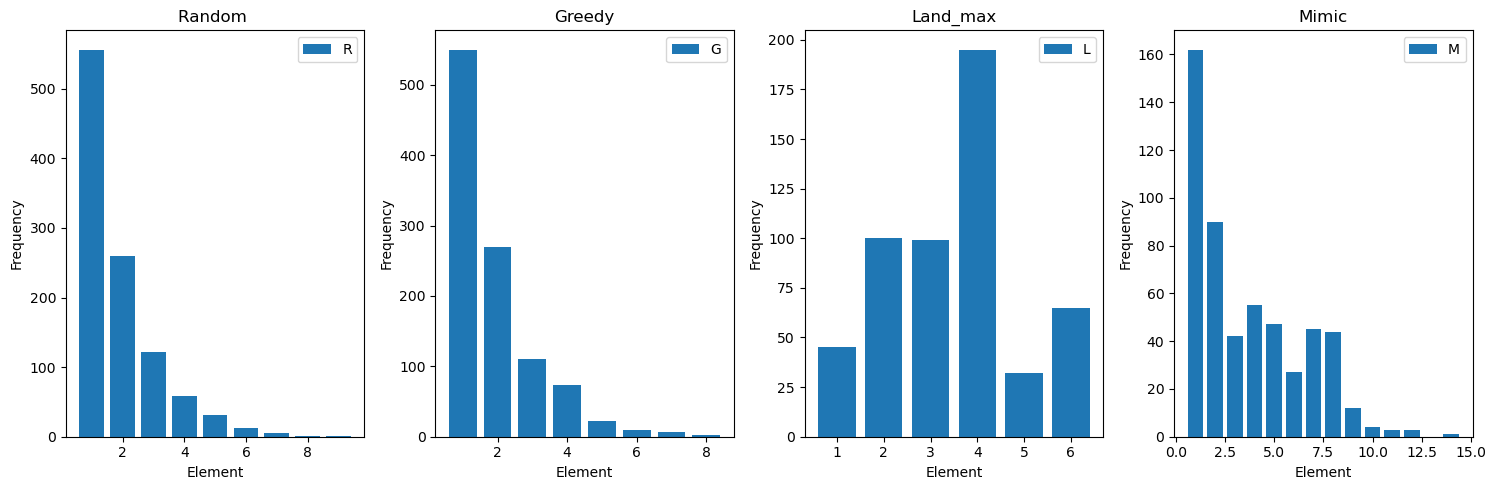

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


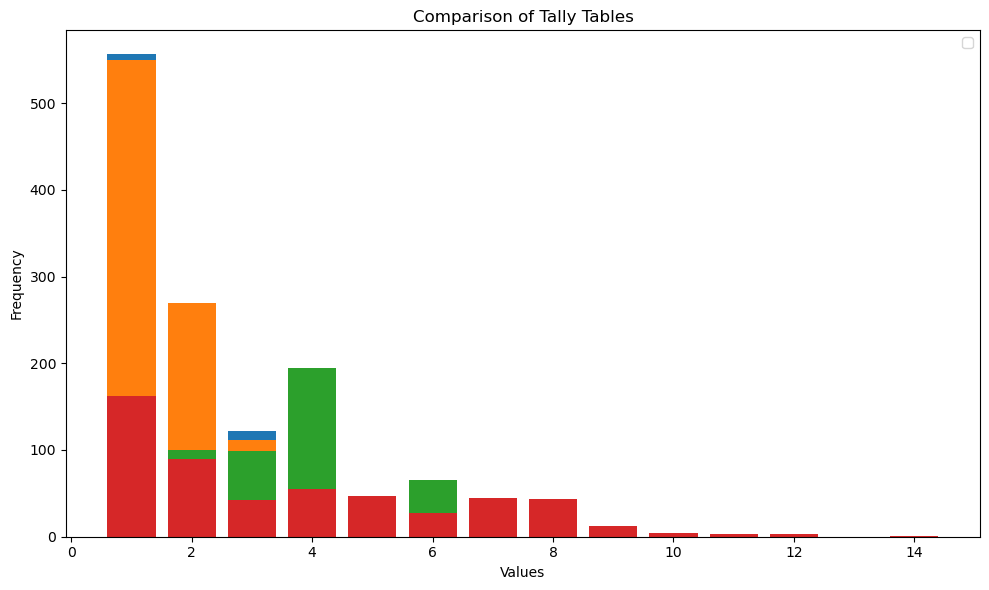

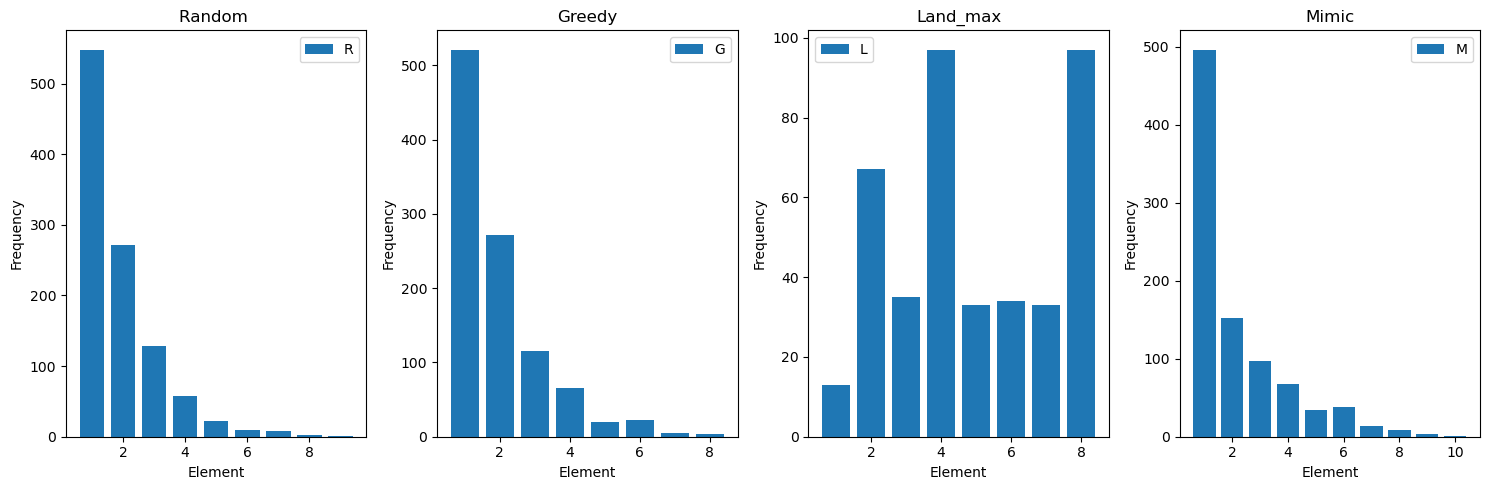

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


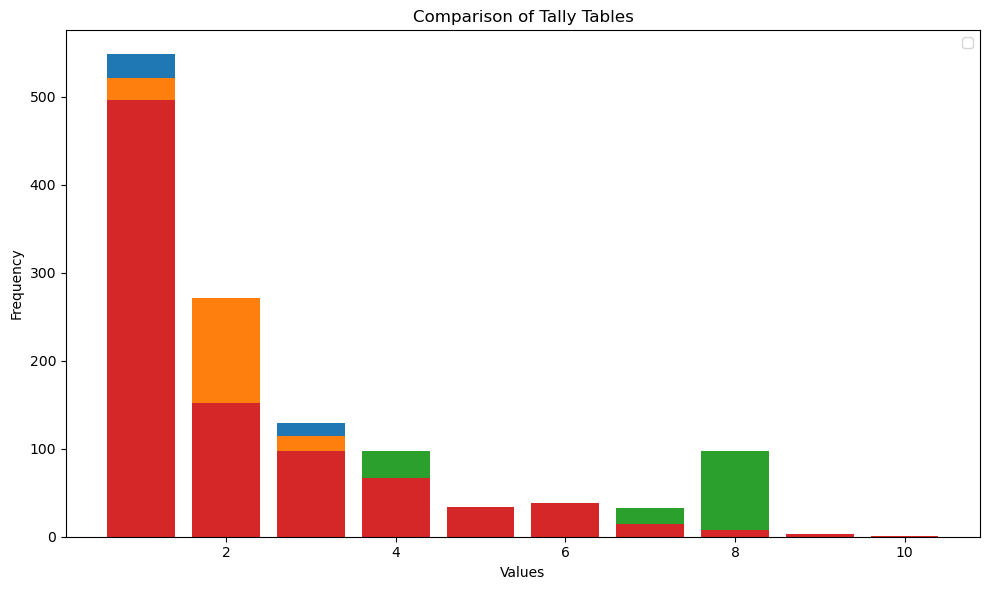

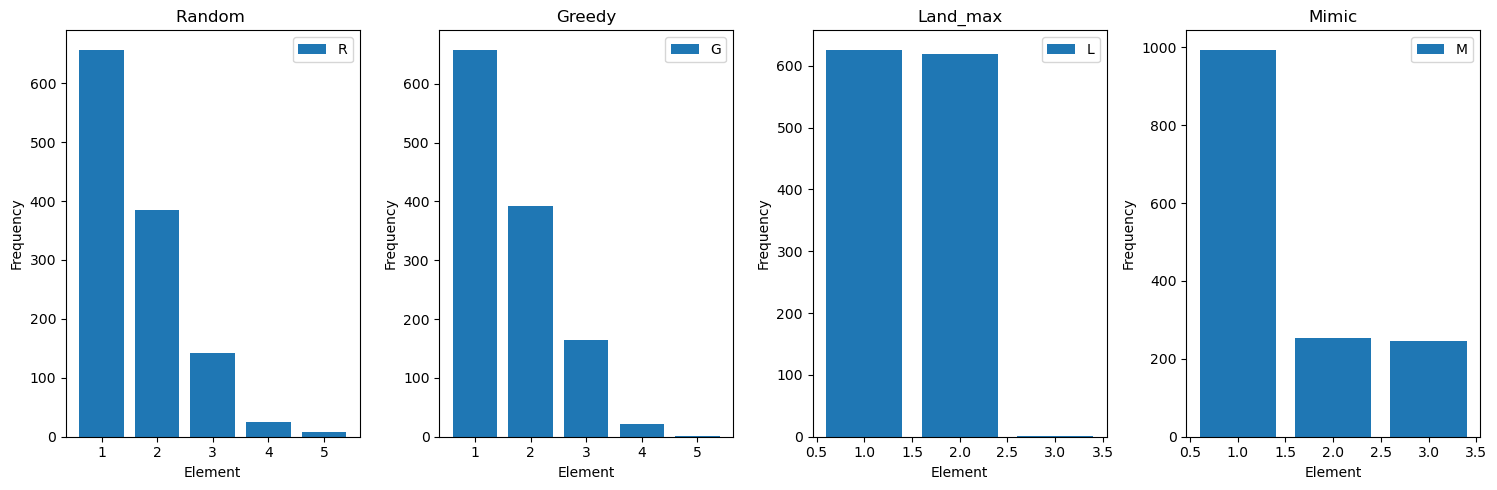

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


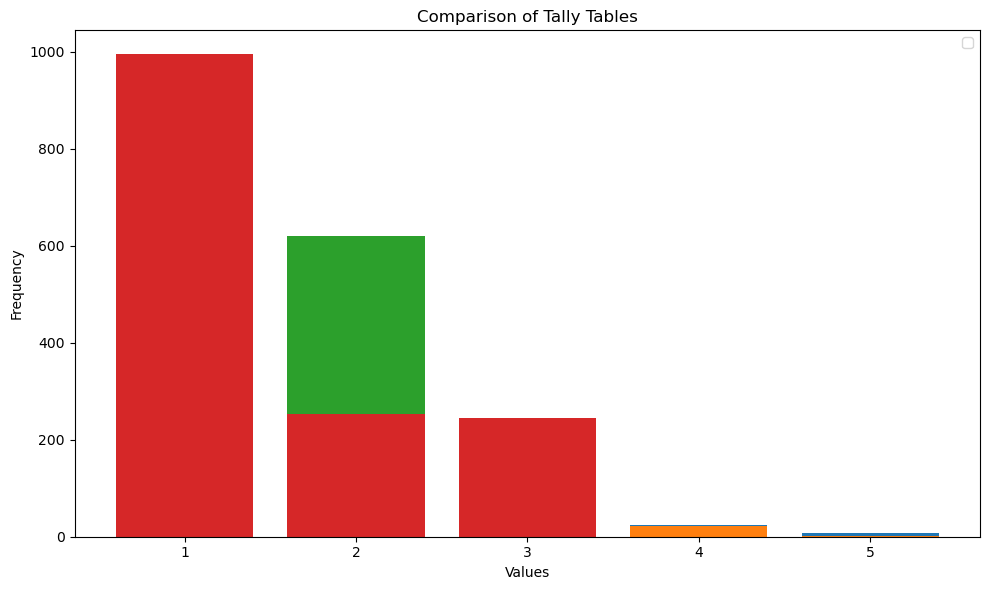

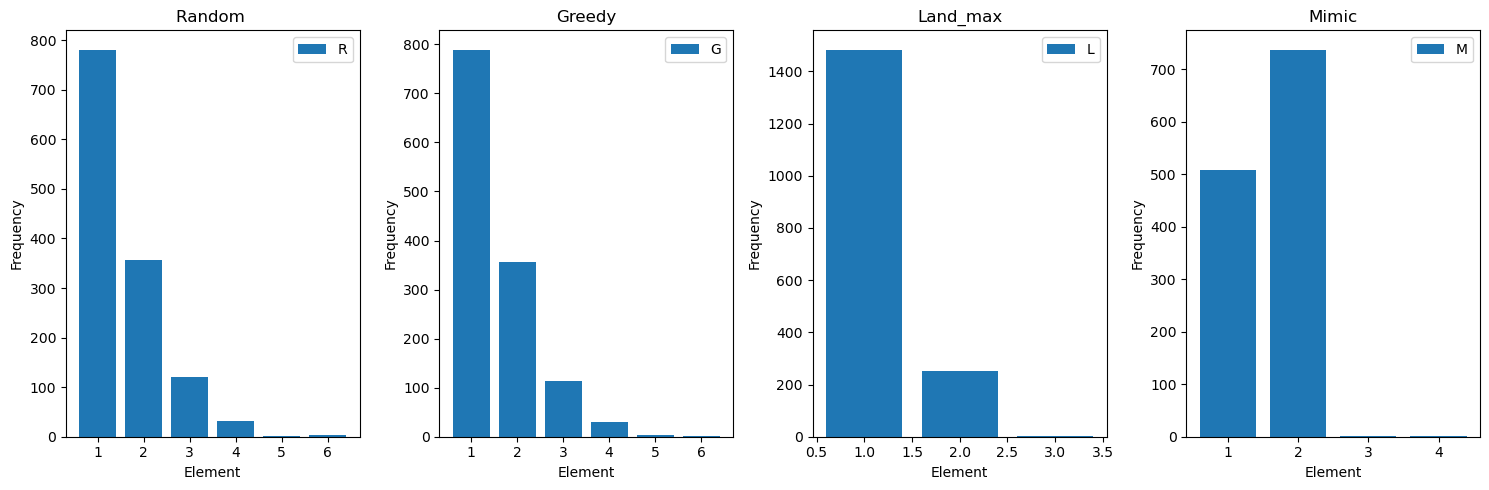

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


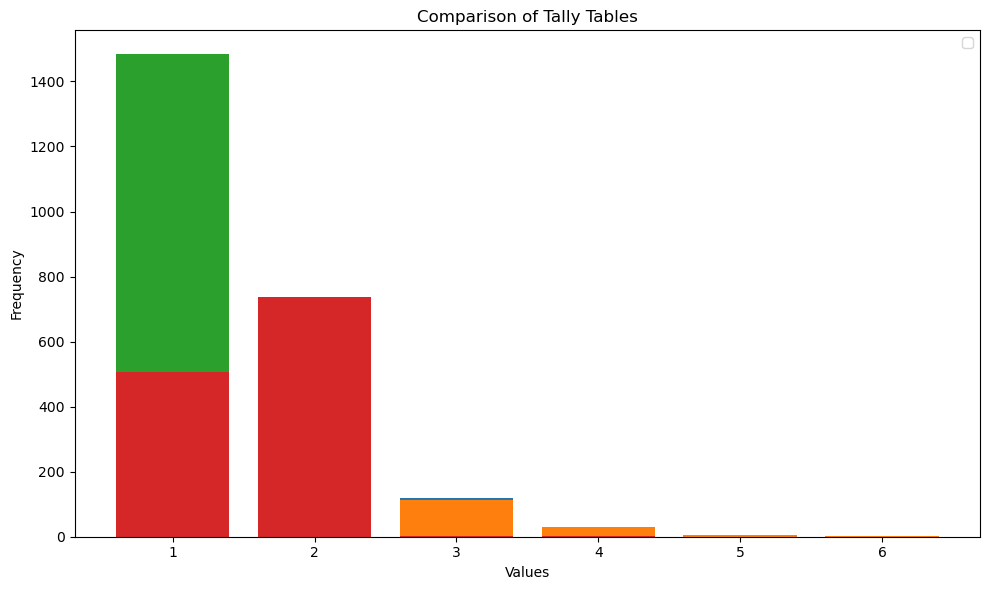

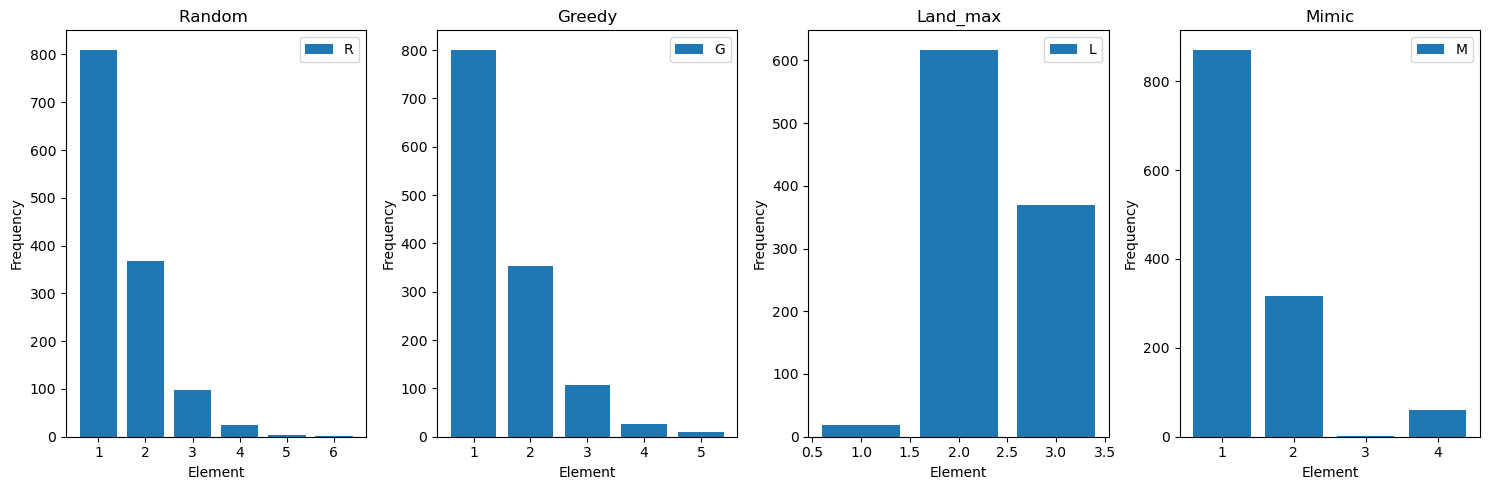

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


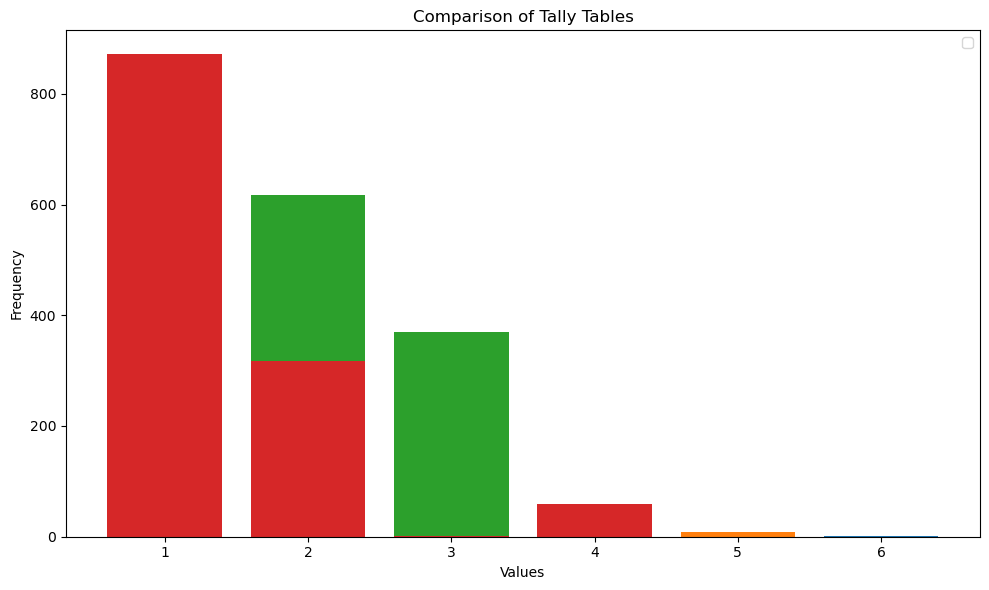

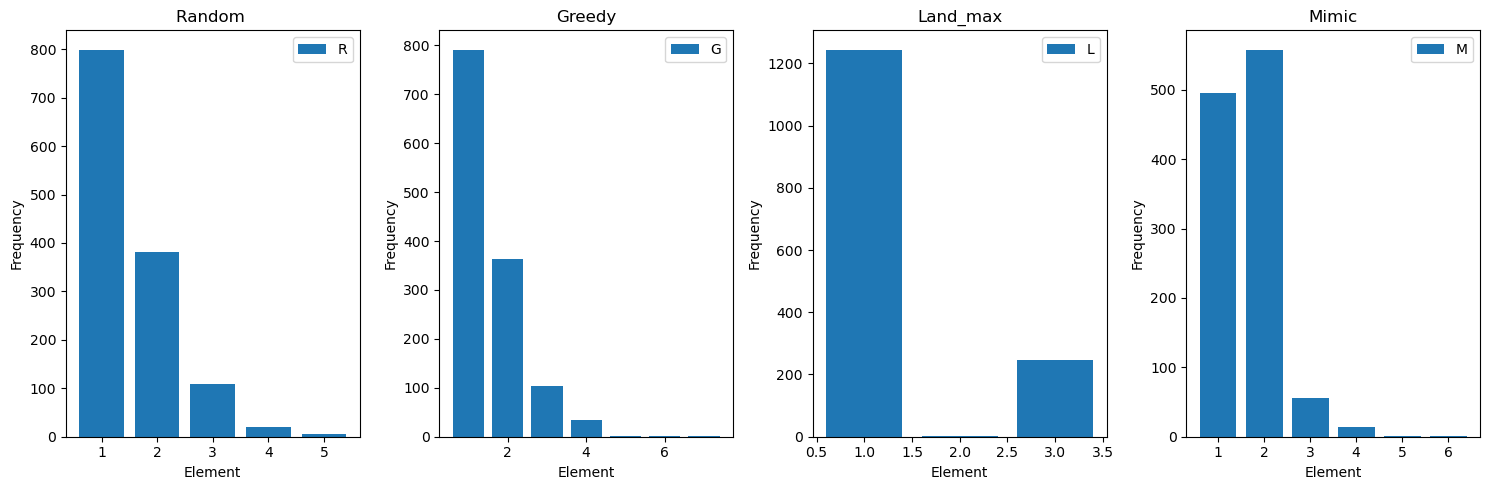

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


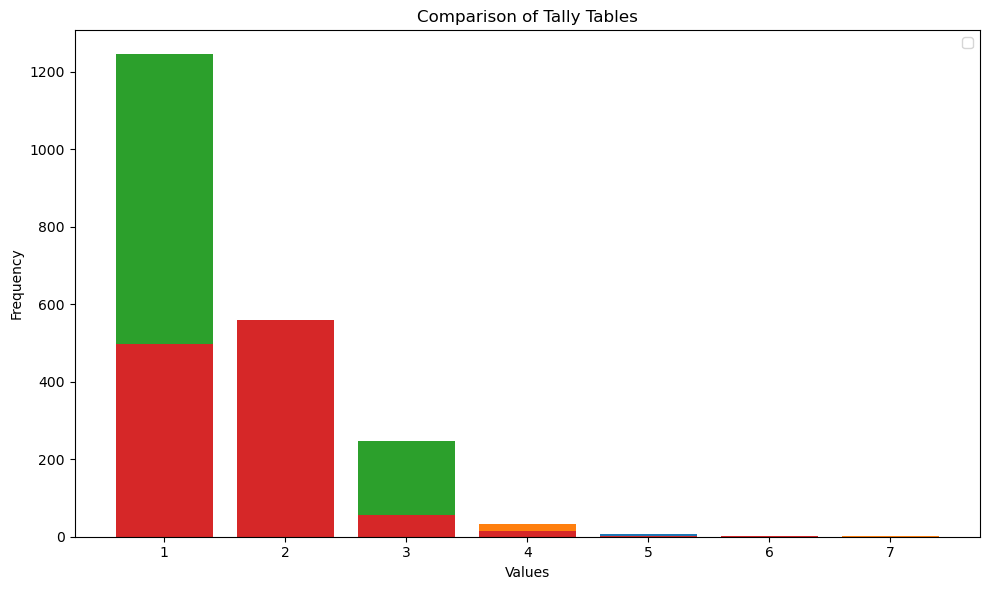

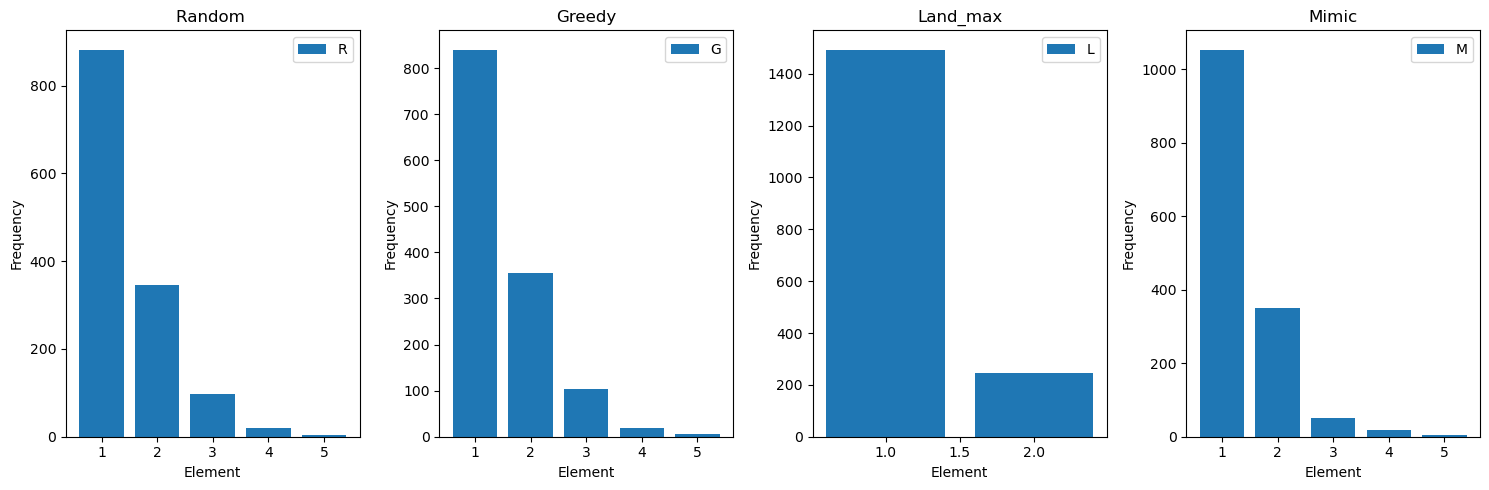

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


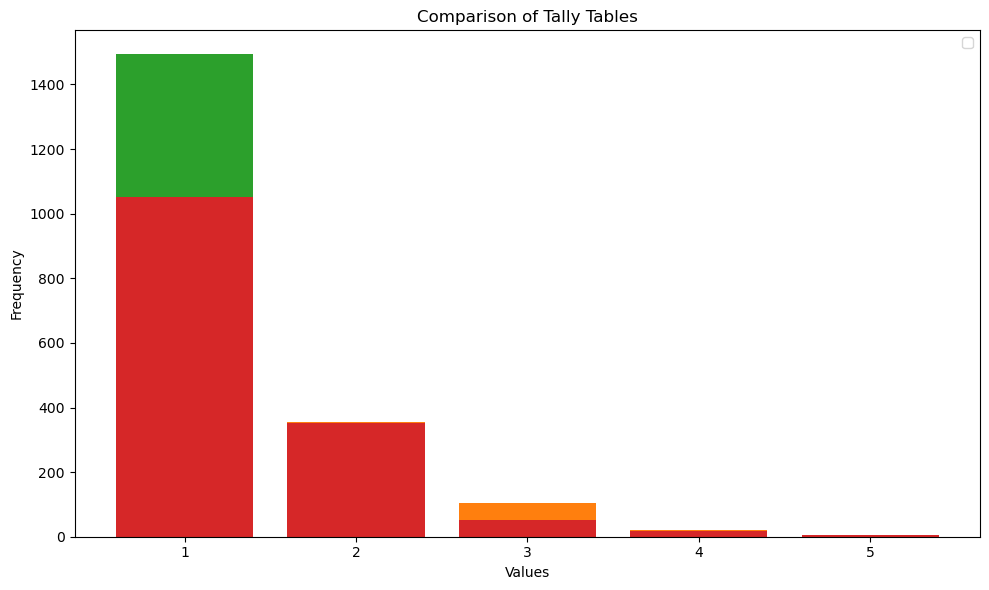

In [37]:
list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
sizes=[8,10]
for size in sizes:
    for conn in list_conn:
        change_in_ex_work_random=change_in_ex_work(conn,"random",newdata1,size)
        change_in_ex_work_greedy=change_in_ex_work(conn,"greedy",newdata2,size)
        change_in_ex_work_mimic=change_in_ex_work(conn,"mimic",newdata3,size)
        change_in_ex_work_landmax=change_in_ex_work(conn,"landscape_maximizes",newdata4,size)
        
        Num_steps_positive_random = Num_steps_positive(change_in_ex_work_random[0])
        Num_steps_positive_greedy = Num_steps_positive(change_in_ex_work_greedy[0])
        Num_steps_positive_mimic = Num_steps_positive(change_in_ex_work_mimic[0])
        Num_steps_positive_landmax = Num_steps_positive(change_in_ex_work_landmax[0])
        
        tally_random=tally_elements(list_of_consecutive_positive_steps(change_in_ex_work_random[0]))
        tally_greedy=tally_elements(list_of_consecutive_positive_steps(change_in_ex_work_greedy[0]))
        tally_landmax=tally_elements(list_of_consecutive_positive_steps(change_in_ex_work_landmax[0]))
        tally_mimic=tally_elements(list_of_consecutive_positive_steps(change_in_ex_work_mimic[0]))
        
        del tally_landmax[0]
        del tally_random[0]
        del tally_greedy[0]
        del tally_mimic[0]
    
        
        fig, axs = plt.subplots(1, 4, figsize=(15, 5))
        
        plot_histogram(axs[0], tally_random, 'Random ')
        plot_histogram(axs[1], tally_greedy, 'Greedy')
        plot_histogram(axs[2], tally_landmax, 'Land_max')
        plot_histogram(axs[3], tally_mimic, 'Mimic')
        
        plt.tight_layout()
        #plt.savefig(histogram_freq.png)
        plt.show()
        
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Call plot_histogram for each dataset with the desired color
        plot_histogram(ax, tally_random, 'Random')
        plot_histogram(ax, tally_greedy, 'Greedy')
        plot_histogram(ax, tally_landmax, 'Land_max')
        plot_histogram(ax, tally_mimic, 'Mimic')
        
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.title('Comparison of Tally Tables')
        
        # Show legend
        plt.legend()
        
        plt.tight_layout()
        plt.savefig('histogram_freq_temp_var.png')
        plt.show()

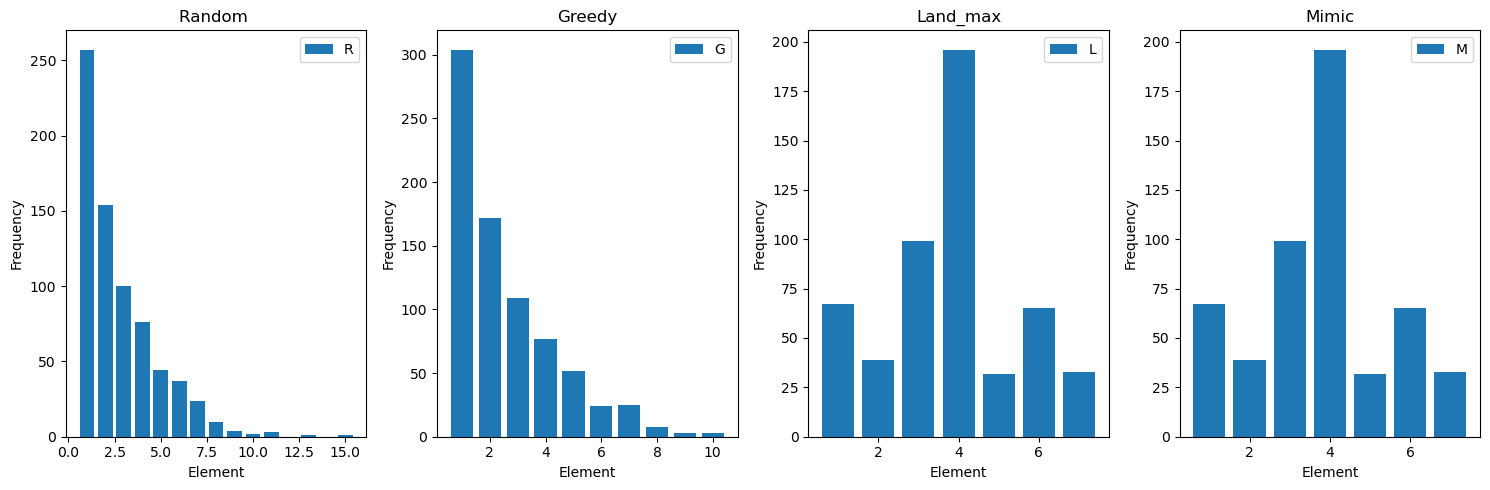

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


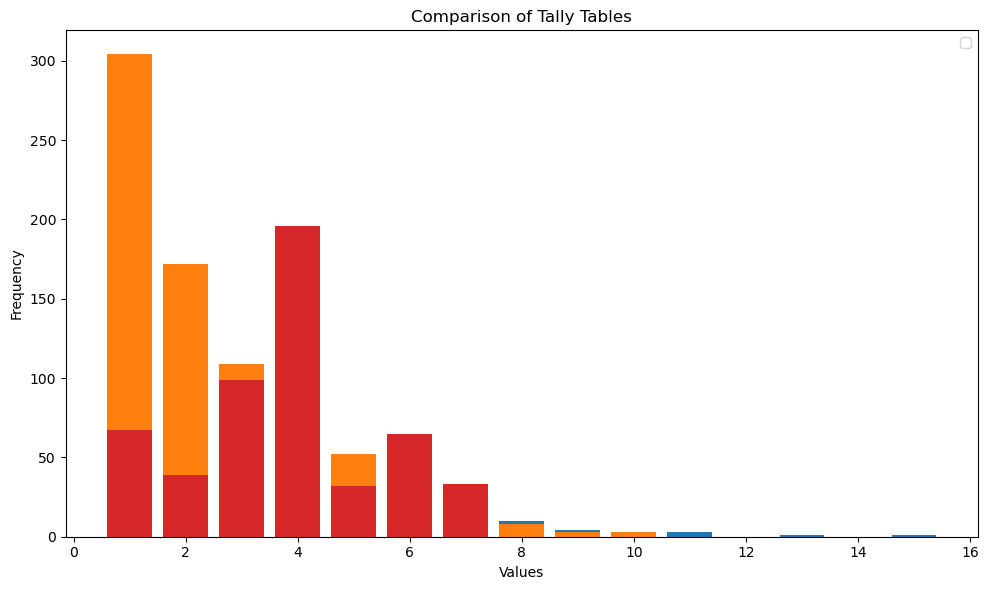

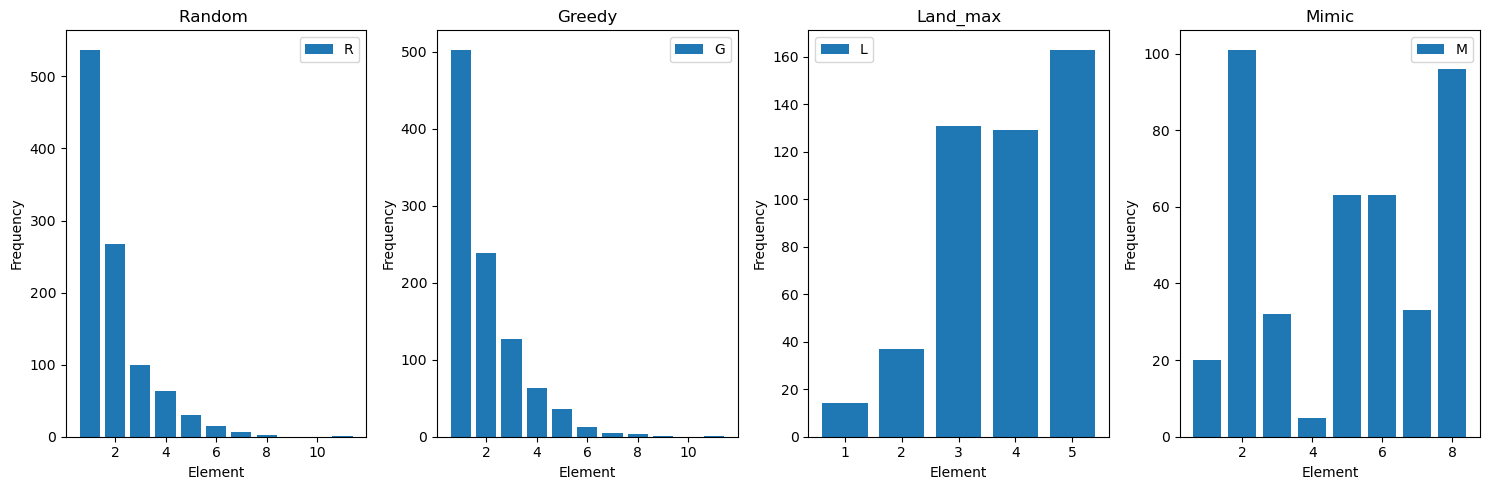

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


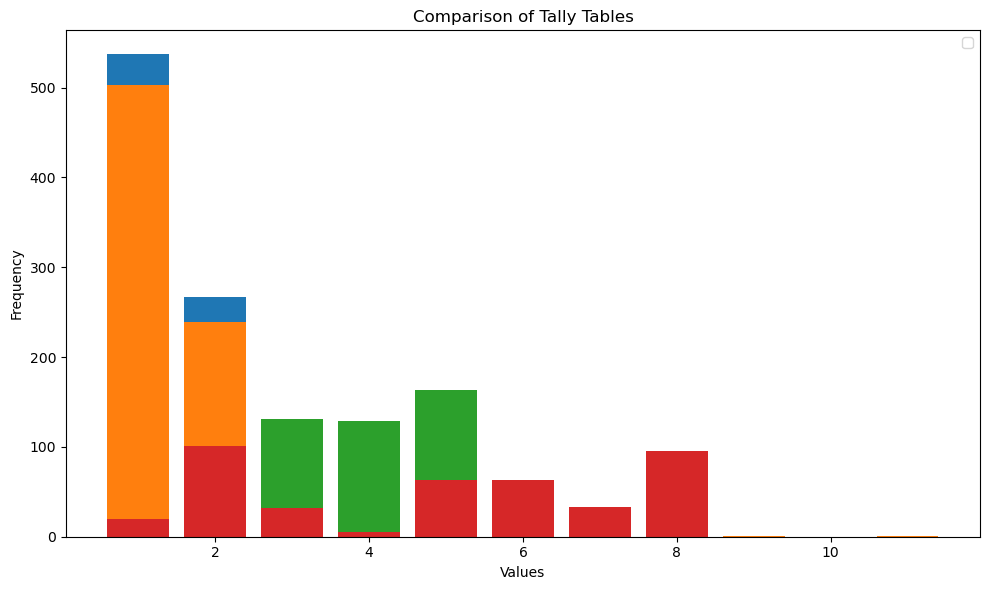

In [38]:
list_conn = ["c2_2local","c4_2local"]
sizes=[12]
for size in sizes:
    for conn in list_conn:
        change_in_ex_work_random=change_in_ex_work(conn,"random",newdata1,size)
        change_in_ex_work_greedy=change_in_ex_work(conn,"greedy",newdata2,size)
        change_in_ex_work_mimic=change_in_ex_work(conn,"mimic",newdata3,size)
        change_in_ex_work_landmax=change_in_ex_work(conn,"landscape_maximizes",newdata4,size)
        
        Num_steps_positive_random = Num_steps_positive(change_in_ex_work_random[0])
        Num_steps_positive_greedy = Num_steps_positive(change_in_ex_work_greedy[0])
        Num_steps_positive_mimic = Num_steps_positive(change_in_ex_work_mimic[0])
        Num_steps_positive_landmax = Num_steps_positive(change_in_ex_work_landmax[0])
        
        tally_random=tally_elements(list_of_consecutive_positive_steps(change_in_ex_work_random[0]))
        tally_greedy=tally_elements(list_of_consecutive_positive_steps(change_in_ex_work_greedy[0]))
        tally_landmax=tally_elements(list_of_consecutive_positive_steps(change_in_ex_work_landmax[0]))
        tally_mimic=tally_elements(list_of_consecutive_positive_steps(change_in_ex_work_mimic[0]))
        
        del tally_landmax[0]
        del tally_random[0]
        del tally_greedy[0]
        del tally_mimic[0]
    
        
        fig, axs = plt.subplots(1, 4, figsize=(15, 5))
        
        plot_histogram(axs[0], tally_random, 'Random ')
        plot_histogram(axs[1], tally_greedy, 'Greedy')
        plot_histogram(axs[2], tally_landmax, 'Land_max')
        plot_histogram(axs[3], tally_mimic, 'Mimic')
        
        plt.tight_layout()
        #plt.savefig(histogram_freq.png)
        plt.show()
        
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Call plot_histogram for each dataset with the desired color
        plot_histogram(ax, tally_random, 'Random')
        plot_histogram(ax, tally_greedy, 'Greedy')
        plot_histogram(ax, tally_landmax, 'Land_max')
        plot_histogram(ax, tally_mimic, 'Mimic')
        
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.title('Comparison of Tally Tables')
        
        # Show legend
        plt.legend()
        
        plt.tight_layout()
        plt.savefig('histogram_freq_temp_var.png')
        plt.show()

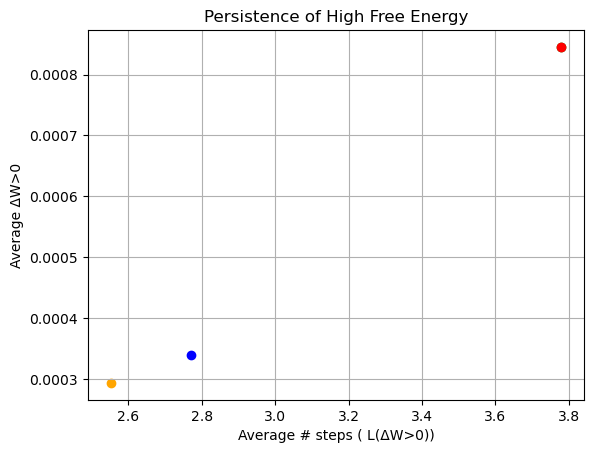

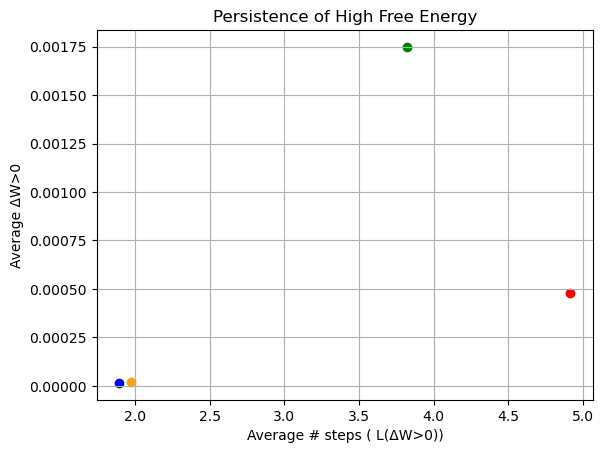

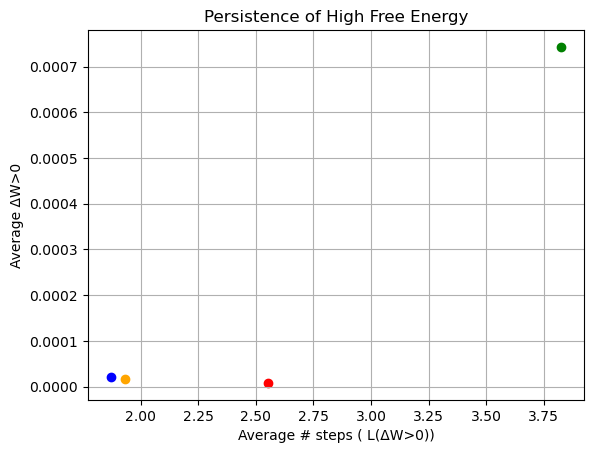

KeyError: "Unable to open object (object 'c6_2local connectivity' doesn't exist)"

In [39]:
list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
for size in sizes:
    for conn in list_conn:
        change_in_ex_work_random=change_in_ex_work(conn,"random",newdata1,size)
        change_in_ex_work_greedy=change_in_ex_work(conn,"greedy",newdata2,size)
        change_in_ex_work_mimic=change_in_ex_work(conn,"mimic",newdata3,size)
        change_in_ex_work_landmax=change_in_ex_work(conn,"landscape_maximizes",newdata4,size)
        
        Num_steps_positive_random = Num_steps_positive(change_in_ex_work_random[0])
        Num_steps_positive_greedy = Num_steps_positive(change_in_ex_work_greedy[0])
        Num_steps_positive_mimic = Num_steps_positive(change_in_ex_work_mimic[0])
        Num_steps_positive_landmax = Num_steps_positive(change_in_ex_work_landmax[0])
        
        tally_random=tally_elements(list_of_consecutive_positive_steps(change_in_ex_work_random[0]))
        tally_greedy=tally_elements(list_of_consecutive_positive_steps(change_in_ex_work_greedy[0]))
        tally_landmax=tally_elements(list_of_consecutive_positive_steps(change_in_ex_work_landmax[0]))
        tally_mimic=tally_elements(list_of_consecutive_positive_steps(change_in_ex_work_mimic[0]))
        
        del tally_landmax[0]
        del tally_random[0]
        del tally_greedy[0]
        del tally_mimic[0]
        
        [avg_time_step_positive(tally_random),avg_time_step_positive(tally_greedy),avg_time_step_positive(tally_mimic),avg_time_step_positive(tally_landmax)]
        
        pairs = [(avg_time_step_positive(tally_random), average_ex_resource_landscape(change_in_ex_work_random[0][10:]),'blue'),(avg_time_step_positive(tally_greedy), average_ex_resource_landscape(change_in_ex_work_greedy[0][10:]),'orange'),(avg_time_step_positive(tally_landmax), average_ex_resource_landscape(change_in_ex_work_landmax[0][10:]),'green'),(avg_time_step_positive(tally_mimic), average_ex_resource_landscape(change_in_ex_work_mimic[0][10:]),'red')]
                    
        for pair in pairs:
            plt.scatter(pair[0], pair[1], color=pair[2])
        
        plt.xlabel('Average # steps ( L(ΔW>0))')
        plt.ylabel('Average ΔW>0')
        plt.title('Persistence of High Free Energy')
        plt.grid(True)
        plt.show()
        



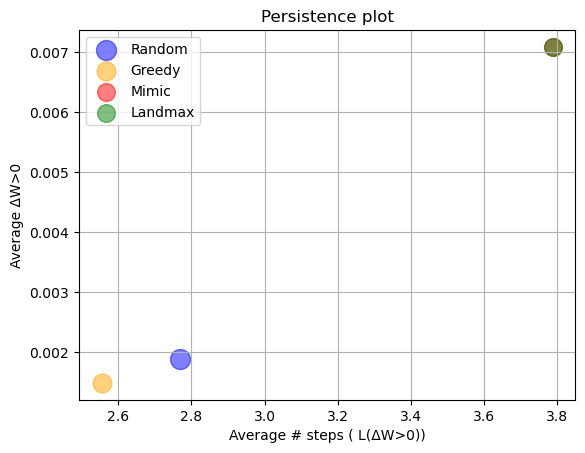

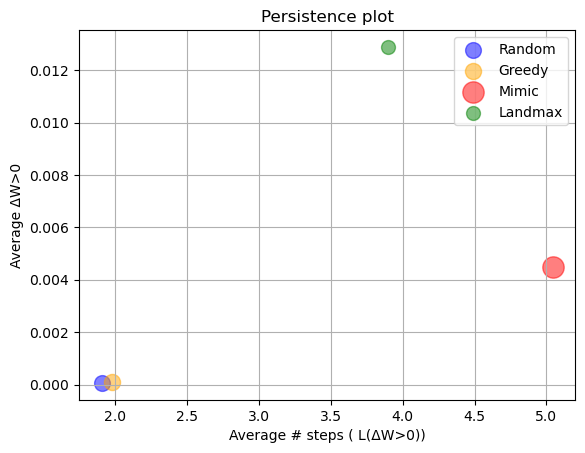

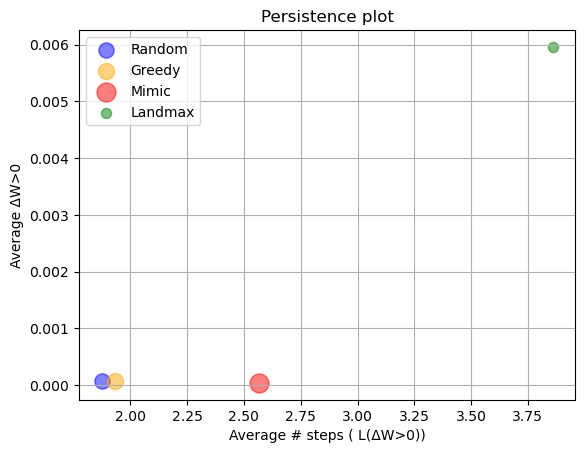

KeyError: "Unable to open object (object 'c6_2local connectivity' doesn't exist)"

In [40]:
list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
for size in sizes:
    for conn in list_conn:
        change_in_ex_work_random=change_in_ex_work(conn,"random",newdata1,size)
        change_in_ex_work_greedy=change_in_ex_work(conn,"greedy",newdata2,size)
        change_in_ex_work_mimic=change_in_ex_work(conn,"mimic",newdata3,size)
        change_in_ex_work_landmax=change_in_ex_work(conn,"landscape_maximizes",newdata4,size)
        
        Num_steps_positive_random = Num_steps_positive(change_in_ex_work_random[0])
        Num_steps_positive_greedy = Num_steps_positive(change_in_ex_work_greedy[0])
        Num_steps_positive_mimic = Num_steps_positive(change_in_ex_work_mimic[0])
        Num_steps_positive_landmax = Num_steps_positive(change_in_ex_work_landmax[0])
        
        tally_random=tally_elements(list_of_consecutive_positive_steps(change_in_ex_work_random[0]))
        tally_greedy=tally_elements(list_of_consecutive_positive_steps(change_in_ex_work_greedy[0]))
        tally_landmax=tally_elements(list_of_consecutive_positive_steps(change_in_ex_work_landmax[0]))
        tally_mimic=tally_elements(list_of_consecutive_positive_steps(change_in_ex_work_mimic[0]))
        
        del tally_landmax[0]
        del tally_random[0]
        del tally_greedy[0]
        del tally_mimic[0]
  #  [avg_time_step_positive(tally_random),avg_time_step_positive(tally_greedy),avg_time_step_positive(tally_mimic),avg_time_step_positive(tally_landmax)]
    
 #   pairs = [(avg_time_step_positive(tally_random), average_ex_resource_landscape(change_in_ex_work_random[0]),'blue'),(avg_time_step_positive(tally_greedy), average_ex_resource_landscape(change_in_ex_work_greedy[0]),'orange'),(avg_time_step_positive(tally_landmax), average_ex_resource_landscape(change_in_ex_work_landmax[0]),'green'),(avg_time_step_positive(tally_mimic), average_ex_resource_landscape(change_in_ex_work_mimic[0]),'red')]
                
 #   for pair in pairs:
        #plt.scatter(pair[0], pair[1], color=pair[2])
    
 #   plt.xlabel('Average # steps ( L(ΔW>0))')
 #   plt.ylabel('Average ΔW>0')
 #   plt.title('Persistence of High Free Energy')
 #   plt.grid(True)
 #   plt.show()
    
        lists = [(list_of_cosec_positive_steps_no_zeros(change_in_ex_work_random[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_random[0][10:]),'blue','Random'),(list_of_cosec_positive_steps_no_zeros(change_in_ex_work_greedy[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_greedy[0][10:]),'orange','Greedy'),(list_of_cosec_positive_steps_no_zeros(change_in_ex_work_mimic[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_mimic[0][10:]),'red','Mimic'),(list_of_cosec_positive_steps_no_zeros(change_in_ex_work_landmax[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_landmax[0][10:]),'green','Landmax')]
        
        for list1, list2, color, label in lists:
            mean_x = np.mean(list1)
            mean_y = np.mean(list2)
            std_x = np.std(list1)
            std_y = np.std(list2)
            plt.scatter(mean_x, mean_y, s=100*(std_x+std_y), alpha=0.5, color=color, label=label)
        
        plt.xlabel('Average # steps ( L(ΔW>0))')
        plt.ylabel('Average ΔW>0')
        plt.title('Persistence plot')
        plt.grid(True)
        plt.legend()
        
        # Set the min and max values for x-axis and y-axis
        #plt.xlim(0, 6)
        #plt.ylim(0, 0.18)
        
        # Save and show the plot
        #plt.savefig('Persistence_C5_dyn_temp.png')
        plt.show()

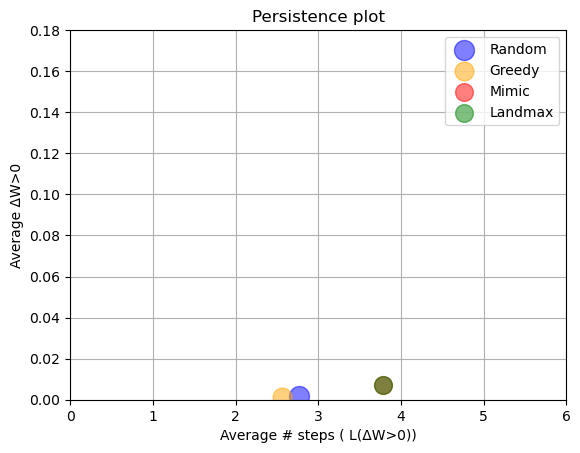

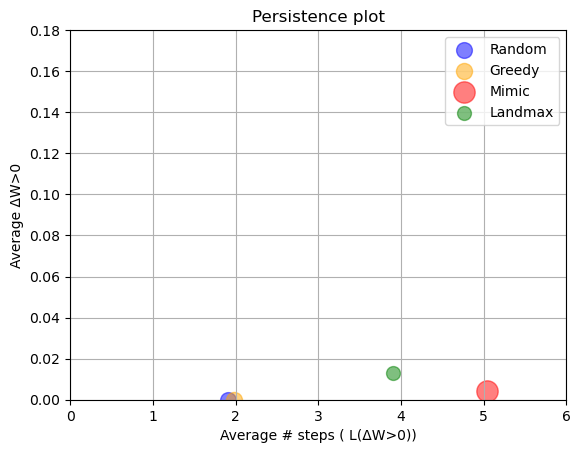

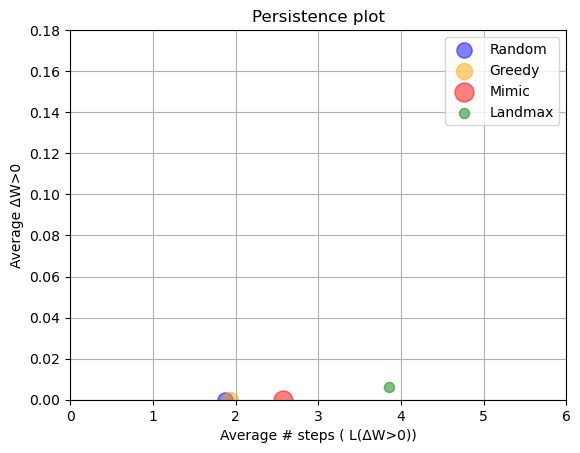

In [41]:
list_conn = ["c2_2local","c4_2local","c5_2local"]
sizes=[12]
for conn in list_conn:
    for size in sizes:
        change_in_ex_work_random=change_in_ex_work(conn,"random",newdata1,size)
        change_in_ex_work_greedy=change_in_ex_work(conn,"greedy",newdata2,size)
        change_in_ex_work_mimic=change_in_ex_work(conn,"mimic",newdata3,size)
        change_in_ex_work_landmax=change_in_ex_work(conn,"landscape_maximizes",newdata4,size)
        
        Num_steps_positive_random = Num_steps_positive(change_in_ex_work_random[0])
        Num_steps_positive_greedy = Num_steps_positive(change_in_ex_work_greedy[0])
        Num_steps_positive_mimic = Num_steps_positive(change_in_ex_work_mimic[0])
        Num_steps_positive_landmax = Num_steps_positive(change_in_ex_work_landmax[0])
        
        tally_random=tally_elements(list_of_consecutive_positive_steps(change_in_ex_work_random[0]))
        tally_greedy=tally_elements(list_of_consecutive_positive_steps(change_in_ex_work_greedy[0]))
        tally_landmax=tally_elements(list_of_consecutive_positive_steps(change_in_ex_work_landmax[0]))
        tally_mimic=tally_elements(list_of_consecutive_positive_steps(change_in_ex_work_mimic[0]))
        
        del tally_landmax[0]
        del tally_random[0]
        del tally_greedy[0]
        del tally_mimic[0]
  #  [avg_time_step_positive(tally_random),avg_time_step_positive(tally_greedy),avg_time_step_positive(tally_mimic),avg_time_step_positive(tally_landmax)]
    
 #   pairs = [(avg_time_step_positive(tally_random), average_ex_resource_landscape(change_in_ex_work_random[0]),'blue'),(avg_time_step_positive(tally_greedy), average_ex_resource_landscape(change_in_ex_work_greedy[0]),'orange'),(avg_time_step_positive(tally_landmax), average_ex_resource_landscape(change_in_ex_work_landmax[0]),'green'),(avg_time_step_positive(tally_mimic), average_ex_resource_landscape(change_in_ex_work_mimic[0]),'red')]
                
 #   for pair in pairs:
        #plt.scatter(pair[0], pair[1], color=pair[2])
    
 #   plt.xlabel('Average # steps ( L(ΔW>0))')
 #   plt.ylabel('Average ΔW>0')
 #   plt.title('Persistence of High Free Energy')
 #   plt.grid(True)
 #   plt.show()
    
        lists = [(list_of_cosec_positive_steps_no_zeros(change_in_ex_work_random[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_random[0][10:]),'blue','Random'),(list_of_cosec_positive_steps_no_zeros(change_in_ex_work_greedy[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_greedy[0][10:]),'orange','Greedy'),(list_of_cosec_positive_steps_no_zeros(change_in_ex_work_mimic[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_mimic[0][10:]),'red','Mimic'),(list_of_cosec_positive_steps_no_zeros(change_in_ex_work_landmax[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_landmax[0][10:]),'green','Landmax')]
        
        for list1, list2, color, label in lists:
            mean_x = np.mean(list1)
            mean_y = np.mean(list2)
            std_x = np.std(list1)
            std_y = np.std(list2)
            plt.scatter(mean_x, mean_y, s=100*(std_x+std_y), alpha=0.5, color=color, label=label)
        
        plt.xlabel('Average # steps ( L(ΔW>0))')
        plt.ylabel('Average ΔW>0')
        plt.title('Persistence plot')
        plt.grid(True)
        plt.legend()
        
        # Set the min and max values for x-axis and y-axis
        plt.xlim(0, 6)
        plt.ylim(0, 0.18)
        
        # Save and show the plot
        #plt.savefig('Persistence_C5_dyn_temp.png')
        plt.show()

In [115]:
#list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
#for conn in list_conn:
#for size in sizes:
change_in_ex_work_c2=change_in_ex_work("c2_2local","random",newdata1,8)
change_in_ex_work_c4=change_in_ex_work("c4_2local","random",newdata1,8)
change_in_ex_work_c5=change_in_ex_work("c5_2local","random",newdata1,8)
change_in_ex_work_c6=change_in_ex_work("c6_2local","random",newdata1,8)
change_in_ex_work_cN=change_in_ex_work("cN_2local","random",newdata1,8)
change_in_ex_work_c2_10=change_in_ex_work("c2_2local","random",newdata1,10)
change_in_ex_work_c4_10=change_in_ex_work("c4_2local","random",newdata1,10)
change_in_ex_work_c5_10=change_in_ex_work("c5_2local","random",newdata1,10)
change_in_ex_work_c6_10=change_in_ex_work("c6_2local","random",newdata1,10)
change_in_ex_work_cN_10=change_in_ex_work("cN_2local","random",newdata1,10)        
        
Num_steps_positive_c2 = Num_steps_positive(change_in_ex_work_c2[0])
Num_steps_positive_c4 = Num_steps_positive(change_in_ex_work_c4[0])
Num_steps_positive_c5 = Num_steps_positive(change_in_ex_work_c5[0])
Num_steps_positive_c6 = Num_steps_positive(change_in_ex_work_c6[0])
Num_steps_positive_cN = Num_steps_positive(change_in_ex_work_cN[0])
Num_steps_positive_c2_10 = Num_steps_positive(change_in_ex_work_c2_10[0])
Num_steps_positive_c4_10 = Num_steps_positive(change_in_ex_work_c4_10[0])
Num_steps_positive_c5_10 = Num_steps_positive(change_in_ex_work_c5_10[0])
Num_steps_positive_c6_10 = Num_steps_positive(change_in_ex_work_c6_10[0])
Num_steps_positive_cN_10 = Num_steps_positive(change_in_ex_work_cN_10[0])
    
lists = [(list_of_cosec_positive_steps_no_zeros(change_in_ex_work_c2[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_c2[0][10:]),'blue','C2'),
                (list_of_cosec_positive_steps_no_zeros(change_in_ex_work_c2_10[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_c2_10[0][10:]),'lightblue','C2'),
                 (list_of_cosec_positive_steps_no_zeros(change_in_ex_work_c4[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_c4[0][10:]),'orange','C4'),
                (list_of_cosec_positive_steps_no_zeros(change_in_ex_work_c4_10[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_c4_10[0][10:]),'orange','C4'),
                 (list_of_cosec_positive_steps_no_zeros(change_in_ex_work_c5_10[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_c5_10[0][10:]),'pink','C5'),
                 (list_of_cosec_positive_steps_no_zeros(change_in_ex_work_c6_10[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_c6_10[0][10:]),'red','C6'),
                 (list_of_cosec_positive_steps_no_zeros(change_in_ex_work_cN_10[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_cN_10[0][10:]),'green','CN'),
                 (list_of_cosec_positive_steps_no_zeros(change_in_ex_work_c5[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_c5[0][10:]),'pink','C5'),
                 (list_of_cosec_positive_steps_no_zeros(change_in_ex_work_c6[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_c6[0][10:]),'red','C6'),
                 (list_of_cosec_positive_steps_no_zeros(change_in_ex_work_cN[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_cN[0][10:]),'green','CN')]
        
for list1, list2, color, label in lists:
    mean_x = np.mean(list1)
    mean_y = np.mean(list2)
    std_x = np.std(list1)
    std_y = np.std(list2)
    plt.scatter(mean_x, mean_y, s=100*(std_x+std_y), alpha=0.5, color=color, label=label)
            
    plt.xlabel('Average # steps ( L(ΔW>0))')
    plt.ylabel('Average ΔW>0')
    plt.title('Persistence plot')
    plt.grid(True)
    plt.legend()
                
                # Set the min and max values for x-axis and y-axis
            ##plt.xlim(0, 6)
            #plt.ylim(0, 0.18)
                
                # Save and show the plot
                #plt.savefig('Persistence_C5_dyn_temp.png')
plt.show()        

KeyError: "Unable to open object (object 'ordering seed random' doesn't exist)"

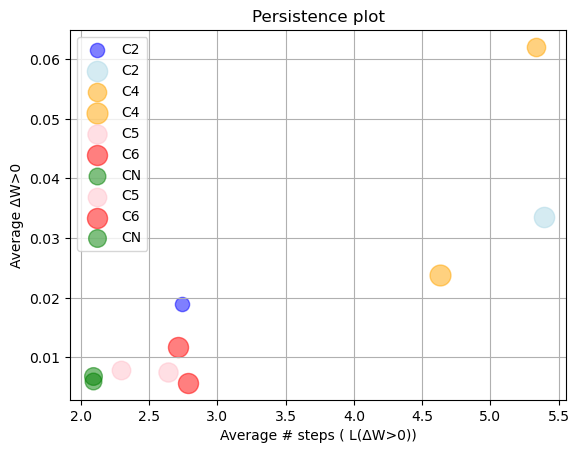

In [116]:

        
#list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
#for conn in list_conn:
#for size in sizes:
change_in_ex_work_c2=change_in_ex_work("c2_2local","mimic",newdata3,8)
change_in_ex_work_c4=change_in_ex_work("c4_2local","mimic",newdata3,8)
change_in_ex_work_c5=change_in_ex_work("c5_2local","mimic",newdata3,8)
change_in_ex_work_c6=change_in_ex_work("c6_2local","mimic",newdata3,8)
change_in_ex_work_cN=change_in_ex_work("cN_2local","mimic",newdata3,8)
change_in_ex_work_c2_10=change_in_ex_work("c2_2local","mimic",newdata3,10)
change_in_ex_work_c4_10=change_in_ex_work("c4_2local","mimic",newdata3,10)
change_in_ex_work_c5_10=change_in_ex_work("c5_2local","mimic",newdata3,10)
change_in_ex_work_c6_10=change_in_ex_work("c6_2local","mimic",newdata3,10)
change_in_ex_work_cN_10=change_in_ex_work("cN_2local","mimic",newdata3,10)        
        
Num_steps_positive_c2 = Num_steps_positive(change_in_ex_work_c2[0])
Num_steps_positive_c4 = Num_steps_positive(change_in_ex_work_c4[0])
Num_steps_positive_c5 = Num_steps_positive(change_in_ex_work_c5[0])
Num_steps_positive_c6 = Num_steps_positive(change_in_ex_work_c6[0])
Num_steps_positive_cN = Num_steps_positive(change_in_ex_work_cN[0])
Num_steps_positive_c2_10 = Num_steps_positive(change_in_ex_work_c2_10[0])
Num_steps_positive_c4_10 = Num_steps_positive(change_in_ex_work_c4_10[0])
Num_steps_positive_c5_10 = Num_steps_positive(change_in_ex_work_c5_10[0])
Num_steps_positive_c6_10 = Num_steps_positive(change_in_ex_work_c6_10[0])
Num_steps_positive_cN_10 = Num_steps_positive(change_in_ex_work_cN_10[0])
    
lists = [(list_of_cosec_positive_steps_no_zeros(change_in_ex_work_c2[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_c2[0][10:]),'blue','C2'),
                (list_of_cosec_positive_steps_no_zeros(change_in_ex_work_c2_10[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_c2_10[0][10:]),'lightblue','C2'),
                 (list_of_cosec_positive_steps_no_zeros(change_in_ex_work_c4[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_c4[0][10:]),'orange','C4'),
                (list_of_cosec_positive_steps_no_zeros(change_in_ex_work_c4_10[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_c4_10[0][10:]),'orange','C4'),
                 (list_of_cosec_positive_steps_no_zeros(change_in_ex_work_c5_10[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_c5_10[0][10:]),'pink','C5'),
                 (list_of_cosec_positive_steps_no_zeros(change_in_ex_work_c6_10[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_c6_10[0][10:]),'red','C6'),
                 (list_of_cosec_positive_steps_no_zeros(change_in_ex_work_cN_10[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_cN_10[0][10:]),'green','CN'),
                 (list_of_cosec_positive_steps_no_zeros(change_in_ex_work_c5[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_c5[0][10:]),'pink','C5'),
                 (list_of_cosec_positive_steps_no_zeros(change_in_ex_work_c6[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_c6[0][10:]),'red','C6'),
                 (list_of_cosec_positive_steps_no_zeros(change_in_ex_work_cN[0][10:]),consecutive_positives_with_cumulative_sum_no_zeores(change_in_ex_work_cN[0][10:]),'green','CN')]
        
for list1, list2, color, label in lists:
    mean_x = np.mean(list1)
    mean_y = np.mean(list2)
    std_x = np.std(list1)
    std_y = np.std(list2)
    plt.scatter(mean_x, mean_y, s=100*(std_x+std_y), alpha=0.5, color=color, label=label)
            
    plt.xlabel('Average # steps ( L(ΔW>0))')
    plt.ylabel('Average ΔW>0')
    plt.title('Persistence plot')
    plt.grid(True)
    plt.legend()
                
                # Set the min and max values for x-axis and y-axis
            ##plt.xlim(0, 6)
            #plt.ylim(0, 0.18)
                
                # Save and show the plot
                #plt.savefig('Persistence_C5_dyn_temp.png')
plt.show()

In [42]:
list_conn = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
twoQdmsrandom_8_c2 = get_2_qbit_dms(newdata1,8,"c2_2local","random")
twoQdmsgreedy_8_c2 = get_2_qbit_dms(newdata2,8,"c2_2local","greedy")
twoQdmslandmax_8_c2 = get_2_qbit_dms(newdata4,8,"c2_2local","landscape_maximizes")
twoQdmsmimic_8_c2 = get_2_qbit_dms(newdata3,8,"c4_2local","mimic")
twoQdmsrandom_8_c4 = get_2_qbit_dms(newdata1,8,"c4_2local","random")
twoQdmsgreedy_8_c4 = get_2_qbit_dms(newdata2,8,"c4_2local","greedy")
twoQdmslandmax_8_c4 = get_2_qbit_dms(newdata4,8,"c4_2local","landscape_maximizes")
twoQdmsmimic_8_c4 = get_2_qbit_dms(newdata3,8,"c4_2local","mimic")

twoQdmsrandom_10_c2 = get_2_qbit_dms(newdata1,10,"c2_2local","random")
twoQdmsgreedy_10_c2 = get_2_qbit_dms(newdata2,10,"c2_2local","greedy")
twoQdmslandmax_10_c2 = get_2_qbit_dms(newdata4,10,"c2_2local","landscape_maximizes")
twoQdmsmimic_10_c2 = get_2_qbit_dms(newdata3,10,"c4_2local","mimic")
twoQdmsrandom_10_c4 = get_2_qbit_dms(newdata1,10,"c4_2local","random")
twoQdmsgreedy_10_c4 = get_2_qbit_dms(newdata2,10,"c4_2local","greedy")
twoQdmslandmax_10_c4 = get_2_qbit_dms(newdata4,10,"c4_2local","landscape_maximizes")
twoQdmsmimic_10_c4 = get_2_qbit_dms(newdata3,10,"c4_2local","mimic")

twoQdmsrandom_12_c2 = get_2_qbit_dms(newdata1,12,"c2_2local","random")
twoQdmsgreedy_12_c2 = get_2_qbit_dms(newdata2,12,"c2_2local","greedy")
twoQdmslandmax_12_c2 = get_2_qbit_dms(newdata4,12,"c2_2local","landscape_maximizes")
twoQdmsmimic_12_c2 = get_2_qbit_dms(newdata3,12,"c4_2local","mimic")
twoQdmsrandom_12_c4 = get_2_qbit_dms(newdata1,12,"c4_2local","random")
twoQdmsgreedy_12_c4 = get_2_qbit_dms(newdata2,12,"c4_2local","greedy")
twoQdmslandmax_12_c4 = get_2_qbit_dms(newdata4,12,"c4_2local","landscape_maximizes")
twoQdmsmimic_12_c4 = get_2_qbit_dms(newdata3,12,"c4_2local","mimic")
    #twoQdmsweakmax = get_2_qbit_dms(newdata5,8,"c5","weakest_maximizes")

adj_matrices_list_greedy = adjacency_matrices_list_two_dim(twoQdmsgreedy,0, num_nodes,mutual_info_dicts)
adj_matrices_list_random = adjacency_matrices_list_two_dim(twoQdmsrandom,0, num_nodes,mutual_info_dicts)
adj_matrices_list_landmax = adjacency_matrices_list_two_dim(twoQdmslandmax,0, num_nodes,mutual_info_dicts)
adj_matrices_list_mimic = adjacency_matrices_list_two_dim(twoQdmsmimic,0, num_nodes,mutual_info_dicts)
    #C5
clustering_greedy_8_c2 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy_8_c2,0, 8,mutual_info_dicts)))
clustering_random_8_c2 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsrandom_8_c2,0, 8,mutual_info_dicts)))
clustering_landmax_8_c2 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmslandmax_8_c2,0, 8,mutual_info_dicts)))
clustering_mimic_8_c2= clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsmimic_8_c2,0, 8,mutual_info_dicts)))

clustering_greedy_10_c2 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy_10_c2,0, 10,mutual_info_dicts)))
clustering_random_10_c2 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsrandom_10_c2,0, 10,mutual_info_dicts)))
clustering_landmax_10_c2 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmslandmax_10_c2,0, 10,mutual_info_dicts)))
clustering_mimic_10_c2= clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsmimic_10_c2,0, 10,mutual_info_dicts)))
    #plot_four_stats_as_function_of_time(clustering_random,clustering_greedy, clustering_landmax,clustering_mimic, filename='clustering_c5_temp_var',title = 'Clustering in Mutual Information network on qubit landscape')
    #plt.show()
#plot_four_stats_as_function_of_time_avg(clustering_random,clustering_greedy, clustering_mimic,clustering_landmax, filename='clustering_c5_temp_var',title = 'Clustering in Mutual Information network on qubit landscape')
#plt.show()
    
    #C5
disparity_greedy_8_c2 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy_8_c2,0, 8,mutual_info_dicts)),8)
disparity_random_8_c2 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsrandom_8_c2,0, 8,mutual_info_dicts)),8)
disparity_landmax_8_c2 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmslandmax_8_c2,0, 8,mutual_info_dicts)),8)
disparity_mimic_8_c2 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsmimic_8_c2,0, 8,mutual_info_dicts)),8)

disparity_greedy_10_c2 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy_10_c2,0, 10,mutual_info_dicts)),10)
disparity_random_10_c2 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsrandom_10_c2,0, 10,mutual_info_dicts)),10)
disparity_landmax_10_c2 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmslandmax_10_c2,0, 10,mutual_info_dicts)),10)
disparity_mimic_10_c2 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsmimic_10_c2,0, 10,mutual_info_dicts)),10)

lists=[(clustering_random_8_c2[400:499],disparity_random_8_c2[400:499],'blue','Random'),(clustering_greedy_8_c2[400:499],disparity_greedy_8_c2[400:499],'orange','Greedy'),(clustering_landmax_8_c2[400:499],disparity_landmax_8_c2[400:499],'green','LandMax'),(clustering_mimic_8_c2[400:499],disparity_mimic_8_c2[400:499],'red','Mimic'),
      (clustering_random_10_c2[400:499],disparity_random_10_c2[400:499],'blue','Random'),(clustering_greedy_10_c2[400:499],disparity_greedy_10_c2[400:499],'orange','Greedy'),(clustering_landmax_10_c2[400:499],disparity_landmax_10_c2[400:499],'green','LandMax'),(clustering_mimic_10_c2[400:499],disparity_mimic_10_c2[400:499],'red','Mimic')]
for list1, list2, color, label in lists:
    mean_x = np.mean(list1)
    mean_y = np.mean(list2)
    std_x = np.std(list1)
    std_y = np.std(list2)
    plt.scatter(mean_x, mean_y, s=100*(std_x+std_y), alpha=0.5, color=color, label=label)

plt.xlabel('Clustering')
plt.ylabel('Disparity')
plt.title('MI network measures(C5)')
plt.grid(True)
plt.legend()
plt.xlim(0, 0.0014)
plt.ylim(0, 1)
plt.savefig('MI network measures(C5).png')
plt.show()

/var/folders/x8/hv6lnsx5209d4m84b842j095n23ctf/T/ipykernel_32043/1734428674.py:11: RuntimeWarning: invalid value encountered in scalar divide
  C_list.append(M_cube_trace/sum_of_M_sq)
/var/folders/x8/hv6lnsx5209d4m84b842j095n23ctf/T/ipykernel_32043/1734428674.py:21: RuntimeWarning: invalid value encountered in divide
  Di = np.where(M_row_sum_squared != 0, M_row_sum_of_squared_elements / M_row_sum_squared, 0)


NameError: name 'disparity_random10_c2' is not defined

In [43]:
clustering_greedy_8_c2 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy_8_c2,0, 8,mutual_info_dicts)))
clustering_random_8_c2 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsrandom_8_c2,0, 8,mutual_info_dicts)))
clustering_landmax_8_c2 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmslandmax_8_c2,0, 8,mutual_info_dicts)))
clustering_mimic_8_c2= clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsmimic_8_c2,0, 8,mutual_info_dicts)))

clustering_greedy_10_c2 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy_10_c2,0, 10,mutual_info_dicts)))
clustering_random_10_c2 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsrandom_10_c2,0, 10,mutual_info_dicts)))
clustering_landmax_10_c2 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmslandmax_10_c2,0, 10,mutual_info_dicts)))
clustering_mimic_10_c2= clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsmimic_10_c2,0, 10,mutual_info_dicts)))
    #plot_four_stats_as_function_of_time(clustering_random,clustering_greedy, clustering_landmax,clustering_mimic, filename='clustering_c5_temp_var',title = 'Clustering in Mutual Information network on qubit landscape')
    #plt.show()
#plot_four_stats_as_function_of_time_avg(clustering_random,clustering_greedy, clustering_mimic,clustering_landmax, filename='clustering_c5_temp_var',title = 'Clustering in Mutual Information network on qubit landscape')
#plt.show()
    
    #C5
disparity_greedy_8_c2 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy_8_c2,0, 8,mutual_info_dicts)),8)
disparity_random_8_c2 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsrandom_8_c2,0, 8,mutual_info_dicts)),8)
disparity_landmax_8_c2 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmslandmax_8_c2,0, 8,mutual_info_dicts)),8)
disparity_mimic_8_c2 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsmimic_8_c2,0, 8,mutual_info_dicts)),8)

disparity_greedy_10_c2 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy_10_c2,0, 10,mutual_info_dicts)),10)
disparity_random_10_c2 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsrandom_10_c2,0, 10,mutual_info_dicts)),10)
disparity_landmax_10_c2 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmslandmax_10_c2,0, 10,mutual_info_dicts)),10)
disparity_mimic_10_c2 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsmimic_10_c2,0, 10,mutual_info_dicts)),10)

clustering_greedy_12_c2 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy_12_c2,0, 12,mutual_info_dicts)))
clustering_random_12_c2 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsrandom_12_c2,0, 12,mutual_info_dicts)))
clustering_landmax_12_c2 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmslandmax_12_c2,0, 12,mutual_info_dicts)))
clustering_mimic_12_c2= clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsmimic_12_c2,0, 12,mutual_info_dicts)))
    #plot_four_stats_as_function_of_time(clustering_random,clustering_greedy, clustering_landmax,clustering_mimic, filename='clustering_c5_temp_var',title = 'Clustering in Mutual Information network on qubit landscape')
    #plt.show()
#plot_four_stats_as_function_of_time_avg(clustering_random,clustering_greedy, clustering_mimic,clustering_landmax, filename='clustering_c5_temp_var',title = 'Clustering in Mutual Information network on qubit landscape')
#plt.show()
    
    #C5
disparity_greedy_12_c2 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy_12_c2,0, 12,mutual_info_dicts)),12)
disparity_random_12_c2 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsrandom_12_c2,0, 12,mutual_info_dicts)),12)
disparity_landmax_12_c2 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmslandmax_12_c2,0, 12,mutual_info_dicts)),12)
disparity_mimic_12_c2 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsmimic_12_c2,0, 12,mutual_info_dicts)),12)


/var/folders/x8/hv6lnsx5209d4m84b842j095n23ctf/T/ipykernel_32043/1734428674.py:11: RuntimeWarning: invalid value encountered in scalar divide
  C_list.append(M_cube_trace/sum_of_M_sq)
/var/folders/x8/hv6lnsx5209d4m84b842j095n23ctf/T/ipykernel_32043/1734428674.py:21: RuntimeWarning: invalid value encountered in divide
  Di = np.where(M_row_sum_squared != 0, M_row_sum_of_squared_elements / M_row_sum_squared, 0)


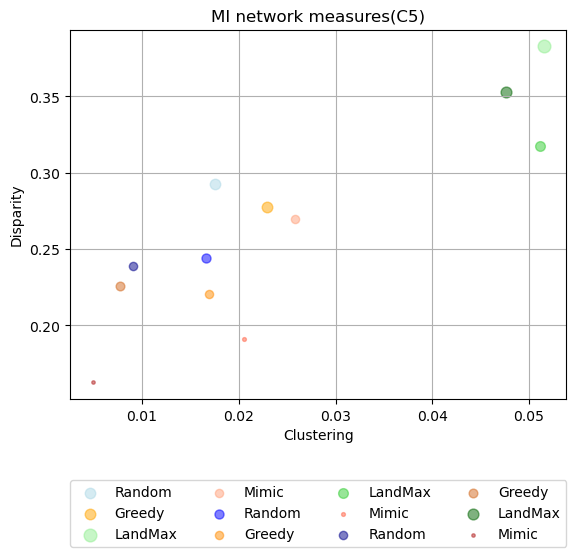

In [87]:

lists=[(clustering_random_8_c2[400:499],disparity_random_8_c2[400:499],'lightblue','Random'),(clustering_greedy_8_c2[400:499],disparity_greedy_8_c2[400:499],'orange','Greedy'),(clustering_landmax_8_c2[400:499],disparity_landmax_8_c2[400:499],'lightgreen','LandMax'),(clustering_mimic_8_c2[400:499],disparity_mimic_8_c2[400:499],'lightsalmon','Mimic'),
      (clustering_random_10_c2[400:499],disparity_random_10_c2[400:499],'blue','Random'),(clustering_greedy_10_c2[400:499],disparity_greedy_10_c2[400:499],'darkorange','Greedy'),(clustering_landmax_10_c2[400:499],disparity_landmax_10_c2[400:499],'limegreen','LandMax'),(clustering_mimic_10_c2[400:499],disparity_mimic_10_c2[400:499],'tomato','Mimic'),
       (clustering_random_12_c2[400:499],disparity_random_12_c2[400:499],'darkblue','Random'),(clustering_greedy_12_c2[400:499],disparity_greedy_12_c2[400:499],'chocolate','Greedy'),(clustering_landmax_12_c2[400:499],disparity_landmax_12_c2[400:499],'darkgreen','LandMax'),(clustering_mimic_12_c2[400:499],disparity_mimic_12_c2[400:499],'firebrick','Mimic')]
for list1, list2, color, label in lists:
    mean_x = np.mean(list1)
    mean_y = np.mean(list2)
    std_x = np.std(list1)
    std_y = np.std(list2)
    plt.scatter(mean_x, mean_y, s=1000*(std_x+std_y), alpha=0.5, color=color, label=label)

plt.xlabel('Clustering')
plt.ylabel('Disparity')
plt.title('MI network measures(C5)')
plt.grid(True)
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4)
#plt.xlim(0, 0.0014)
#plt.ylim(0, 1)
plt.savefig('MI network measures(C5).png')
plt.show()

In [44]:
clustering_greedy_8_c4 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy_8_c4,0, 8,mutual_info_dicts)))
clustering_random_8_c4 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsrandom_8_c4,0, 8,mutual_info_dicts)))
clustering_landmax_8_c4 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmslandmax_8_c4,0, 8,mutual_info_dicts)))
clustering_mimic_8_c4= clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsmimic_8_c4,0, 8,mutual_info_dicts)))

clustering_greedy_10_c4 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy_10_c4,0, 10,mutual_info_dicts)))
clustering_random_10_c4 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsrandom_10_c4,0, 10,mutual_info_dicts)))
clustering_landmax_10_c4 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmslandmax_10_c4,0, 10,mutual_info_dicts)))
clustering_mimic_10_c4= clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsmimic_10_c4,0, 10,mutual_info_dicts)))
    #plot_four_stats_as_function_of_time(clustering_random,clustering_greedy, clustering_landmax,clustering_mimic, filename='clustering_c5_temp_var',title = 'Clustering in Mutual Information network on qubit landscape')
    #plt.show()
#plot_four_stats_as_function_of_time_avg(clustering_random,clustering_greedy, clustering_mimic,clustering_landmax, filename='clustering_c5_temp_var',title = 'Clustering in Mutual Information network on qubit landscape')
#plt.show()
    
    #C5
disparity_greedy_8_c4 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy_8_c4,0, 8,mutual_info_dicts)),8)
disparity_random_8_c4 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsrandom_8_c4,0, 8,mutual_info_dicts)),8)
disparity_landmax_8_c4 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmslandmax_8_c4,0, 8,mutual_info_dicts)),8)
disparity_mimic_8_c4 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsmimic_8_c4,0, 8,mutual_info_dicts)),8)

disparity_greedy_10_c4 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy_10_c4,0, 10,mutual_info_dicts)),10)
disparity_random_10_c4 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsrandom_10_c4,0, 10,mutual_info_dicts)),10)
disparity_landmax_10_c4 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmslandmax_10_c4,0, 10,mutual_info_dicts)),10)
disparity_mimic_10_c4 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsmimic_10_c4,0, 10,mutual_info_dicts)),10)

clustering_greedy_12_c4 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy_12_c4,0, 12,mutual_info_dicts)))
clustering_random_12_c4 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsrandom_12_c4,0, 12,mutual_info_dicts)))
clustering_landmax_12_c4 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmslandmax_12_c4,0, 12,mutual_info_dicts)))
clustering_mimic_12_c4= clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsmimic_12_c4,0, 12,mutual_info_dicts)))
    #plot_four_stats_as_function_of_time(clustering_random,clustering_greedy, clustering_landmax,clustering_mimic, filename='clustering_c5_temp_var',title = 'Clustering in Mutual Information network on qubit landscape')
    #plt.show()
#plot_four_stats_as_function_of_time_avg(clustering_random,clustering_greedy, clustering_mimic,clustering_landmax, filename='clustering_c5_temp_var',title = 'Clustering in Mutual Information network on qubit landscape')
#plt.show()
    
    #C5
disparity_greedy_12_c4 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy_12_c4,0, 12,mutual_info_dicts)),12)
disparity_random_12_c4 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsrandom_12_c4,0, 12,mutual_info_dicts)),12)
disparity_landmax_12_c4 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmslandmax_12_c4,0, 12,mutual_info_dicts)),12)
disparity_mimic_12_c4 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsmimic_12_c4,0, 12,mutual_info_dicts)),12)


/var/folders/x8/hv6lnsx5209d4m84b842j095n23ctf/T/ipykernel_32043/1734428674.py:11: RuntimeWarning: invalid value encountered in scalar divide
  C_list.append(M_cube_trace/sum_of_M_sq)
/var/folders/x8/hv6lnsx5209d4m84b842j095n23ctf/T/ipykernel_32043/1734428674.py:21: RuntimeWarning: invalid value encountered in divide
  Di = np.where(M_row_sum_squared != 0, M_row_sum_of_squared_elements / M_row_sum_squared, 0)


In [45]:
twoQdmsrandom_12_c5 = get_2_qbit_dms(newdata1,12,"c5_2local","random")
twoQdmsgreedy_12_c5 = get_2_qbit_dms(newdata2,12,"c5_2local","greedy")
twoQdmsmimic_12_c5 = get_2_qbit_dms(newdata3,12,"c5_2local","mimic")

In [46]:
twoQdmsrandom_8_c5 = get_2_qbit_dms(newdata1,8,"c5_2local","random")
twoQdmsgreedy_8_c5 = get_2_qbit_dms(newdata2,8,"c5_2local","greedy")
twoQdmsmimic_8_c5 = get_2_qbit_dms(newdata3,8,"c5_2local","mimic")

twoQdmsrandom_10_c5 = get_2_qbit_dms(newdata1,10,"c5_2local","random")
twoQdmsgreedy_10_c5 = get_2_qbit_dms(newdata2,10,"c5_2local","greedy")
twoQdmsmimic_10_c5 = get_2_qbit_dms(newdata3,10,"c5_2local","mimic")

clustering_greedy_12_c5 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy_12_c5,0, 12,mutual_info_dicts)))
clustering_random_12_c5 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsrandom_12_c5,0, 12,mutual_info_dicts)))
#clustering_landmax_12_c = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmslandmax_12_c4,0, 12,mutual_info_dicts)))
clustering_mimic_12_c5= clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsmimic_12_c5,0, 12,mutual_info_dicts)))
    #plot_four_stats_as_function_of_time(clustering_random,clustering_greedy, clustering_landmax,clustering_mimic, filename='clustering_c5_temp_var',title = 'Clustering in Mutual Information network on qubit landscape')
    #plt.show()
#plot_four_stats_as_function_of_time_avg(clustering_random,clustering_greedy, clustering_mimic,clustering_landmax, filename='clustering_c5_temp_var',title = 'Clustering in Mutual Information network on qubit landscape')
#plt.show()
    
    #C5
disparity_greedy_12_c5 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy_12_c5,0, 12,mutual_info_dicts)),12)
disparity_random_12_c5 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsrandom_12_c5,0, 12,mutual_info_dicts)),12)
#disparity_landmax_12_c4 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmslandmax_12_c4,0, 12,mutual_info_dicts)),12)
disparity_mimic_12_c5 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsmimic_12_c5,0, 12,mutual_info_dicts)),12)

/var/folders/x8/hv6lnsx5209d4m84b842j095n23ctf/T/ipykernel_32043/1734428674.py:11: RuntimeWarning: invalid value encountered in scalar divide
  C_list.append(M_cube_trace/sum_of_M_sq)
/var/folders/x8/hv6lnsx5209d4m84b842j095n23ctf/T/ipykernel_32043/1734428674.py:21: RuntimeWarning: invalid value encountered in divide
  Di = np.where(M_row_sum_squared != 0, M_row_sum_of_squared_elements / M_row_sum_squared, 0)


In [47]:
clustering_greedy_8_c5 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy_8_c5,0, 8,mutual_info_dicts)))
clustering_random_8_c5 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsrandom_8_c5,0, 8,mutual_info_dicts)))
#clustering_landmax_12_c = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmslandmax_12_c4,0, 12,mutual_info_dicts)))
clustering_mimic_8_c5= clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsmimic_8_c5,0, 8,mutual_info_dicts)))
    #plot_four_stats_as_function_of_time(clustering_random,clustering_greedy, clustering_landmax,clustering_mimic, filename='clustering_c5_temp_var',title = 'Clustering in Mutual Information network on qubit landscape')
    #plt.show()
#plot_four_stats_as_function_of_time_avg(clustering_random,clustering_greedy, clustering_mimic,clustering_landmax, filename='clustering_c5_temp_var',title = 'Clustering in Mutual Information network on qubit landscape')
#plt.show()
    
    #C5
disparity_greedy_8_c5 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy_8_c5,0, 8,mutual_info_dicts)),8)
disparity_random_8_c5 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsrandom_8_c5,0, 8,mutual_info_dicts)),8)
#disparity_landmax_12_c4 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmslandmax_12_c4,0, 12,mutual_info_dicts)),8)
disparity_mimic_8_c5 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsmimic_8_c5,0, 8,mutual_info_dicts)),12)
clustering_greedy_10_c5 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy_10_c5,0, 10,mutual_info_dicts)))
clustering_random_10_c5 = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsrandom_10_c5,0, 10,mutual_info_dicts)))
#clustering_landmax_12_c = clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmslandmax_12_c4,0, 12,mutual_info_dicts)))
clustering_mimic_10_c5= clustering_coeff_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsmimic_10_c5,0, 10,mutual_info_dicts)))
    #plot_four_stats_as_function_of_time(clustering_random,clustering_greedy, clustering_landmax,clustering_mimic, filename='clustering_c5_temp_var',title = 'Clustering in Mutual Information network on qubit landscape')
    #plt.show()
#plot_four_stats_as_function_of_time_avg(clustering_random,clustering_greedy, clustering_mimic,clustering_landmax, filename='clustering_c5_temp_var',title = 'Clustering in Mutual Information network on qubit landscape')
#plt.show()
    
    #C5
disparity_greedy_10_c5 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy_10_c5,0, 10,mutual_info_dicts)),10)
disparity_random_10_c5 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsrandom_10_c5,0, 10,mutual_info_dicts)),10)
#disparity_landmax_12_c4 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmslandmax_12_c4,0, 12,mutual_info_dicts)),12)
disparity_mimic_10_c5 = disparity_function_of_time(np.array(adjacency_matrices_list_two_dim(twoQdmsmimic_10_c5,0, 10,mutual_info_dicts)),10)

/var/folders/x8/hv6lnsx5209d4m84b842j095n23ctf/T/ipykernel_32043/1734428674.py:11: RuntimeWarning: invalid value encountered in scalar divide
  C_list.append(M_cube_trace/sum_of_M_sq)
/var/folders/x8/hv6lnsx5209d4m84b842j095n23ctf/T/ipykernel_32043/1734428674.py:21: RuntimeWarning: invalid value encountered in divide
  Di = np.where(M_row_sum_squared != 0, M_row_sum_of_squared_elements / M_row_sum_squared, 0)


In [ ]:
(np.mean(clustering_random_8_c2[400:499]), 8, 'lightblue', 'Random'),
    (np.mean(clustering_greedy_8_c2[400:499]), 8, 'orange', 'Greedy'),
    (np.mean(clustering_landmax_8_c2[400:499]), 8, 'lightgreen', 'LandMax'),
    (np.mean(clustering_mimic_8_c2[400:499]), 8, 'lightsalmon', 'Mimic'),
    (np.mean(clustering_random_10_c2[400:499]), 10, 'blue', 'Random'),
    (np.mean(clustering_greedy_10_c2[400:499]), 10, 'darkorange', 'Greedy'),
    (np.mean(clustering_landmax_10_c2[400:499]), 10, 'limegreen', 'LandMax'),
    (np.mean(clustering_mimic_10_c2[400:499]), 10, 'tomato', 'Mimic'),
    (np.mean(clustering_random_12_c2[400:499]), 12, 'darkblue', 'Random'),
    (np.mean(clustering_greedy_12_c2[400:499]), 12, 'chocolate', 'Greedy'),
    (np.mean(clustering_landmax_12_c2[400:499]), 12, 'darkgreen', 'LandMax'),
    (np.mean(clustering_mimic_12_c2[400:499]), 12, 'firebrick', 'Mimic')

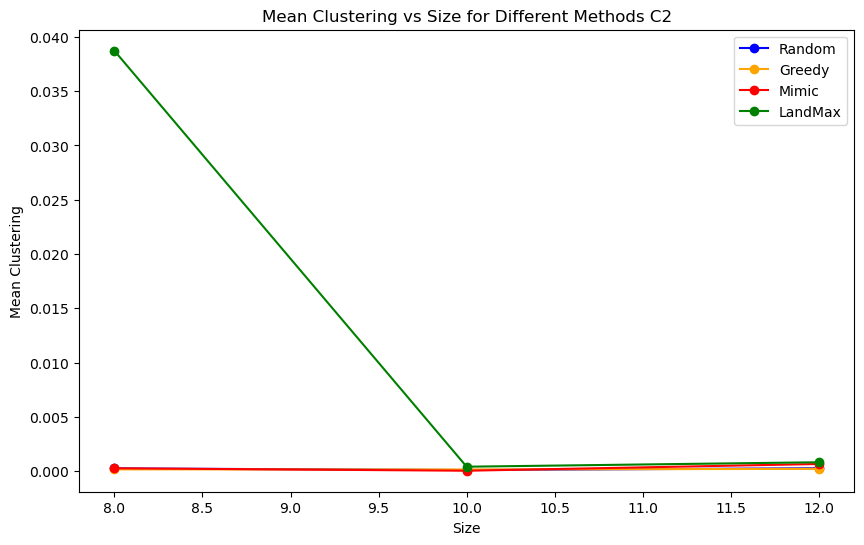

In [48]:
# Given data
methods = ['Random', 'Greedy', 'Mimic', 'LandMax']
colors = ['blue', 'orange', 'red', 'green']

# Initialize lists to store the points for each method
random_points = [(8, np.mean(clustering_random_8_c2[400:499])),
                 (10, np.mean(clustering_random_10_c2[400:499])),
                 (12, np.mean(clustering_random_12_c2[400:499]))]

greedy_points = [(8, np.mean(clustering_greedy_8_c2[400:499])),
                 (10, np.mean(clustering_greedy_10_c2[400:499])),
                 (12, np.mean(clustering_greedy_12_c2[400:499]))]

mimic_points = [(8, np.mean(clustering_mimic_8_c2[400:499])),
                (10, np.mean(clustering_mimic_10_c2[400:499])),
                (12, np.mean(clustering_mimic_12_c2[400:499]))]

landmax_points = [(8, np.mean(clustering_landmax_8_c2[400:499])),
                  (10, np.mean(clustering_landmax_10_c2[400:499])),
                  (12, np.mean(clustering_landmax_12_c2[400:499]))]

# Create a figure
plt.figure(figsize=(10, 6))

# Plot points for each method
for i, points in enumerate([random_points, greedy_points, mimic_points, landmax_points]):
    x_values, y_values = zip(*points)
    plt.plot(x_values, y_values, marker='o', linestyle='-', color=colors[i], label=methods[i])

# Set labels and title
plt.xlabel('Size')
plt.ylabel('Mean Clustering')
plt.title('Mean Clustering vs Size for Different Methods C2')

# Add legend
plt.legend()

# Show plot
plt.show()

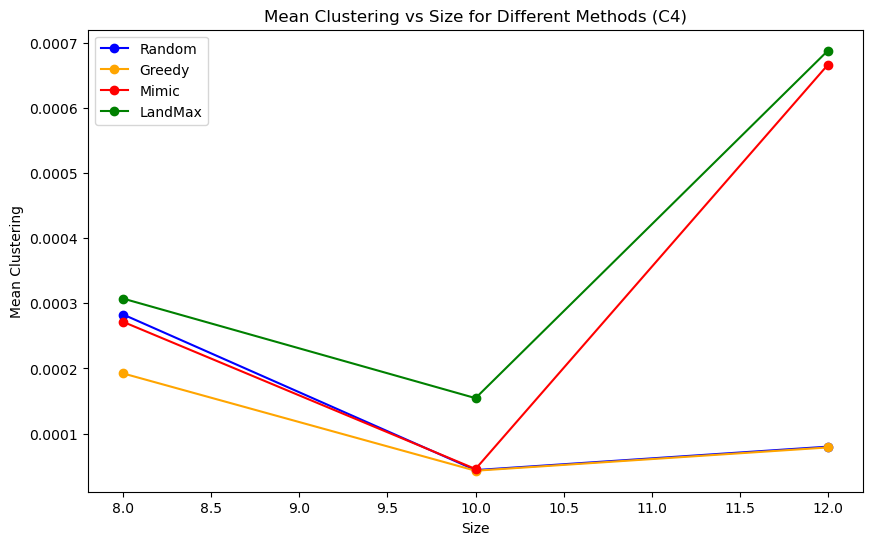

In [49]:
# Given data
methods = ['Random', 'Greedy', 'Mimic', 'LandMax']
colors = ['blue', 'orange', 'red', 'green']

# Initialize lists to store the points for each method
random_points = [(8, np.mean(clustering_random_8_c4[400:499])),
                 (10, np.mean(clustering_random_10_c4[400:499])),
                 (12, np.mean(clustering_random_12_c4[400:499]))]

greedy_points = [(8, np.mean(clustering_greedy_8_c4[400:499])),
                 (10, np.mean(clustering_greedy_10_c4[400:499])),
                 (12, np.mean(clustering_greedy_12_c4[400:499]))]

mimic_points = [(8, np.mean(clustering_mimic_8_c4[400:499])),
                (10, np.mean(clustering_mimic_10_c4[400:499])),
                (12, np.mean(clustering_mimic_12_c4[400:499]))]

landmax_points = [(8, np.mean(clustering_landmax_8_c4[400:499])),
                  (10, np.mean(clustering_landmax_10_c4[400:499])),
                  (12, np.mean(clustering_landmax_12_c4[400:499]))]

# Create a figure
plt.figure(figsize=(10, 6))

# Plot points for each method
for i, points in enumerate([random_points, greedy_points, mimic_points, landmax_points]):
    x_values, y_values = zip(*points)
    plt.plot(x_values, y_values, marker='o', linestyle='-', color=colors[i], label=methods[i])

# Set labels and title
plt.xlabel('Size')
plt.ylabel('Mean Clustering')
plt.title('Mean Clustering vs Size for Different Methods (C4)')

# Add legend
plt.legend()

# Show plot
plt.show()

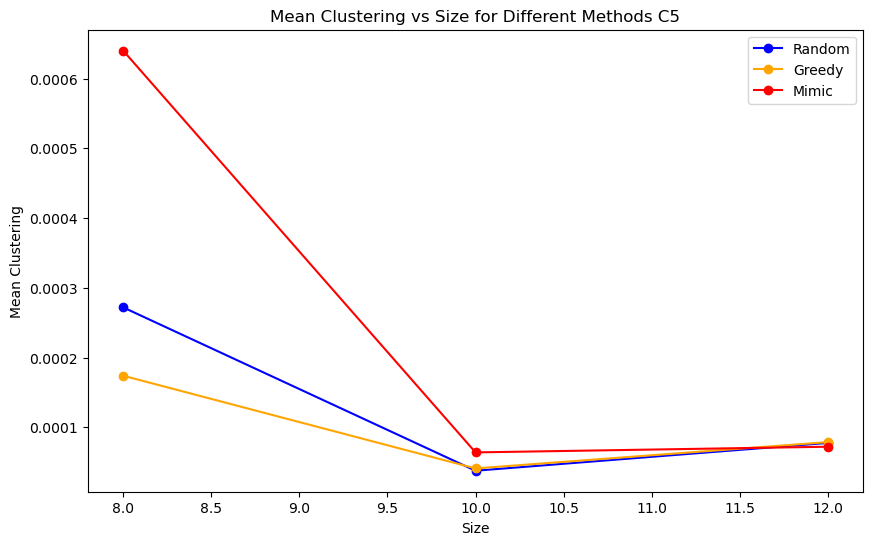

In [50]:
methods = ['Random', 'Greedy', 'Mimic']
colors = ['blue', 'orange', 'red']

# Initialize lists to store the points for each method
random_points = [(8, np.mean(clustering_random_8_c5[400:499])),
                 (10, np.mean(clustering_random_10_c5[400:499])),
                 (12, np.mean(clustering_random_12_c5[400:499]))]

greedy_points = [(8, np.mean(clustering_greedy_8_c5[400:499])),
                 (10, np.mean(clustering_greedy_10_c5[400:499])),
                 (12, np.mean(clustering_greedy_12_c5[400:499]))]

mimic_points = [(8, np.mean(clustering_mimic_8_c5[400:499])),
                (10, np.mean(clustering_mimic_10_c5[400:499])),
                (12, np.mean(clustering_mimic_12_c5[400:499]))]



# Create a figure
plt.figure(figsize=(10, 6))

# Plot points for each method
for i, points in enumerate([random_points, greedy_points, mimic_points]):
    x_values, y_values = zip(*points)
    plt.plot(x_values, y_values, marker='o', linestyle='-', color=colors[i], label=methods[i])

# Set labels and title
plt.xlabel('Size')
plt.ylabel('Mean Clustering')
plt.title('Mean Clustering vs Size for Different Methods C5')

# Add legend
plt.legend()

# Show plot
plt.show()

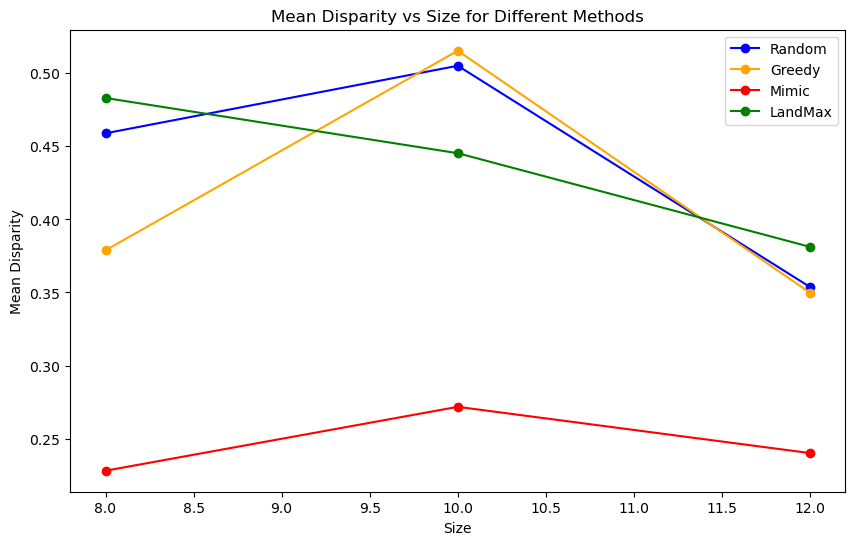

In [51]:
methods = ['Random', 'Greedy', 'Mimic', 'LandMax']
colors = ['blue', 'orange', 'red', 'green']

# Initialize lists to store the points for each method
random_points = [(8, np.mean(disparity_random_8_c2[400:499])),
                 (10, np.mean(disparity_random_10_c2[400:499])),
                 (12, np.mean(disparity_random_12_c2[400:499]))]

greedy_points = [(8, np.mean(disparity_greedy_8_c2[400:499])),
                 (10, np.mean(disparity_greedy_10_c2[400:499])),
                 (12, np.mean(disparity_greedy_12_c2[400:499]))]

mimic_points = [(8, np.mean(disparity_mimic_8_c2[400:499])),
                (10, np.mean(disparity_mimic_10_c2[400:499])),
                (12, np.mean(disparity_mimic_12_c2[400:499]))]

landmax_points = [(8, np.mean(disparity_landmax_8_c2[400:499])),
                  (10, np.mean(disparity_landmax_10_c2[400:499])),
                  (12, np.mean(disparity_landmax_12_c2[400:499]))]

# Create a figure
plt.figure(figsize=(10, 6))

# Plot points for each method
for i, points in enumerate([random_points, greedy_points, mimic_points, landmax_points]):
    x_values, y_values = zip(*points)
    plt.plot(x_values, y_values, marker='o', linestyle='-', color=colors[i], label=methods[i])

# Set labels and title
plt.xlabel('Size')
plt.ylabel('Mean Disparity')
plt.title('Mean Disparity vs Size for Different Methods')

# Add legend
plt.legend()

# Show plot
plt.show()

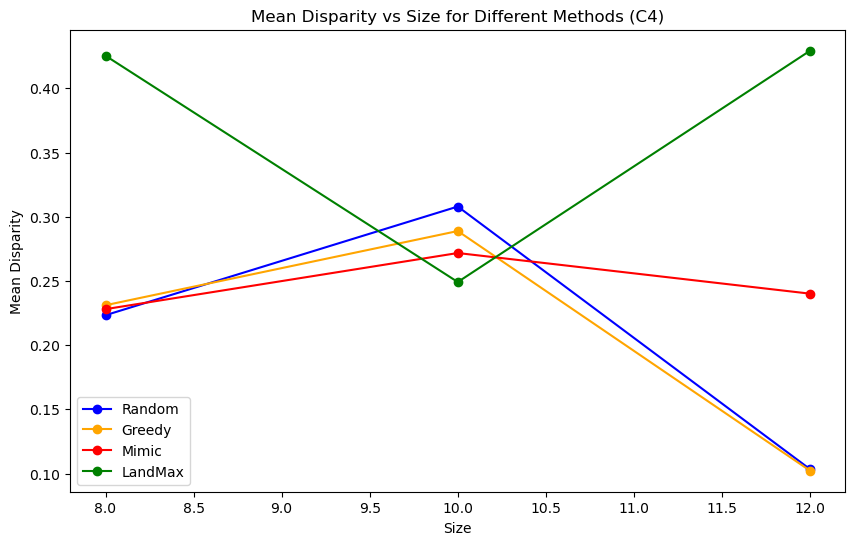

In [52]:
methods = ['Random', 'Greedy', 'Mimic', 'LandMax']
colors = ['blue', 'orange', 'red', 'green']

# Initialize lists to store the points for each method
random_points = [(8, np.mean(disparity_random_8_c4[400:499])),
                 (10, np.mean(disparity_random_10_c4[400:499])),
                 (12, np.mean(disparity_random_12_c4[400:499]))]

greedy_points = [(8, np.mean(disparity_greedy_8_c4[400:499])),
                 (10, np.mean(disparity_greedy_10_c4[400:499])),
                 (12, np.mean(disparity_greedy_12_c4[400:499]))]

mimic_points = [(8, np.mean(disparity_mimic_8_c4[400:499])),
                (10, np.mean(disparity_mimic_10_c4[400:499])),
                (12, np.mean(disparity_mimic_12_c4[400:499]))]

landmax_points = [(8, np.mean(disparity_landmax_8_c4[400:499])),
                  (10, np.mean(disparity_landmax_10_c4[400:499])),
                  (12, np.mean(disparity_landmax_12_c4[400:499]))]

# Create a figure
plt.figure(figsize=(10, 6))

# Plot points for each method
for i, points in enumerate([random_points, greedy_points, mimic_points, landmax_points]):
    x_values, y_values = zip(*points)
    plt.plot(x_values, y_values, marker='o', linestyle='-', color=colors[i], label=methods[i])

# Set labels and title
plt.xlabel('Size')
plt.ylabel('Mean Disparity')
plt.title('Mean Disparity vs Size for Different Methods (C4)')

# Add legend
plt.legend()

# Show plot
plt.show()

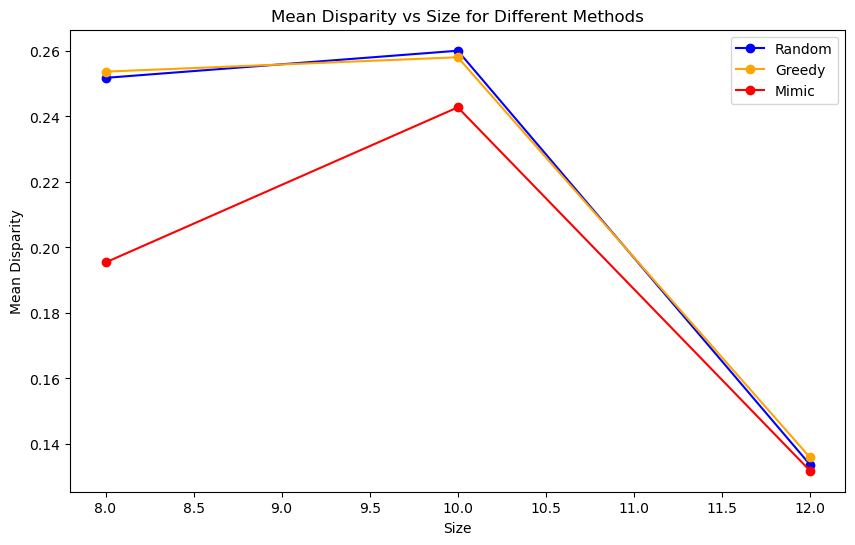

In [53]:
methods = ['Random', 'Greedy', 'Mimic']
colors = ['blue', 'orange', 'red']

# Initialize lists to store the points for each method
random_points = [(8, np.mean(disparity_random_8_c5[00:499])),
                 (10, np.mean(disparity_random_10_c5[00:499])),
                 (12, np.mean(disparity_random_12_c5[00:499]))]

greedy_points = [(8, np.mean(disparity_greedy_8_c5[00:499])),
                 (10, np.mean(disparity_greedy_10_c5[00:499])),
                 (12, np.mean(disparity_greedy_12_c5[00:499]))]

mimic_points = [(8, np.mean(disparity_mimic_8_c5[00:499])),
                (10, np.mean(disparity_mimic_10_c5[00:499])),
                (12, np.mean(disparity_mimic_12_c5[00:499]))]


# Create a figure
plt.figure(figsize=(10, 6))

# Plot points for each method
for i, points in enumerate([random_points, greedy_points, mimic_points]):
    x_values, y_values = zip(*points)
    plt.plot(x_values, y_values, marker='o', linestyle='-', color=colors[i], label=methods[i])

# Set labels and title
plt.xlabel('Size')
plt.ylabel('Mean Disparity')
plt.title('Mean Disparity vs Size for Different Methods')

# Add legend
plt.legend()

# Show plot
plt.show()

In [54]:
def replace_negatives_with_zero(lst):
    for sublist in lst:
        for i in range(len(sublist)):
            if sublist[i] < 0:
                sublist[i] = 0
    return lst

def transpose_list_of_lists(matrix):
    return [list(row) for row in zip(*matrix)]

In [137]:
transpose_list_of_lists(replace_negatives_with_zero(change_in_ex_work_random[0][10:]))

[0.0012462695725699666,
 0.0,
 0.0001523567040624768,
 0.011643415873142137,
 0.0,
 0.0,
 0.0,
 0.000847878538480441,
 0.0,
 0.024863082011181686,
 0.0,
 0.005907527346288809,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0019313457483107754,
 0.0,
 0.0,
 0.009347284513433283,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00035243484514916245,
 0.0024742808866701433,
 0.005376719529756609,
 0.0,
 0.0037529425287507294,
 0.0,
 0.0,
 0.003979107447019304,
 0.0,
 0.0,
 0.0,
 0.00028160337980368634,
 0.0,
 6.533327696559222e-05,
 0.0,
 0.0,
 0.00026586414756089865,
 0.0,
 0.00014955450290029477,
 0.0008008157638445768,
 0.0,
 0.00011245471731224086,
 0.00024299904323689056,
 0.001335392693572372,
 0.0,
 6.21416571108984e-05,
 0.0,
 0.0,
 0.0,
 9.9149015160986e-05,
 0.0,
 0.0003494883789745989,
 0.0016405584042301748,
 0.0,
 3.887611431476596e-05,
 0.0,
 0.0,
 0.0,
 0.0007664039335120659,
 0.0007404145912959014,
 0.0,
 0.0006158596755226511,
 0.0010235067037988814,
 5.947594448281598e-05,
 0.00017676817802237104,
 0.0,
 0

In [55]:
def cumulative_sums_with_reset(numbers):
    cumulative_sums = []
    current_sum = 0
    
    for number in numbers:
        if number == 0:
            current_sum = 0
        else:
            current_sum += number
            cumulative_sums.append(current_sum)
    
    return cumulative_sums


In [56]:
def cumulative_delta_w_per_qubit(change_in,num_qbits):
    cumulative_delta_w_per_qubit=[]
    for index in range(num_qbits):
        cumulative_delta_w_per_qubit.append(cumulative_sums_with_reset(transpose_list_of_lists(replace_negatives_with_zero(change_in[10:]))[index]))
    return cumulative_delta_w_per_qubit

In [145]:
cumulative_delta_w_per_qubit(change_in_ex_work_random[0],8)

[[0.0012462695725699666,
  0.0001523567040624768,
  0.011795772577204613,
  0.000847878538480441,
  0.024863082011181686,
  0.005907527346288809,
  0.0019313457483107754,
  0.009347284513433283,
  0.00035243484514916245,
  0.0028267157318193057,
  0.008203435261575914,
  0.0037529425287507294,
  0.003979107447019304,
  0.00028160337980368634,
  6.533327696559222e-05,
  0.00026586414756089865,
  0.00014955450290029477,
  0.0009503702667448715,
  0.00011245471731224086,
  0.0003554537605491314,
  0.0016908464541215034,
  6.21416571108984e-05,
  9.9149015160986e-05,
  0.0003494883789745989,
  0.0019900467832047737,
  3.887611431476596e-05,
  0.0007664039335120659,
  0.001506818524807967,
  0.0006158596755226511,
  0.0016393663793215325,
  0.0016988423238043485,
  0.0018756105018267195,
  0.0021343231261835094,
  0.003260958443908857,
  0.00019356861257417384,
  0.00035944587369848244,
  3.396137807796187e-05,
  0.0002042029705543587,
  0.000275706116154697,
  0.00012460659147340284,
  0.0

In [57]:
def cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit_in,num_qbits):
    cumulative_delta_w_per_qubit_mean=[]
    for index in range(num_qbits):
        cumulative_delta_w_per_qubit_mean.append(np.mean(cumulative_delta_w_per_qubit_in[index]))
    return cumulative_delta_w_per_qubit_mean

array([[            inf,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       ...,
       [-9.01786521e-03, -1.72936508e-02,  1.87244403e-04, ...,
        -1.72936593e-02, -4.02531544e-03, -4.02530999e-03],
       [ 6.44300513e-03, -1.22098733e-02,  7.17321151e-05, ...,
        -1.22098943e-02, -8.84549129e-04, -8.84550641e-04],
       [ 1.59485958e-02,  1.15759064e-03, -1.79442095e-04, ...,
         1.15756756e-03,  2.62343580e-03,  2.62343606e-03]])

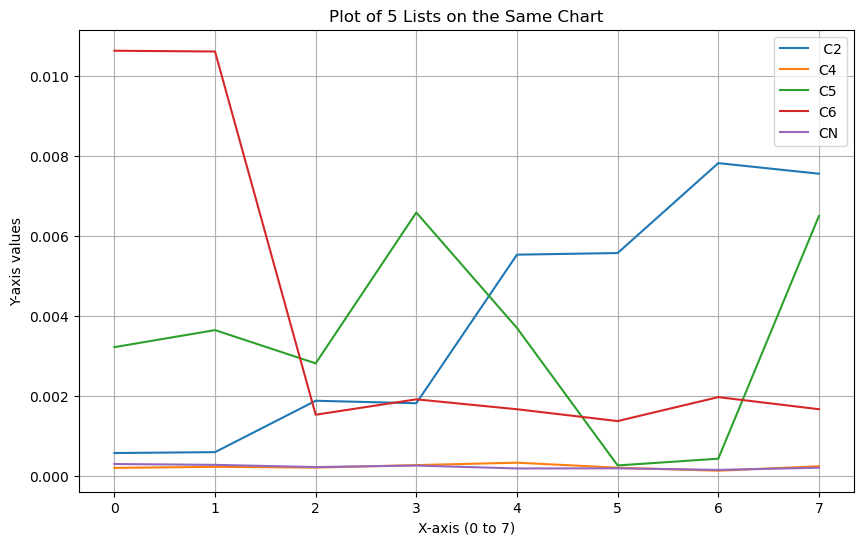

In [58]:

#change_in_ex_work_c2_10=change_in_ex_work("c2_2local","mimic",newdata3,10)
#change_in_ex_work_c4_10=change_in_ex_work("c4_2local","mimic",newdata3,10)
#change_in_ex_work_c5_10=change_in_ex_work("c5_2local","mimic",newdata3,10)
#change_in_ex_work_c6_10=change_in_ex_work("c6_2local","mimic",newdata3,10)
#change_in_ex_work_cN_10=change_in_ex_work("cN_2local","mimic",newdata3,10) 

change_in_ex_work_c2=change_in_ex_work("c2_2local","mimic",newdata3,8)
change_in_ex_work_c4=change_in_ex_work("c4_2local","mimic",newdata3,8)
change_in_ex_work_c5=change_in_ex_work("c5_2local","mimic",newdata3,8)
change_in_ex_work_c6=change_in_ex_work("c6_2local","mimic",newdata3,8)
change_in_ex_work_cN=change_in_ex_work("cN_2local","mimic",newdata3,8)

lists_of_change=[cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c2[0],8),8),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c4[0],8),8),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c5[0],8),8),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c6[0],8),8),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_cN[0],8),8)]
#change_list = []
#for change_list in lists_of_change_8Q:
   # change_list.append(cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_list,8),8))
    
# x-axis values
x_values = list(range(8))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each list
plt.plot(x_values, lists_of_change[0], label=' C2')
plt.plot(x_values, lists_of_change[1], label='C4')
plt.plot(x_values, lists_of_change[2], label='C5')
plt.plot(x_values, lists_of_change[3], label='C6')
plt.plot(x_values, lists_of_change[4], label='CN')

# Add labels and legend
plt.xlabel('X-axis (0 to 7)')
plt.ylabel('Y-axis values')
plt.title('Plot of 5 Lists on the Same Chart')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

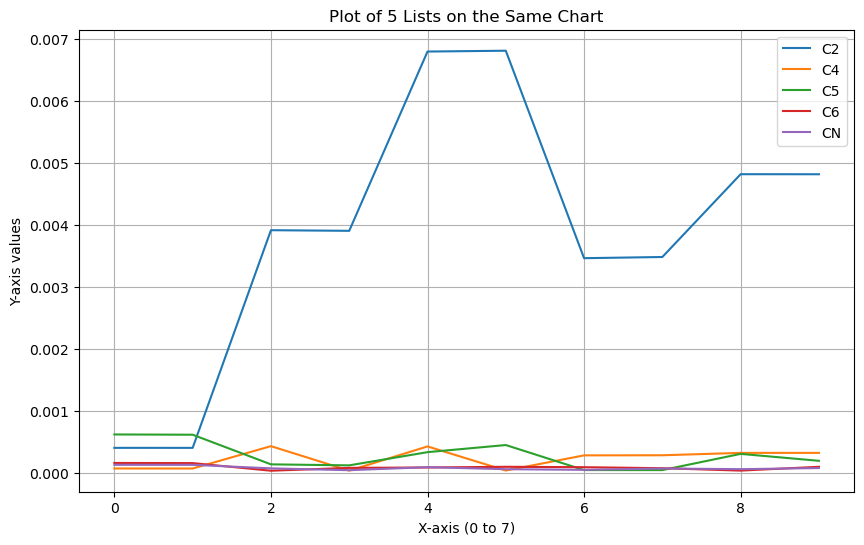

In [59]:
change_in_ex_work_c2=change_in_ex_work("c2_2local","mimic",newdata3,10)
change_in_ex_work_c4=change_in_ex_work("c4_2local","mimic",newdata3,10)
change_in_ex_work_c5=change_in_ex_work("c5_2local","mimic",newdata3,10)
change_in_ex_work_c6=change_in_ex_work("c6_2local","mimic",newdata3,10)
change_in_ex_work_cN=change_in_ex_work("cN_2local","mimic",newdata3,10)

lists_of_change=[cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c2[0],10),10),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c4[0],10),10),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c5[0],10),10),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c6[0],10),10),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_cN[0],10),10)]
#change_list = []
#for change_list in lists_of_change_8Q:
   # change_list.append(cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_list,8),8))
    
# x-axis values
x_values = list(range(10))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each list
plt.plot(x_values, lists_of_change[0], label='C2')
plt.plot(x_values, lists_of_change[1], label='C4')
plt.plot(x_values, lists_of_change[2], label='C5')
plt.plot(x_values, lists_of_change[3], label='C6')
plt.plot(x_values, lists_of_change[4], label='CN')

# Add labels and legend
plt.xlabel('X-axis (0 to 7)')
plt.ylabel('Y-axis values')
plt.title('Plot of 5 Lists on the Same Chart')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

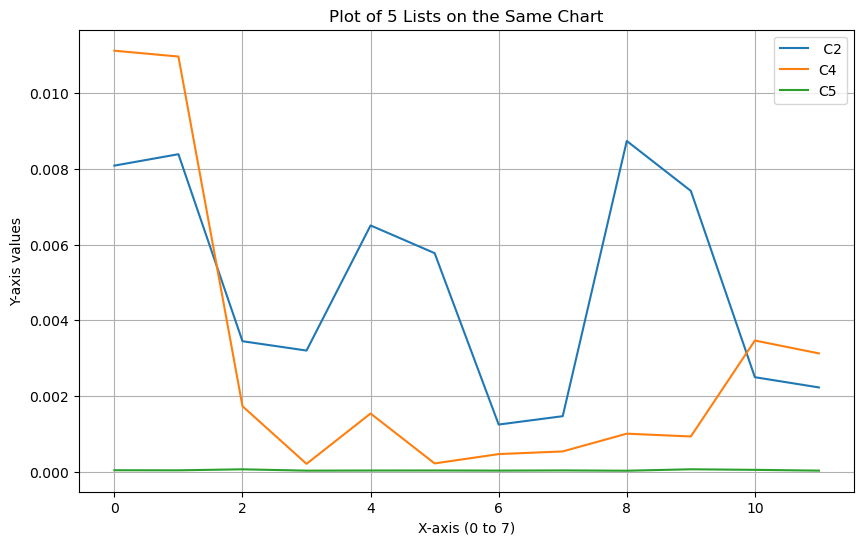

In [60]:
change_in_ex_work_c2=change_in_ex_work("c2_2local","mimic",newdata3,12)
change_in_ex_work_c4=change_in_ex_work("c4_2local","mimic",newdata3,12)
change_in_ex_work_c5=change_in_ex_work("c5_2local","mimic",newdata3,12)
#change_in_ex_work_c6=change_in_ex_work("c6_2local","greedy",newdata2,10)
#hange_in_ex_work_cN=change_in_ex_work("cN_2local","greedy",newdata2,10)

lists_of_change=[cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c2[0],12),12),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c4[0],12),12),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c5[0],12),12)]
     # cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c6[0],10),10),
      #cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_cN[0],10),10)]
#change_list = []
#for change_list in lists_of_change_8Q:
   # change_list.append(cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_list,8),8))
    
# x-axis values
x_values = list(range(12))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each list
plt.plot(x_values, lists_of_change[0], label=' C2')
plt.plot(x_values, lists_of_change[1], label='C4')
plt.plot(x_values, lists_of_change[2], label='C5')
#plt.plot(x_values, lists_of_change[3], label='C6')
#plt.plot(x_values, lists_of_change[4], label='CN')

# Add labels and legend
plt.xlabel('X-axis (0 to 7)')
plt.ylabel('Y-axis values')
plt.title('Plot of 5 Lists on the Same Chart')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

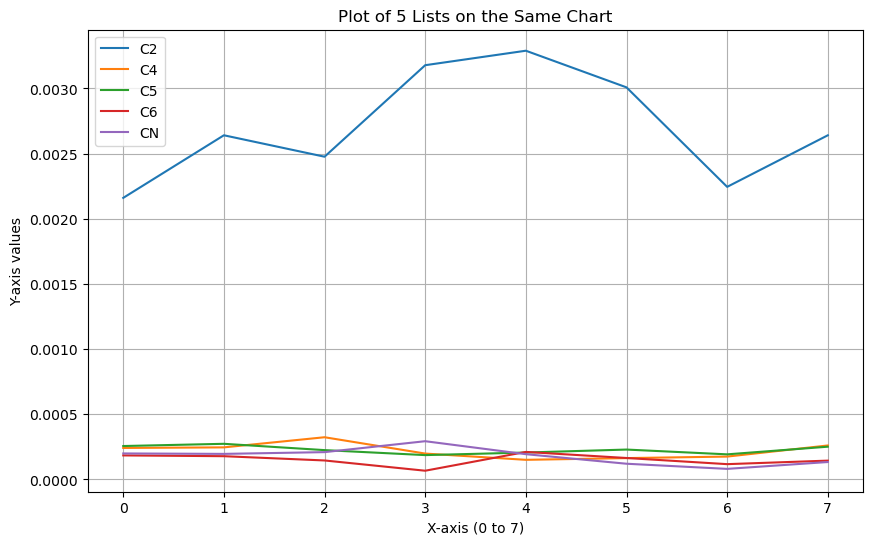

In [61]:
change_in_ex_work_c2 = change_in_ex_work("c2_2local","random",newdata1,8)
change_in_ex_work_c4 = change_in_ex_work("c4_2local","random",newdata1,8)
change_in_ex_work_c5 = change_in_ex_work("c5_2local","random",newdata1,8)
change_in_ex_work_c6 = change_in_ex_work("c6_2local","random",newdata1,8)
change_in_ex_work_cN = change_in_ex_work("cN_2local","random",newdata1,8)

lists_of_change = [cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c2[0],8),8),
                   cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c4[0],8),8),
                   cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c5[0],8),8),
                   cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c6[0],8),8),
                   cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_cN[0],8),8)]

# x-axis values
x_values = list(range(8))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each list
plt.plot(x_values, lists_of_change[0], label='C2')
plt.plot(x_values, lists_of_change[1], label='C4')
plt.plot(x_values, lists_of_change[2], label='C5')
plt.plot(x_values, lists_of_change[3], label='C6')
plt.plot(x_values, lists_of_change[4], label='CN')

# Add labels and legend
plt.xlabel('X-axis (0 to 7)')
plt.ylabel('Y-axis values')
plt.title('Plot of 5 Lists on the Same Chart')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


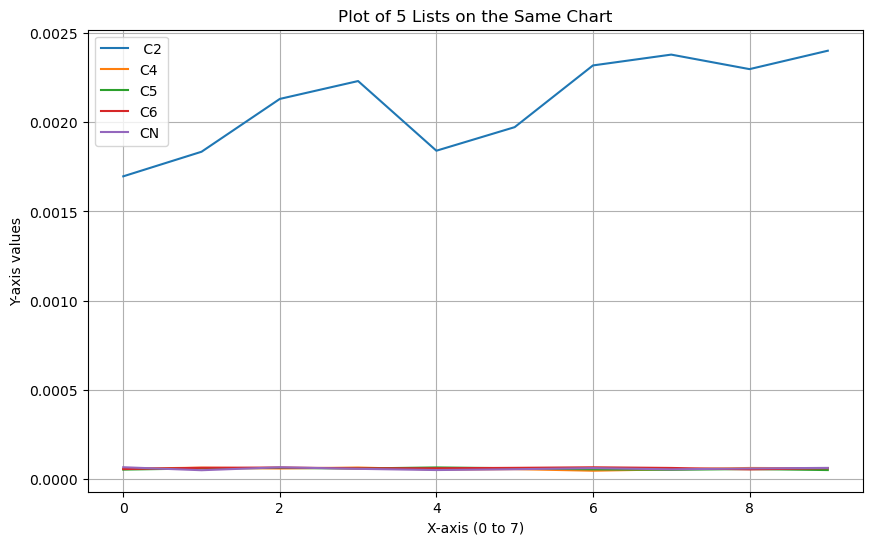

In [62]:
change_in_ex_work_c2=change_in_ex_work("c2_2local","random",newdata1,10)
change_in_ex_work_c4=change_in_ex_work("c4_2local","random",newdata1,10)
change_in_ex_work_c5=change_in_ex_work("c5_2local","random",newdata1,10)
change_in_ex_work_c6=change_in_ex_work("c6_2local","random",newdata1,10)
change_in_ex_work_cN=change_in_ex_work("cN_2local","random",newdata1,10)

lists_of_change=[cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c2[0],10),10),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c4[0],10),10),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c5[0],10),10),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c6[0],10),10),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_cN[0],10),10)]
#change_list = []
#for change_list in lists_of_change_8Q:
   # change_list.append(cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_list,8),8))
    
# x-axis values
x_values = list(range(10))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each list
plt.plot(x_values, lists_of_change[0], label=' C2')
plt.plot(x_values, lists_of_change[1], label='C4')
plt.plot(x_values, lists_of_change[2], label='C5')
plt.plot(x_values, lists_of_change[3], label='C6')
plt.plot(x_values, lists_of_change[4], label='CN')

# Add labels and legend
plt.xlabel('X-axis (0 to 7)')
plt.ylabel('Y-axis values')
plt.title('Plot of 5 Lists on the Same Chart')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

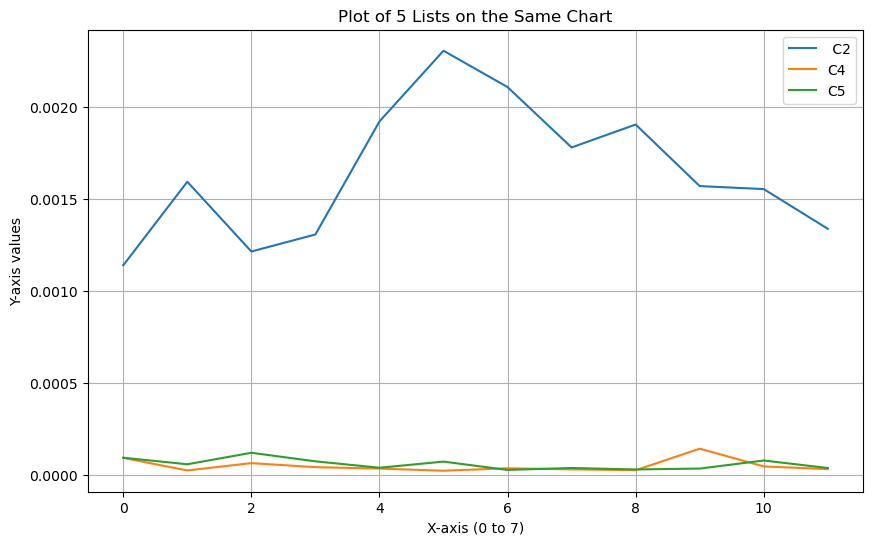

In [63]:
change_in_ex_work_c2=change_in_ex_work("c2_2local","random",newdata1,12)
change_in_ex_work_c4=change_in_ex_work("c4_2local","random",newdata1,12)
change_in_ex_work_c5=change_in_ex_work("c5_2local","random",newdata1,12)
#change_in_ex_work_c6=change_in_ex_work("c6_2local","greedy",newdata2,10)
#hange_in_ex_work_cN=change_in_ex_work("cN_2local","greedy",newdata2,10)

lists_of_change=[cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c2[0],12),12),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c4[0],12),12),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c5[0],12),12)]
     # cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c6[0],10),10),
      #cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_cN[0],10),10)]
#change_list = []
#for change_list in lists_of_change_8Q:
   # change_list.append(cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_list,8),8))
    
# x-axis values
x_values = list(range(12))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each list
plt.plot(x_values, lists_of_change[0], label=' C2')
plt.plot(x_values, lists_of_change[1], label='C4')
plt.plot(x_values, lists_of_change[2], label='C5')
#plt.plot(x_values, lists_of_change[3], label='C6')
#plt.plot(x_values, lists_of_change[4], label='CN')

# Add labels and legend
plt.xlabel('X-axis (0 to 7)')
plt.ylabel('Y-axis values')
plt.title('Plot of 5 Lists on the Same Chart')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

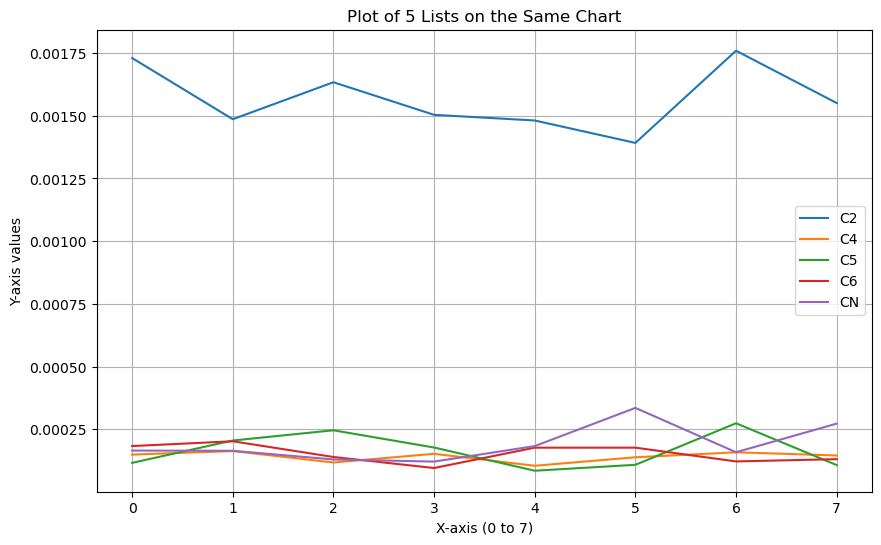

In [64]:
change_in_ex_work_c2 = change_in_ex_work("c2_2local","greedy",newdata2,8)
change_in_ex_work_c4 = change_in_ex_work("c4_2local","greedy",newdata2,8)
change_in_ex_work_c5 = change_in_ex_work("c5_2local","greedy",newdata2,8)
change_in_ex_work_c6 = change_in_ex_work("c6_2local","greedy",newdata2,8)
change_in_ex_work_cN = change_in_ex_work("cN_2local","greedy",newdata2,8)

lists_of_change = [cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c2[0],8),8),
                   cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c4[0],8),8),
                   cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c5[0],8),8),
                   cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c6[0],8),8),
                   cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_cN[0],8),8)]

# x-axis values
x_values = list(range(8))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each list
plt.plot(x_values, lists_of_change[0], label='C2')
plt.plot(x_values, lists_of_change[1], label='C4')
plt.plot(x_values, lists_of_change[2], label='C5')
plt.plot(x_values, lists_of_change[3], label='C6')
plt.plot(x_values, lists_of_change[4], label='CN')

# Add labels and legend
plt.xlabel('X-axis (0 to 7)')
plt.ylabel('Y-axis values')
plt.title('Plot of 5 Lists on the Same Chart')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

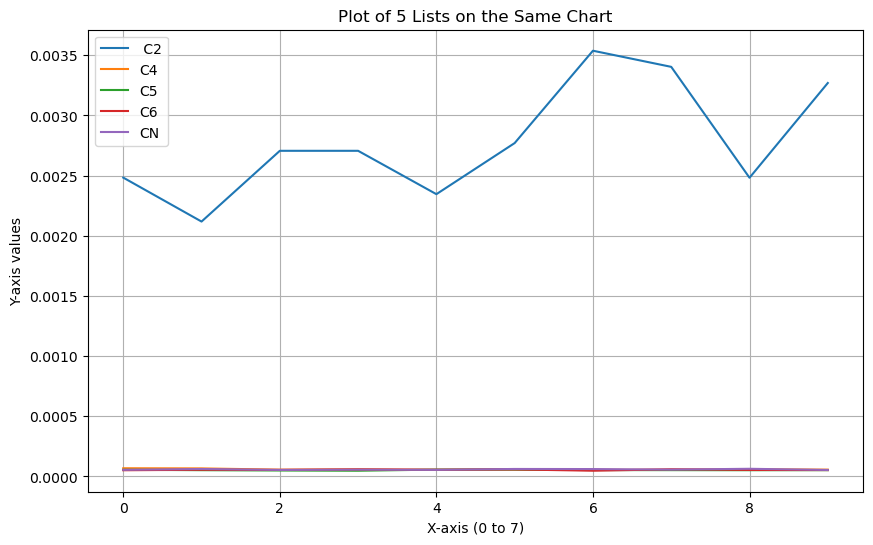

In [65]:
change_in_ex_work_c2=change_in_ex_work("c2_2local","greedy",newdata2,10)
change_in_ex_work_c4=change_in_ex_work("c4_2local","greedy",newdata2,10)
change_in_ex_work_c5=change_in_ex_work("c5_2local","greedy",newdata2,10)
change_in_ex_work_c6=change_in_ex_work("c6_2local","greedy",newdata2,10)
change_in_ex_work_cN=change_in_ex_work("cN_2local","greedy",newdata2,10)

lists_of_change=[cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c2[0],10),10),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c4[0],10),10),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c5[0],10),10),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c6[0],10),10),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_cN[0],10),10)]
#change_list = []
#for change_list in lists_of_change_8Q:
   # change_list.append(cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_list,8),8))
    
# x-axis values
x_values = list(range(10))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each list
plt.plot(x_values, lists_of_change[0], label=' C2')
plt.plot(x_values, lists_of_change[1], label='C4')
plt.plot(x_values, lists_of_change[2], label='C5')
plt.plot(x_values, lists_of_change[3], label='C6')
plt.plot(x_values, lists_of_change[4], label='CN')

# Add labels and legend
plt.xlabel('X-axis (0 to 7)')
plt.ylabel('Y-axis values')
plt.title('Plot of 5 Lists on the Same Chart')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

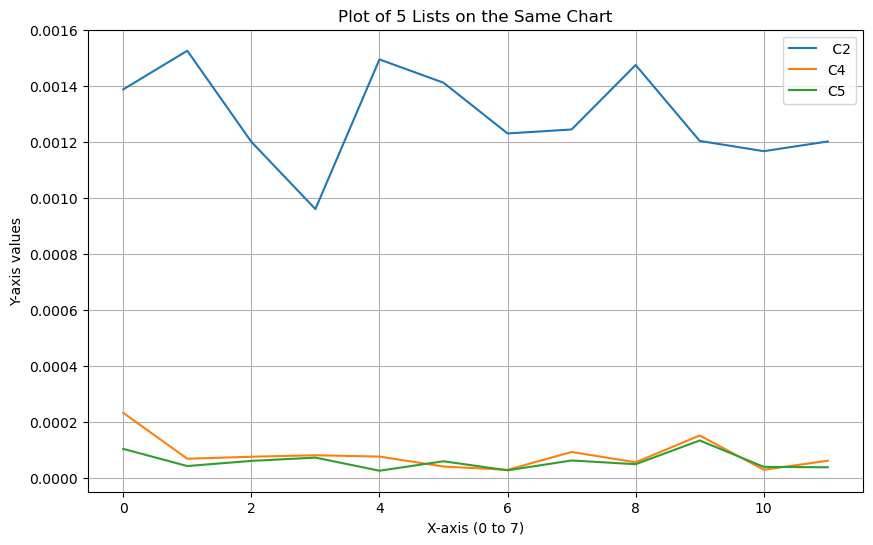

In [66]:
change_in_ex_work_c2=change_in_ex_work("c2_2local","greedy",newdata2,12)
change_in_ex_work_c4=change_in_ex_work("c4_2local","greedy",newdata2,12)
change_in_ex_work_c5=change_in_ex_work("c5_2local","greedy",newdata2,12)
#change_in_ex_work_c6=change_in_ex_work("c6_2local","greedy",newdata2,10)
#hange_in_ex_work_cN=change_in_ex_work("cN_2local","greedy",newdata2,10)

lists_of_change=[cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c2[0],12),12),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c4[0],12),12),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c5[0],12),12)]
     # cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c6[0],10),10),
      #cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_cN[0],10),10)]
#change_list = []
#for change_list in lists_of_change_8Q:
   # change_list.append(cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_list,8),8))
    
# x-axis values
x_values = list(range(12))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each list
plt.plot(x_values, lists_of_change[0], label=' C2')
plt.plot(x_values, lists_of_change[1], label='C4')
plt.plot(x_values, lists_of_change[2], label='C5')
#plt.plot(x_values, lists_of_change[3], label='C6')
#plt.plot(x_values, lists_of_change[4], label='CN')

# Add labels and legend
plt.xlabel('X-axis (0 to 7)')
plt.ylabel('Y-axis values')
plt.title('Plot of 5 Lists on the Same Chart')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

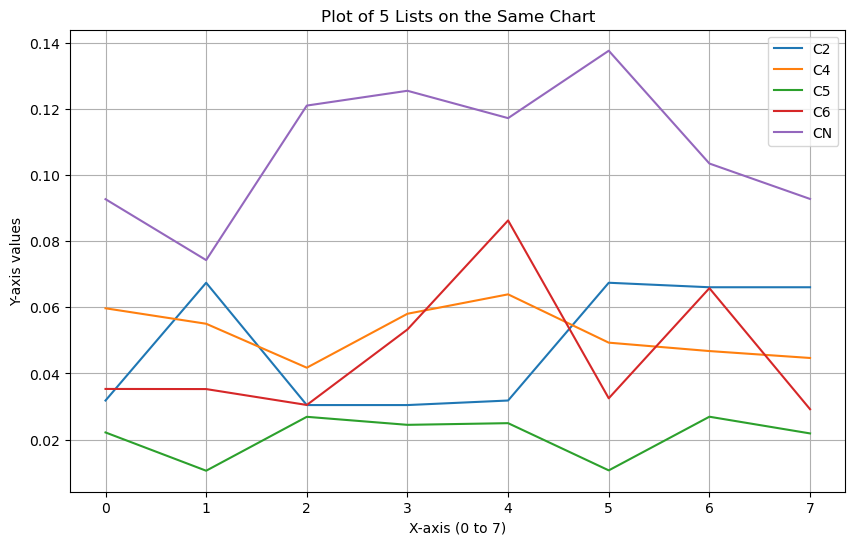

In [31]:
change_in_ex_work_c2 = change_in_ex_work("c2_2local","landscape_maximizes",newdata4,8)
change_in_ex_work_c4 = change_in_ex_work("c4_2local","landscape_maximizes",newdata4,8)
change_in_ex_work_c5 = change_in_ex_work("c5_2local","landscape_maximizes",newdata4,8)
change_in_ex_work_c6 = change_in_ex_work("c6_2local","landscape_maximizes",newdata4,8)
change_in_ex_work_cN = change_in_ex_work("cN_2local","landscape_maximizes",newdata4,8)

lists_of_change = [cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c2[0],8),8),
                   cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c4[0],8),8),
                   cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c5[0],8),8),
                   cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c6[0],8),8),
                   cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_cN[0],8),8)]

# x-axis values
x_values = list(range(8))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each list
plt.plot(x_values, lists_of_change[0], label='C2')
plt.plot(x_values, lists_of_change[1], label='C4')
plt.plot(x_values, lists_of_change[2], label='C5')
plt.plot(x_values, lists_of_change[3], label='C6')
plt.plot(x_values, lists_of_change[4], label='CN')

# Add labels and legend
plt.xlabel('X-axis (0 to 7)')
plt.ylabel('Y-axis values')
plt.title('Plot of 5 Lists on the Same Chart')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

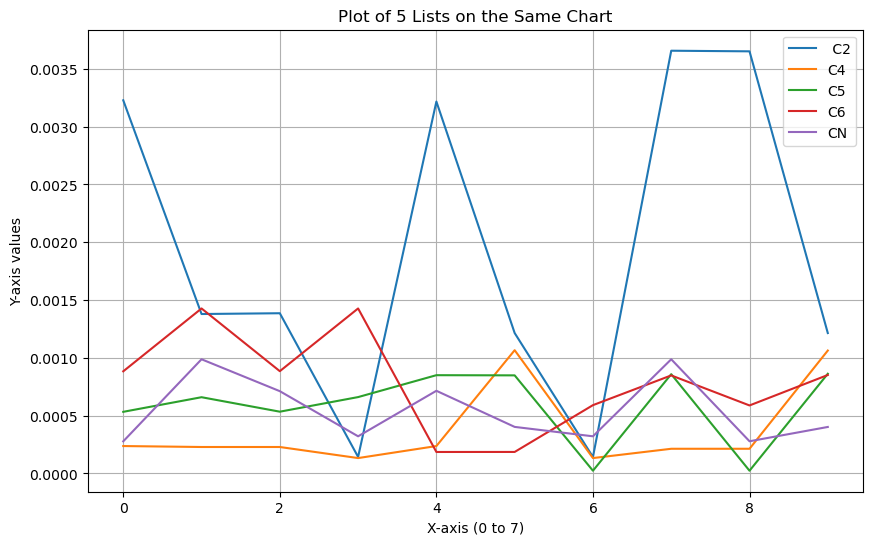

In [67]:
change_in_ex_work_c2=change_in_ex_work("c2_2local","landscape_maximizes",newdata4,10)
change_in_ex_work_c4=change_in_ex_work("c4_2local","landscape_maximizes",newdata4,10)
change_in_ex_work_c5=change_in_ex_work("c5_2local","landscape_maximizes",newdata4,10)
change_in_ex_work_c6=change_in_ex_work("c6_2local","landscape_maximizes",newdata4,10)
change_in_ex_work_cN=change_in_ex_work("cN_2local","landscape_maximizes",newdata4,10)

lists_of_change=[cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c2[0],10),10),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c4[0],10),10),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c5[0],10),10),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c6[0],10),10),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_cN[0],10),10)]
#change_list = []
#for change_list in lists_of_change_8Q:
   # change_list.append(cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_list,8),8))
    
# x-axis values
x_values = list(range(10))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each list
plt.plot(x_values, lists_of_change[0], label=' C2')
plt.plot(x_values, lists_of_change[1], label='C4')
plt.plot(x_values, lists_of_change[2], label='C5')
plt.plot(x_values, lists_of_change[3], label='C6')
plt.plot(x_values, lists_of_change[4], label='CN')

# Add labels and legend
plt.xlabel('X-axis (0 to 7)')
plt.ylabel('Y-axis values')
plt.title('Plot of 5 Lists on the Same Chart')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

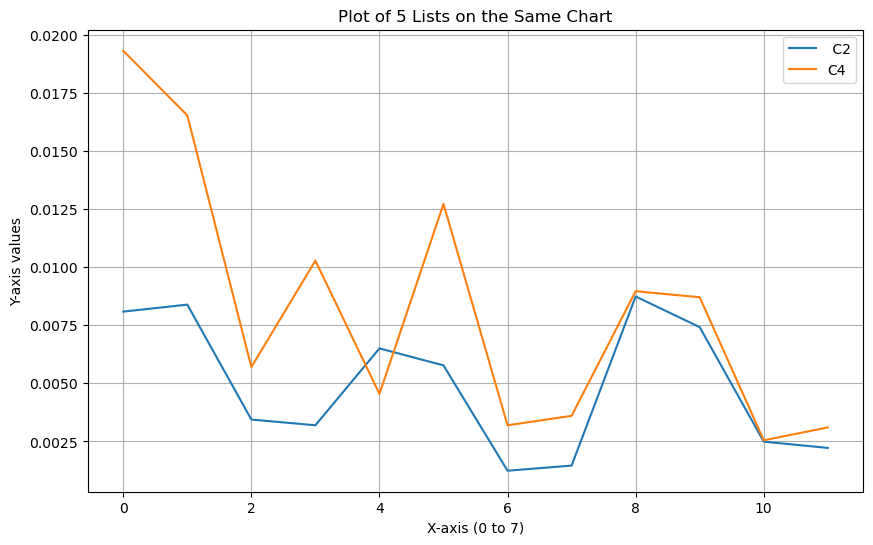

In [68]:
change_in_ex_work_c2=change_in_ex_work("c2_2local","landscape_maximizes",newdata4,12)
change_in_ex_work_c4=change_in_ex_work("c4_2local","landscape_maximizes",newdata4,12)
#change_in_ex_work_c5=change_in_ex_work("c5_2local","landscape_maximizes",newdata4,12)
#change_in_ex_work_c6=change_in_ex_work("c6_2local","landscape_maximizes",newdata4,12)
#change_in_ex_work_cN=change_in_ex_work("cN_2local","landscape_maximizes",newdata4,12)

lists_of_change=[cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c2[0],12),12),
      cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c4[0],12),12)]
      #cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c5[0],10),10),
     # cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_c6[0],10),10),
     # cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_in_ex_work_cN[0],10),10)]
#change_list = []
#for change_list in lists_of_change_8Q:
   # change_list.append(cumulative_delta_w_per_qubit_mean(cumulative_delta_w_per_qubit(change_list,8),8))
    
# x-axis values
x_values = list(range(12))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each list
plt.plot(x_values, lists_of_change[0], label=' C2')
plt.plot(x_values, lists_of_change[1], label='C4')
#plt.plot(x_values, lists_of_change[2], label='C5')
#plt.plot(x_values, lists_of_change[3], label='C6')
#plt.plot(x_values, lists_of_change[4], label='CN')

# Add labels and legend
plt.xlabel('X-axis (0 to 7)')
plt.ylabel('Y-axis values')
plt.title('Plot of 5 Lists on the Same Chart')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [93]:
pops_greedy = get_pops(newdata2,8,"c2_2local","greedy")
pops_greedy[0][0]

array([0.39999998, 0.19999999, 0.19999999, 0.19999999, 0.39999998,
       0.2       , 0.2       , 0.2       ], dtype=float32)

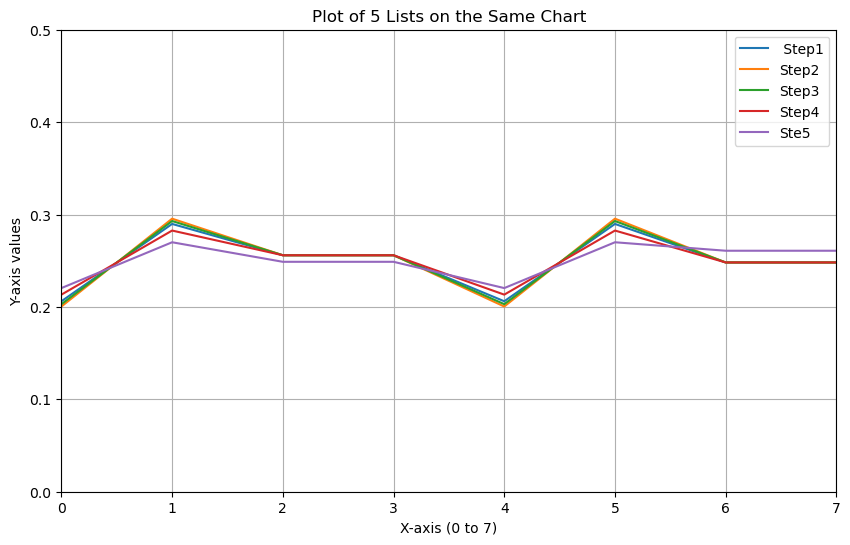

In [99]:
x_values = list(range(8))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, pops_greedy[0][10], label=' Step1')
plt.plot(x_values, pops_greedy[0][11], label='Step2')
plt.plot(x_values, pops_greedy[0][12], label='Step3')
plt.plot(x_values, pops_greedy[0][13], label='Step4')
plt.plot(x_values, pops_greedy[0][14], label='Ste5')

plt.xlim(0, 7)
plt.ylim(0, 0.5)

# Add labels and legend
plt.xlabel('X-axis (0 to 7)')
plt.ylabel('Y-axis values')
plt.title('Plot of 5 Lists on the Same Chart')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()




In [161]:
pops_random = get_pops(newdata1,12,"c2_2local","random")
pops_greedy = get_pops(newdata2,12,"c2_2local","greedy")
#pops_mimic = get_pops(newdata3,12,"c2_2local","mimic")
#pops_landmax = get_pops(newdata4,10,"cN_2local","landscape_maximizes")

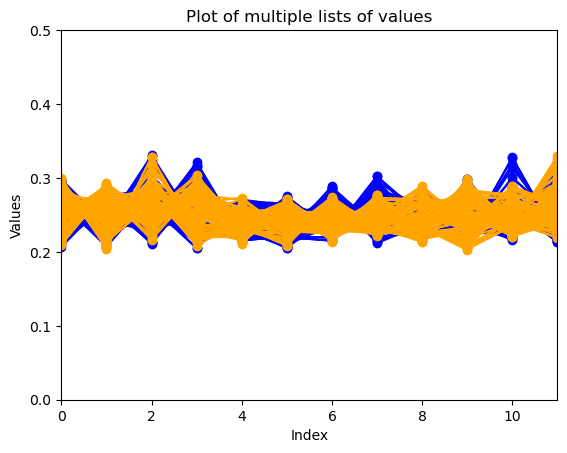

In [163]:
start=400
stop=499

x_values = list(range(8))

fig, ax = plt.subplots()

# Plot each list
for idx, values in enumerate(pops_random[0][start:stop]):
    ax.plot(range(12), values, marker='o',color='blue', label=f'List {idx + 1}')

for idx, values in enumerate(pops_greedy[0][start:stop]):
    ax.plot(range(12), values, marker='o',color='orange', label=f'List {idx + 1}')

#for idx, values in enumerate(pops_mimic[0][start:stop]):
   # ax.plot(range(12), values, marker='o',color='red', label=f'List {idx + 1}')

#for idx, values in enumerate(pops_landmax[0][start:stop]):
   # ax.plot(range(10), values, marker='o',color='green', label=f'List {idx + 1}')
    
plt.xlim(0, 11)
plt.ylim(0, 0.5)

# Add labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Values')
ax.set_title('Plot of multiple lists of values')

# Add a legend
#ax.legend()

# Show the plot
plt.show()

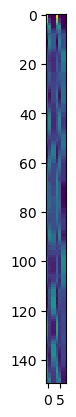

<Figure size 1200x1200 with 0 Axes>

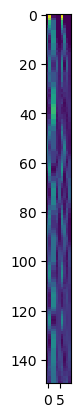

<Figure size 1200x1200 with 0 Axes>

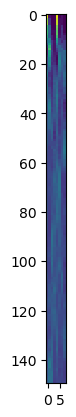

<Figure size 1200x1200 with 0 Axes>

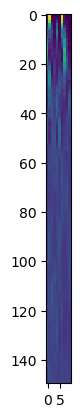

<Figure size 1200x1200 with 0 Axes>

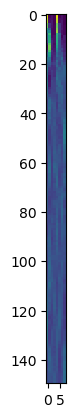

<Figure size 1200x1200 with 0 Axes>

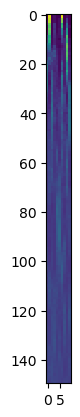

<Figure size 1200x1200 with 0 Axes>

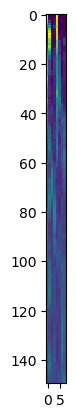

<Figure size 1200x1200 with 0 Axes>

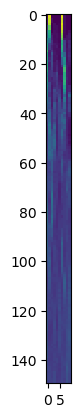

<Figure size 1200x1200 with 0 Axes>

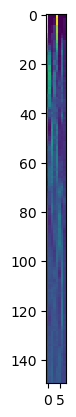

<Figure size 1200x1200 with 0 Axes>

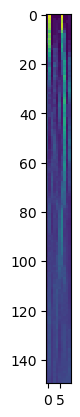

<Figure size 1200x1200 with 0 Axes>

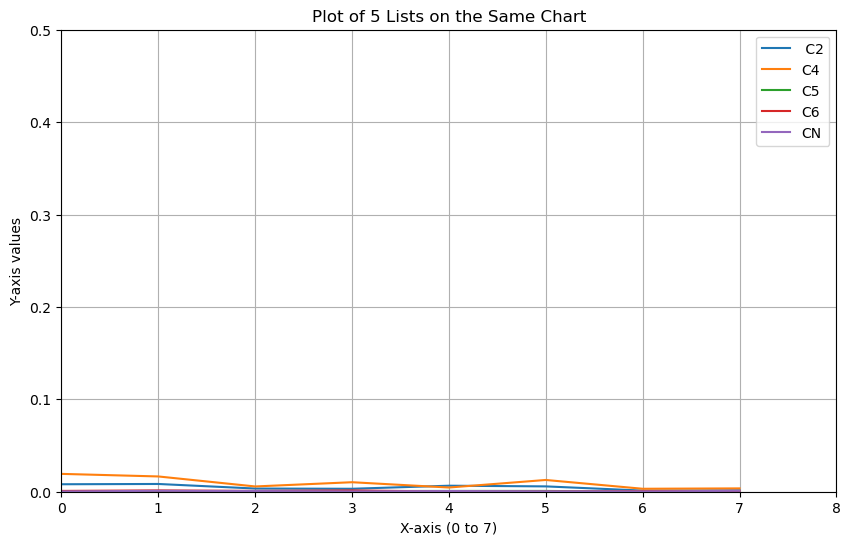

In [97]:
def pop_diff_between_Q_and_landscape(pops,num):
    pop_diff=[]
    for pop in pops:
        for qindex in range(num):
            pop[]
        